# Jugo project
## Initial data cleaning and EDA (Exploratory Data Analysis)


## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

### Weather station data in the Netherlands

In [2]:
df = pd.read_parquet('datasets/part-00000-tid-2789511524578721898-08cae995-4879-40e6-b739-92aa0f67bfaa-404-1-c000.snappy.parquet')

df.shape 

(19188675, 25)

In [3]:
df.sample(10)

STN  YYYYMMDD      H     DD     FH     FF     FX      T   T10N  \
6255715     370  20160515     20    310     20     20     40     80          
11148416    283  19951105      9      0      0      0      5     -1          
9923358     269  20000605      7    290     20     10     40    144          
10255839    316  19990525     16    270     40     30     40                 
9227619     316  20230602      4     30     70     70     90                 
16487024    370  19710127     12    240     62     62     93     81          
17777349    210  19660709      1    290            21           157          
12306185    283  19940329     18    240     15     15     41    105     98   
4410451     210  20050129     20    280     30     20     60     44          
15604103    308  19750623      3     10    123    123    139                 

             TD  ...     VV      N      U     WW     IX      M      R      S  \
6255715      17  ...     83      8     64             5      0      0      0   
11148416     -4  ...                   98                                      
9923358     118  ...     60            84             6                        
10255839         ...                                                           
9227619          ...                                  6                        
16487024     64  ...     58      7     89     10             0      0      0   
17777349    149  ...     50      8     95     10             0      0      0   
12306185     78  ...                   83                                      
4410451      34  ...     31      8     93     23      7      0      1      0   
15604103         ...                                                           

              O      Y  
6255715       0      0  
11148416                
9923358                 
10255839                
9227619                 
16487024      0      0  
17777349      0      0  
12306185                
4410451       0      0  
15604103                

[10 rows x 25 columns]

Identifying unique values helps understand the range and type of data in each column. This insight is crucial for determining the kind of preprocessing needed. 

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'STN': ['  209' '  210' '  225' '  235' '  240' '  242' '  248' '  249' '  251'
 '  257' '  258' '  260' '  265' '  267' '  269' '  270' '  273' '  275'
 '  277' '  278' '  279' '  280' '  283' '  285' '  286' '  290' '  308'
 '  310' '  311' '  312' '  313' '  315' '  316' '  319' '  324' '  330'
 '  331' '  340' '  343' '  344' '  348' '  350' '  356' '  370' '  375'
 '  377' '  380' '  391' '  323' '  215']
Column 'YYYYMMDD': ['20060201' '20060202' '20060203' ... '19510129' '19510130' '19510131']
Column 'H': ['    1' '    2' '    3' '    4' '    5' '    6' '    7' '    8' '    9'
 '   10' '   11' '   12' '   13' '   14' '   15' '   16' '   17' '   18'
 '   19' '   20' '   21' '   22' '   23' '   24']
Column 'DD': ['  100' '  120' '   90' '  110' '  220' '  350' '  150' '  190' '  240'
 '  200' '  260' '  250' '  300' '  330' '   80' '   70' '  140' '  130'
 '  990' '  160' '  270' '  290' '  180' '    0' '  230' '  310' '  320'
 '  170' '  340' '  360' '   50' '   40' '  210'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 25 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   STN       object
 1   YYYYMMDD  object
 2   H         object
 3   DD        object
 4   FH        object
 5   FF        object
 6   FX        object
 7   T         object
 8   T10N      object
 9   TD        object
 10  SQ        object
 11  Q         object
 12  DR        object
 13  RH        object
 14  P         object
 15  VV        object
 16  N         object
 17  U         object
 18  WW        object
 19  IX        object
 20  M         object
 21  R         object
 22  S         object
 23  O         object
 24  Y         object
dtypes: object(25)
memory usage: 3.6+ GB


By checking the data types in each column, we understand that each one is an object. Now, when we also can see each column name, we would suggest a name for each to each our work further. More research about the meanings would be done before the end of this iteration.

In [6]:
column_name_mapping = {
    'STN': 'Station ID',
    'YYYYMMDD': 'Date (YYYY-MM-DD)',
    'H': 'Hour',
    'DD': 'Wind Direction (degrees)',
    'FH': 'Hourly Average Wind Speed (m/s)',
    'FF': 'Wind Speed (m/s)',
    'FX': 'Highest Wind Gust (m/s) ',
    'T': 'Temperature (0.1°C)',
    'T10N': 'Minimum Temperature at 10cm (0.1°C)',
    'TD': 'Dew Point Temperature (0.1°C)',
    'SQ': 'Sunshine Duration (hours)',
    'Q': 'Global Radiation (J/cm²)',
    'DR': 'Duration of Precipitation (hours)',
    'RH': 'Precipitation Amount (mm)',
    'P': 'Atmospheric Pressure (hPa)',
    'VV': 'Visibility (m)',
    'N': 'Cloud Cover (oktas)',
    'U': 'Relative Humidity (%)',
    'WW': 'Weather Code',
    'IX': 'Weather Station Type',
    'M': 'Fog Indicator',
    'R': 'Rainfall Indicator',
    'S': 'Snow Indicator',
    'O': 'Thunderstorm Indicator',
    'Y': 'Ice Formation Indicator'
}

df.rename(columns=column_name_mapping, inplace=True)
df.sample(10)

Station ID Date (YYYY-MM-DD)   Hour Wind Direction (degrees)  \
9802689         308          20000214     10                      180   
11650951        310          19941009      8                      190   
17137962        375          19610826     22                      240   
9117714         240          20230223     19                      350   
11534923        278          19961222     20                       70   
3103043         391          20011126     12                      320   
1070772         286          20110814     13                      300   
676749          280          20080416     22                      360   
14094344        310          19830215     12                       70   
4436878         283          20050221     23                       60   

         Hourly Average Wind Speed (m/s) Wind Speed (m/s)  \
9802689                               50               50   
11650951                              15               21   
17137962                                               15   
9117714                               40               30   
11534923                              50               40   
3103043                               20               20   
1070772                               50               50   
676749                                30               30   
14094344                             103               93   
4436878                               50               60   

         Highest Wind Gust (m/s)  Temperature (0.1°C)  \
9802689                        70                       
11650951                       26                  90   
17137962                                          167   
9117714                        70                  54   
11534923                       80                 -36   
3103043                        40                  83   
1070772                        70                 172   
676749                         40                  23   
14094344                      118                   4   
4436878                       100                  10   

         Minimum Temperature at 10cm (0.1°C) Dew Point Temperature (0.1°C)  \
9802689                                                                      
11650951                                                                50   
17137962                                                               143   
9117714                                                                 12   
11534923                                                              -108   
3103043                                   71                            69   
1070772                                                                169   
676749                                                                   3   
14094344                                 -40                           -56   
4436878                                                                -18   

          ... Visibility (m) Cloud Cover (oktas) Relative Humidity (%)  \
9802689   ...                                                            
11650951  ...             59                   7                    76   
17137962  ...             65                   2                    86   
9117714   ...             72                   8                    74   
11534923  ...                                                       53   
3103043   ...                                                       91   
1070772   ...                                                       98   
676749    ...             70                   4                    87   
14094344  ...             56                   0                    64   
4436878   ...                                                       82   

         Weather Code Weather Station Type Fog Indicator Rainfall Indicator  \
9802689                                  6                                    
11650951           10                    1             0                 

After the research some of our group members conducted, we decided to drop the following columns as their information is irrelevant to our goal - "Duration of traffic jam".

In [7]:
columns_to_drop = ['Wind Direction (degrees)', 'Minimum Temperature at 10cm (0.1°C)', 'Sunshine Duration (hours)',
                   'Global Radiation (J/cm²)', 'Atmospheric Pressure (hPa)', 'Cloud Cover (oktas)',
                   'Relative Humidity (%)', 'Dew Point Temperature (0.1°C)',
                  'Wind Speed (m/s)', 'Weather Station Type', 'Weather Code']

df.drop(columns=columns_to_drop, inplace=True)
df

Station ID Date (YYYY-MM-DD)   Hour Hourly Average Wind Speed (m/s)  \
0               209          20060201      1                              40   
1               209          20060201      2                              40   
2               209          20060201      3                              30   
3               209          20060201      4                              20   
4               209          20060201      5                              20   
...             ...               ...    ...                             ...   
19188670        380          19510131     20                               0   
19188671        380          19510131     21                               0   
19188672        380          19510131     22                               0   
19188673        380          19510131     23                               0   
19188674        380          19510131     24                               0   

         Highest Wind Gust (m/s)  Temperature (0.1°C)  \
0                              50                       
1                              60                       
2                              50                       
3                              40                       
4                              40                       
...                           ...                 ...   
19188670                                           20   
19188671                                           20   
19188672                                           19   
19188673                                           18   
19188674                                           18   

         Duration of Precipitation (hours) Precipitation Amount (mm)  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      
...                                    ...                       ...   
19188670                                                               
19188671                                                               
19188672                                                               
19188673                                                               
19188674                                                               

         Visibility (m) Fog Indicator Rainfall Indicator Snow Indicator  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
...                 ...           ...                ...            ...   
19188670                            1                  0              0   
19188671                            1                  0              0   
19188672                            1                  0              0   
19188673                            1                  0              0   
19188674                            1                  0              0   

         Thunderstorm Indicator Ice Formation Indicator  
0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
...                         ...                     ...  
19188670                      0                       0  
19188671                      0                       0  
19188672                      0                       0  
19188673         

Now, after seeing that the columns are in the wrong data type and after removing some columns, let's also check the explicitly missing values.

In [8]:
df.isna().sum()

Station ID                           0
Date (YYYY-MM-DD)                    0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
dtype: int64

While we seem to **not have missing data**, based on the NAs check, there are actually **empty strings** in the columns. Therefore, we need to first clean the empty strings, before changing the data types and proceeding further.

Because of the invisible NAs, we decided to convert all of the columns to numeric type and wherever we got an error (which is the actual incinsistency of the data), we **converted it to NA** in order to make the issue visible.

In [9]:
#Changing the date to date format
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'], format='%Y%m%d')

#Making the hour an integer
df['Hour'] = df['Hour'].astype(int)

#Making the station ID an integer
df['Station ID'] = df['Station ID'].astype(int)

#Converting all of the other columns into numeric values and substituting errors with NAs
columns_to_convert = [
    'Hourly Average Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Thunderstorm Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

#Looping through the list of columns
for column in columns_to_convert:
#Checking also for trailing and leading empty spaces, before replacing errors with NAs
    if df[column].dtype != 'object':
        df[column] = df[column].astype(str)
    
    df[column] = df[column].str.replace(r'\D', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

#Checking the final result
df.sample(10)

Station ID Date (YYYY-MM-DD)  Hour  Hourly Average Wind Speed (m/s)  \
16430756         225        1980-09-18    24                              NaN   
2596540          377        2015-09-10     5                             30.0   
13783015         312        1987-07-30    11                             93.0   
19175893         310        1951-08-19    11                             62.0   
12549229         260        1992-02-10    14                             67.0   
17978932         380        1968-01-19     8                             10.0   
17723647         370        1966-02-09    11                              NaN   
11449710         277        1996-09-22     7                            120.0   
4428854          275        2005-02-14    15                             70.0   
7846376          290        2016-12-10     9                             50.0   

         Highest Wind Gust (m/s)  Temperature (0.1°C)  \
16430756                                          150   
2596540                        40                  83   
13783015                      113                       
19175893                                          172   
12549229                      129                  76   
17978932                                           75   
17723647                                           11   
11449710                      150                 114   
4428854                       140                  45   
7846376                        80                  71   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
16430756                                NaN                        NaN   
2596540                                 0.0                        0.0   
13783015                                NaN                        NaN   
19175893                                NaN                        NaN   
12549229                                0.0                        1.0   
17978932                                8.0                        2.0   
17723647                                NaN                        NaN   
11449710                                0.0                        0.0   
4428854                                 0.0                        0.0   
7846376                                 0.0                        0.0   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
16430756            56.0            NaN                 NaN             NaN   
2596540             65.0            0.0                 0.0             0.0   
13783015             NaN            NaN                 NaN             NaN   
19175893             NaN            0.0                 1.0             0.0   
12549229            75.0            0.0                 1.0             0.0   
17978932             1.0            1.0                 1.0             0.0   
17723647            12.0            0.0                 1.0             0.0   
11449710             NaN            NaN                 NaN             NaN   
4428854             70.0            0.0                 0.0             0.0   
7846376             59.0            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  
16430756                     NaN                      NaN  
2596540                      0.0                      0.0  
13783015                     NaN                      NaN  
19175893                     0.0                      0.0  
12549229                     0.0                      0.0  
17978932                     0.0                      0.0  
17723647                     0.0                      0.0  
11449710                     NaN                      NaN  
4428854                      0.0                      0.0  
7846376                      0.0                      0.0

Checking the data type now to see if every column got updated properly.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 14 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Station ID                         int64         
 1   Date (YYYY-MM-DD)                  datetime64[ns]
 2   Hour                               int64         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Highest Wind Gust (m/s)            object        
 5   Temperature (0.1°C)                object        
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Fog Indicator                      float64       
 10  Rainfall Indicator                 float64       
 11  Snow Indicator                     float64       
 12  Thunderstorm Indicator             float64       
 13  Ice Formation Indicator            float64       
dtype

In [11]:
df['Temperature (0.1°C)'] = pd.to_numeric(df['Temperature (0.1°C)'], errors='coerce')

It seems that all of the data types are correct now. Let's also check the missing values again as now we expect to have many more than before:

In [12]:
df.isna().sum()

Station ID                                 0
Date (YYYY-MM-DD)                          0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Highest Wind Gust (m/s)                    0
Temperature (0.1°C)                  4152753
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                        8264538
Rainfall Indicator                   8264516
Snow Indicator                       8264518
Thunderstorm Indicator               8264491
Ice Formation Indicator              8663080
dtype: int64

## Missing Data

Just as we expected, we have many missing values as now the empty strings are replaced with NAs and can finally be visible. Now, let's see a description of the values in the dataset:

In [13]:
columns = [
    'Station ID',
    'Date (YYYY-MM-DD)',
    'Hour',
    'Hourly Average Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator',
    'Thunderstorm Indicator',
]

min_values = []
max_values = []
mean_values = []
median_values = []

for column in columns:
    min_values.append(df[column].min())
    max_values.append(df[column].max())
    mean_values.append(df[column].mean())
    median_values.append(df[column].median())

# Create a DataFrame with minimum and maximum values
weather_data_descr = pd.DataFrame({'Column': columns,
                        'Min Value': min_values,
                        'Mean Value': mean_values,
                        'Median Value': median_values,
                        'Max Value': max_values})
weather_data_descr

Column            Min Value  \
0                          Station ID                  209   
1                   Date (YYYY-MM-DD)  1951-01-01 00:00:00   
2                                Hour                    1   
3     Hourly Average Wind Speed (m/s)                  0.0   
4   Duration of Precipitation (hours)                  0.0   
5           Precipitation Amount (mm)                  0.0   
6                      Visibility (m)                  0.0   
7                  Rainfall Indicator                  0.0   
8                      Snow Indicator                  0.0   
9                       Fog Indicator                  0.0   
10            Ice Formation Indicator                  0.0   
11             Thunderstorm Indicator                  0.0   

                       Mean Value         Median Value            Max Value  
0                      297.353128                286.0                  391  
1   1997-01-09 01:39:42.260099072  2000-12-25 00:00:00  2024-03-25 00:00:00  
2                       12.500096                 13.0                   24  
3                       50.865118                 46.0                324.0  
4                        0.727973                  0.0                 39.0  
5                        0.986595                  0.0                790.0  
6                       58.458932                 62.0                 99.0  
7                        0.203906                  0.0                 11.0  
8                        0.017388                  0.0                  3.0  
9                        0.044942                  0.0                  8.0  
10                       0.004713                  0.0                  1.0  
11                       0.007418                  0.0                  1.0

We will be using interpolation for filling the missing values for Present Weather. Interpolation is a technique used to fill in missing data points by estimating values based on surrounding data points. Now we will be using the `Date` as index to determine the interpolation using a time-based method, which means it's considering the dates when estimating the missing values.
https://www.youtube.com/watch?v=9ybI5YHPI5I

In [14]:
df.set_index('Date (YYYY-MM-DD)', inplace=True)
df.sort_values(by='Date (YYYY-MM-DD)', inplace=True)
df['Temperature (0.1°C)'] = df['Temperature (0.1°C)'].interpolate(method='time')

Make the indicators to be binary

In [15]:
columns_to_update = ['Rainfall Indicator', 'Snow Indicator', 'Fog Indicator', 'Thunderstorm Indicator', 'Ice Formation Indicator']

df[columns_to_update] = df[columns_to_update].map(lambda x: 1 if x > 1 else x)

Estimating and filling in missing values for rainfall, snow, and fog can be quite challenging. These weather parameters are often variable and localized, making them difficult to predict accurately. When data is missing for these variables, especially in a time-series dataset, it can be labor-intensive to manually check and fill in the values for each day.

Given the complexity and uncertainty involved in estimating these weather conditions, we have decided to adopt a conservative approach. In instances where data for rainfall, snow, or fog is missing, we will consider them as false, represented by a value of 0. While this approach may not capture the full variability of these weather phenomena, it allows us to maintain consistency and minimize potential errors in our analyses.

In [16]:
df['Rainfall Indicator'] = df['Rainfall Indicator'].fillna(0)
df['Snow Indicator'] = df['Snow Indicator'].fillna(0)
df['Fog Indicator'] = df['Fog Indicator'].fillna(0)
df['Thunderstorm Indicator'] = df['Thunderstorm Indicator'].fillna(0)

To ensure the accuracy of our weather data analysis, we employ time-based interpolation for the "Ice Formation Indicator." This specialized method leverages the temporal structure of our data to estimate missing values based on the progression of time. Time-based interpolation preserves the temporal continuity of our data, aligning interpolated values closely with the natural progression of weather conditions.

In [17]:
df['Ice Formation Indicator'] = df['Ice Formation Indicator'].interpolate(method='time')

In [18]:
df.isna().sum()

Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Highest Wind Gust (m/s)                    0
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    4
dtype: int64

In [19]:
rows_with_null_ice_formation = df[df['Ice Formation Indicator'].isna()]
rows_with_null_ice_formation

Station ID  Hour  Hourly Average Wind Speed (m/s)  \
Date (YYYY-MM-DD)                                                      
1951-01-01                380    23                             98.0   
1951-01-01                310     3                             87.0   
1951-01-01                310     2                             93.0   
1951-01-01                310     1                             93.0   

                  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
Date (YYYY-MM-DD)                                                 
1951-01-01                                                 22.0   
1951-01-01                                                 14.0   
1951-01-01                                                 11.0   
1951-01-01                                                  9.0   

                   Duration of Precipitation (hours)  \
Date (YYYY-MM-DD)                                      
1951-01-01                                       NaN   
1951-01-01                                       NaN   
1951-01-01                                       NaN   
1951-01-01                                       NaN   

                   Precipitation Amount (mm)  Visibility (m)  Fog Indicator  \
Date (YYYY-MM-DD)                                                             
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   

                   Rainfall Indicator  Snow Indicator  Thunderstorm Indicator  \
Date (YYYY-MM-DD)                                                               
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   

                   Ice Formation Indicator  
Date (YYYY-MM-DD)                           
1951-01-01                             NaN  
1951-01-01                             NaN  
1951-01-01                             NaN  
1951-01-01                             NaN

Because all the Temperatures are above 0, we can assume that there's no ice.

In [20]:
df['Ice Formation Indicator'].fillna(0, inplace=True)
df.isna().sum()

/var/folders/vy/7zf_1thx2wj3s563sjr_09vw0000gn/T/ipykernel_57282/4275008632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ice Formation Indicator'].fillna(0, inplace=True)


Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Highest Wind Gust (m/s)                    0
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
dtype: int64

In [21]:
df['Hourly Average Wind Speed (m/s)'] = pd.to_numeric(df['Hourly Average Wind Speed (m/s)'], errors='coerce')
df['Visibility (m)'] = pd.to_numeric(df['Visibility (m)'], errors='coerce')

### Wind speed 

In [22]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 14 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Date (YYYY-MM-DD)                  datetime64[ns]
 1   Station ID                         int64         
 2   Hour                               int64         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Highest Wind Gust (m/s)            object        
 5   Temperature (0.1°C)                float64       
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Fog Indicator                      float64       
 10  Rainfall Indicator                 float64       
 11  Snow Indicator                     float64       
 12  Thunderstorm Indicator             float64       
 13  Ice Formation Indicator            float64       
dtype

We would make a distributin plot for the wind speed by also finding the mean to provide just one value per day, making it easier to see daily trends in the wind speed.

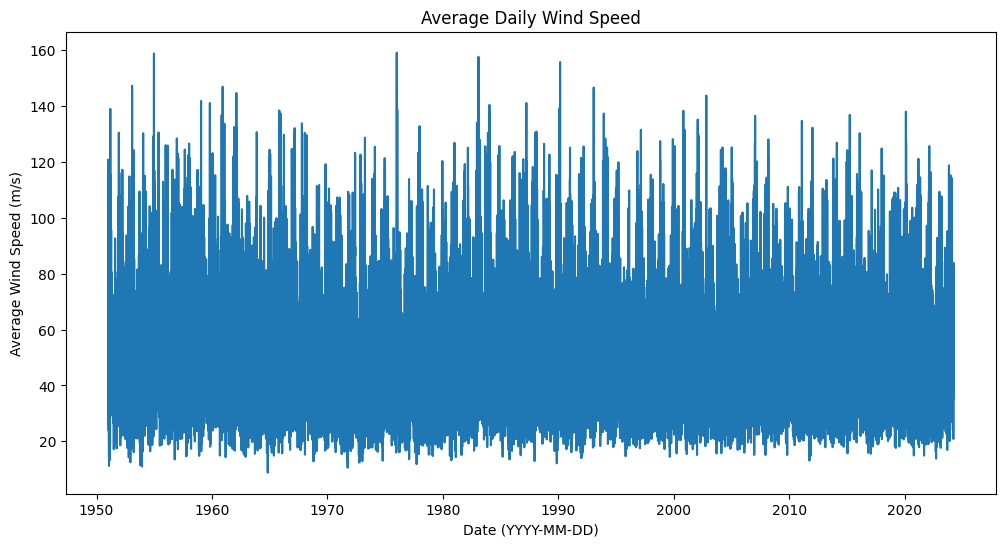

In [23]:
import matplotlib.pyplot as plt

daily_wind_speed = df.groupby(df['Date (YYYY-MM-DD)'].dt.date)['Hourly Average Wind Speed (m/s)'].mean()

# Plot
plt.figure(figsize=(12, 6))
daily_wind_speed.plot(title='Average Daily Wind Speed')
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()

### Temperature

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and has been prepared as previously discussed
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])  # Ensure 'Date' is a datetime object
df['Month'] = df['Date (YYYY-MM-DD)'].dt.month  # Extract month for seasonal categorization

# Define months for each season
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# Filter data by season
spring_data = df[df['Month'].isin(spring_months)]
summer_data = df[df['Month'].isin(summer_months)]
fall_data = df[df['Month'].isin(fall_months)]
winter_data = df[df['Month'].isin(winter_months)]

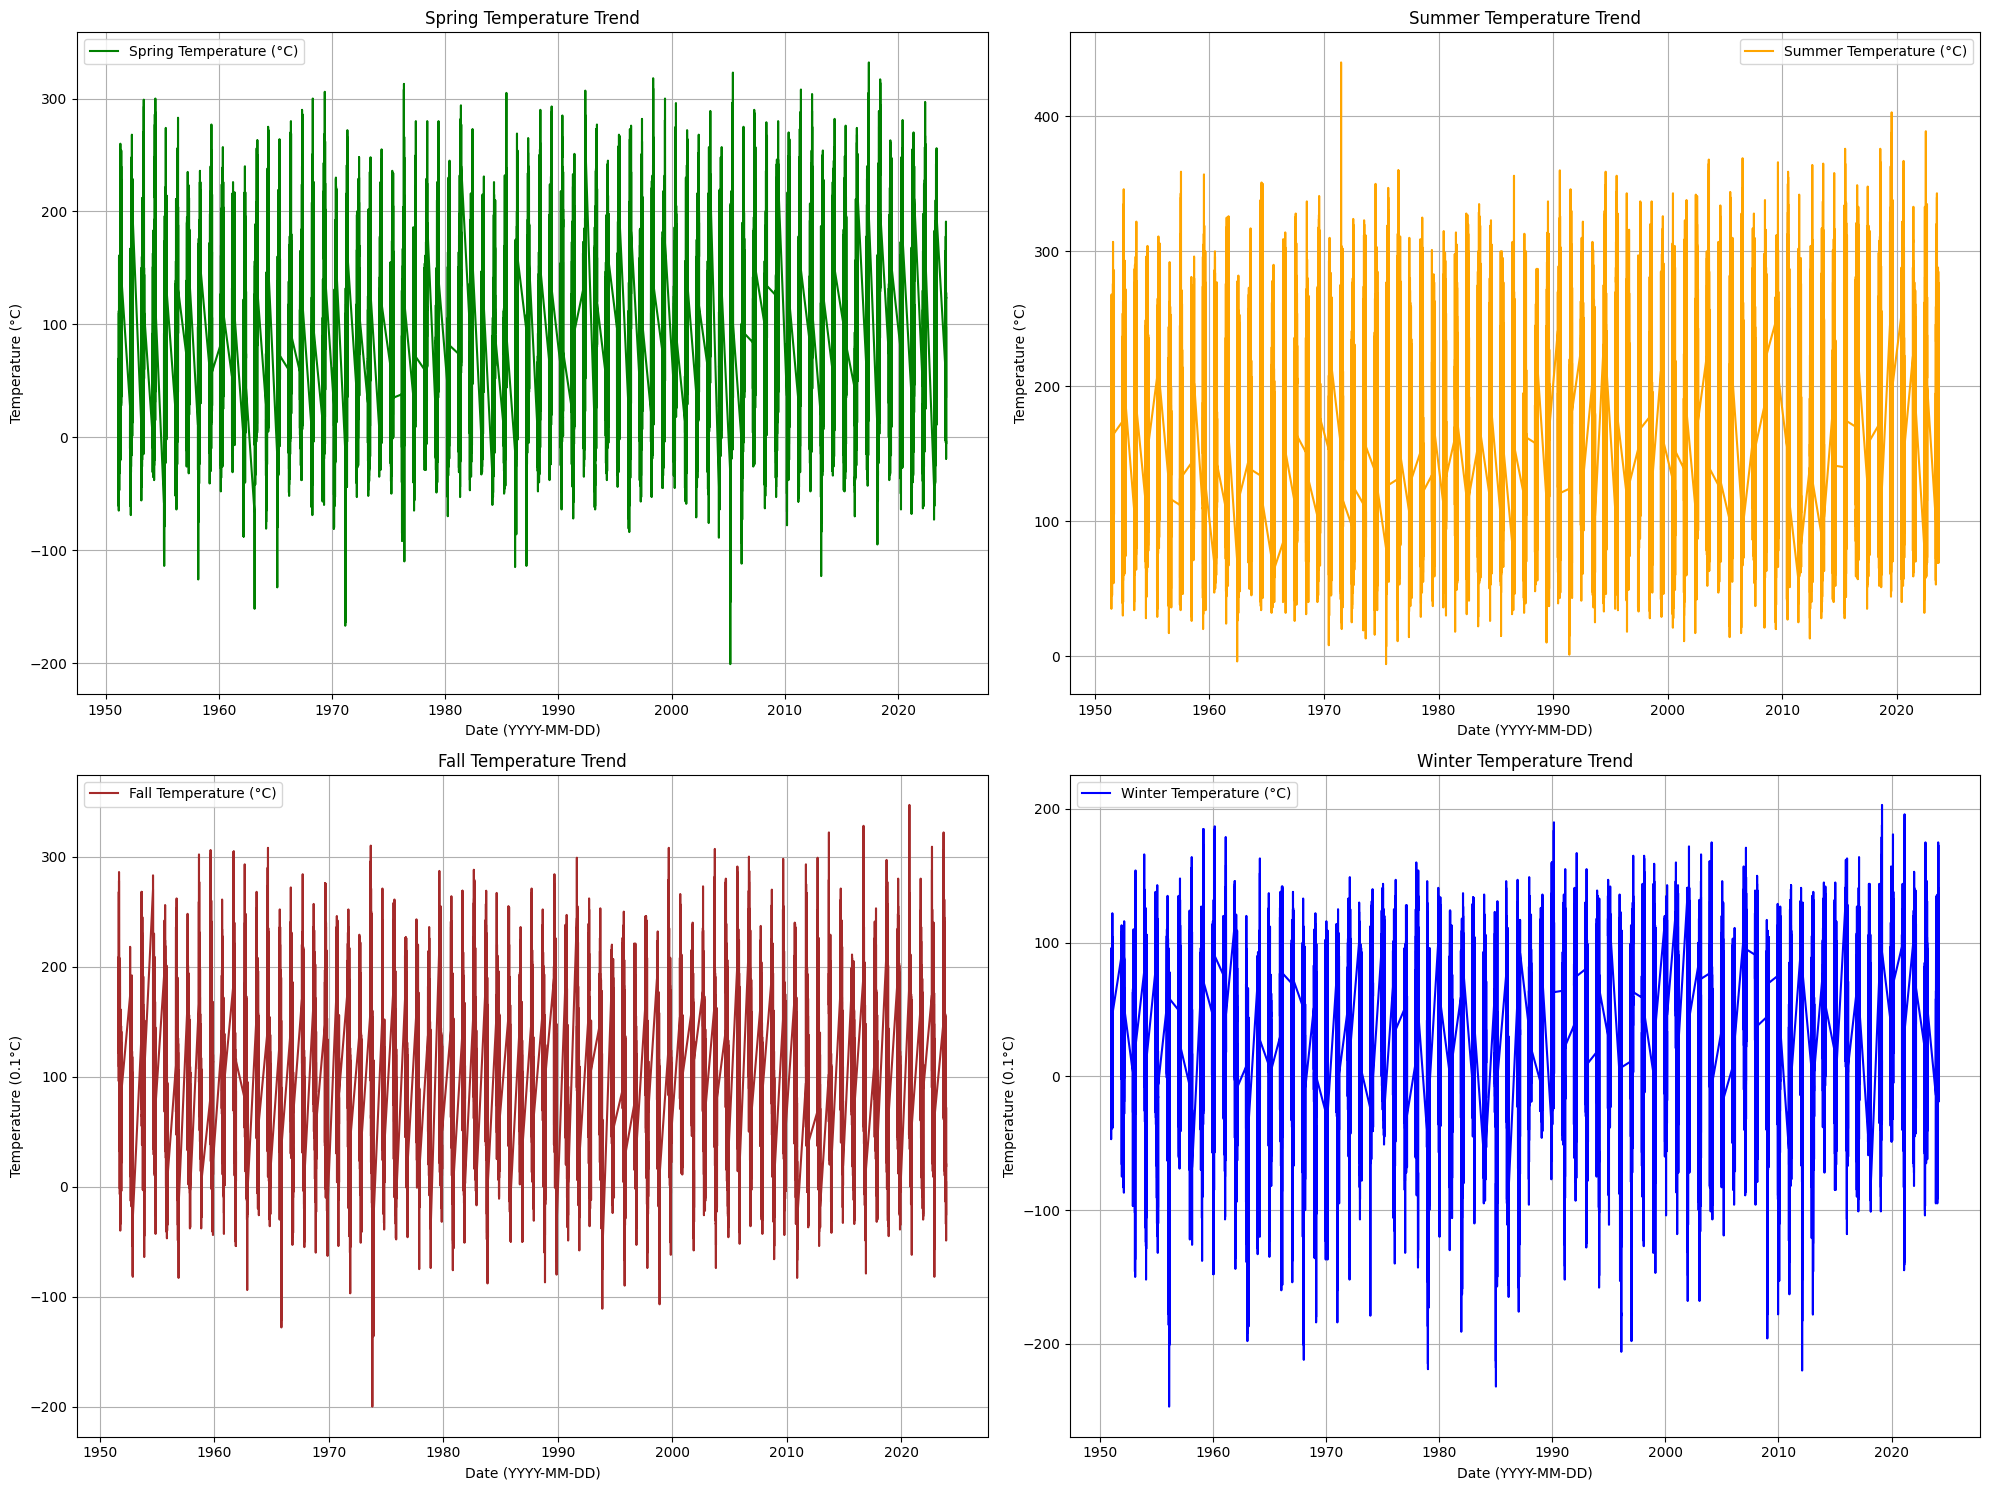

In [25]:
# Setup the plot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))  # Adjust size as needed

# Plot Temperature Trend for Spring
axs[0, 0].plot(spring_data['Date (YYYY-MM-DD)'], spring_data['Temperature (0.1°C)'], label='Spring Temperature (°C)', color='green')
axs[0, 0].set_title('Spring Temperature Trend')
axs[0, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot Temperature Trend for Summer
axs[0, 1].plot(summer_data['Date (YYYY-MM-DD)'], summer_data['Temperature (0.1°C)'], label='Summer Temperature (°C)', color='orange')
axs[0, 1].set_title('Summer Temperature Trend')
axs[0, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot Temperature Trend for Fall
axs[1, 0].plot(fall_data['Date (YYYY-MM-DD)'], fall_data['Temperature (0.1°C)'], label='Fall Temperature (°C)', color='brown')
axs[1, 0].set_title('Fall Temperature Trend')
axs[1, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 0].set_ylabel('Temperature (0.1°C)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot Temperature Trend for Winter
axs[1, 1].plot(winter_data['Date (YYYY-MM-DD)'], winter_data['Temperature (0.1°C)'], label='Winter Temperature (°C)', color='blue')
axs[1, 1].set_title('Winter Temperature Trend')
axs[1, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 1].set_ylabel('Temperature (0.1°C)')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Stations Herwijnen, Maastricht, Volkel 
Below in the third dataset about different Weather station locations, we conducted that stations Herwijnen, Maastricht, Volkel  are the nearest to the cities our users travels to and from. The following stations have station ids respectivelly - 356, 375, 380 and this is why now we would try to understand more about specificaly them.

In [26]:
df['Station ID'].unique()

array([380, 310, 290, 280, 350, 370, 275, 240, 235, 210, 270, 260, 375,
       265, 344, 330, 225, 308, 331, 285, 312, 316, 348, 273, 356, 279,
       283, 269, 286, 391, 267, 343, 278, 277, 319, 340, 251, 248, 242,
       315, 313, 311, 324, 249, 377, 209, 257, 258, 323, 215])

Clearly here we can not only see the unique values for 'Station ID' but can also conclude that there are hidden characters and/or space that should be removed. 

In [27]:
#df['Station ID'] = df['Station ID'].str.replace(' ', '', regex=False)
#df['Station ID'].unique()

Also, lets check the values for the three nearest stations of the cities that regard our user journey - Herwijnen, Maastricht, Volkel.

In [28]:
station1 = df[df['Station ID'] == '356']
station2 = df[df['Station ID'] == '375']
station3 = df[df['Station ID'] == '380']

In [29]:
station1.value_counts().sum()

0

In [30]:
station2.value_counts().sum()

0

In [31]:
station3.value_counts().sum()

0

These represent the total value of data per each corresponding station or in total:

In [32]:
station_ids = ['356', '375', '380']

filtered_df = df[df['Station ID'].isin(station_ids)]

print(filtered_df.shape)

(0, 15)


In [33]:
for column in df:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Date (YYYY-MM-DD):
Date (YYYY-MM-DD)
2014-12-09    1152
2012-08-20    1152
2012-08-09    1152
2012-08-10    1152
2012-08-11    1152
              ... 
1951-01-28     288
1951-01-29     288
1951-01-30     288
1951-01-31     288
1951-01-01     288
Name: count, Length: 26747, dtype: int64

Value counts for Station ID:
Station ID
310    641928
260    641928
290    641928
280    641928
350    641928
370    641928
275    641928
240    641928
235    641928
270    641928
375    641184
380    633174
344    591528
210    572712
265    493872
330    466632
225    466632
308    457872
285    378960
312    370200
316    361440
331    350640
348    332976
273    308832
356    302184
283    301135
279    300608
286    299505
269    299267
391    295721
267    295721
343    291312
278    291312
277    289488
319    287112
340    271608
251    261528
248    260328
242    250416
315    237984
313    237984
324    232152
249    219408
377    216840
209    202944
257    200760
311    1712

In [34]:
na_count_in_columns = df.isnull().sum()

print("Number of NaN values in each column:")
print(na_count_in_columns)

Number of NaN values in each column:
Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Highest Wind Gust (m/s)                    0
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
dtype: int64


In order to analyze each Year and make comparisons, we would make a copy dataframe where the last 4 characters of 'Date (YYYY-MM-DD)'are removed in order to leave with only the year. 

In [35]:
df_sorted = df.copy()

df_sorted['Date (YYYY-MM-DD)'] = df_sorted['Date (YYYY-MM-DD)'].dt.year #removes the last 4 - the month and the date 
df_sorted = df_sorted.sort_values(by='Date (YYYY-MM-DD)', ascending=True)

df_sorted['Date (YYYY-MM-DD)'].value_counts()

Date (YYYY-MM-DD)
2012    421632
2013    420480
2015    420480
2011    420480
2006    419736
         ...  
1955    122640
1954    122640
1953    122640
1951    116064
2024     93840
Name: count, Length: 74, dtype: int64

#### Distribution of the data per each year

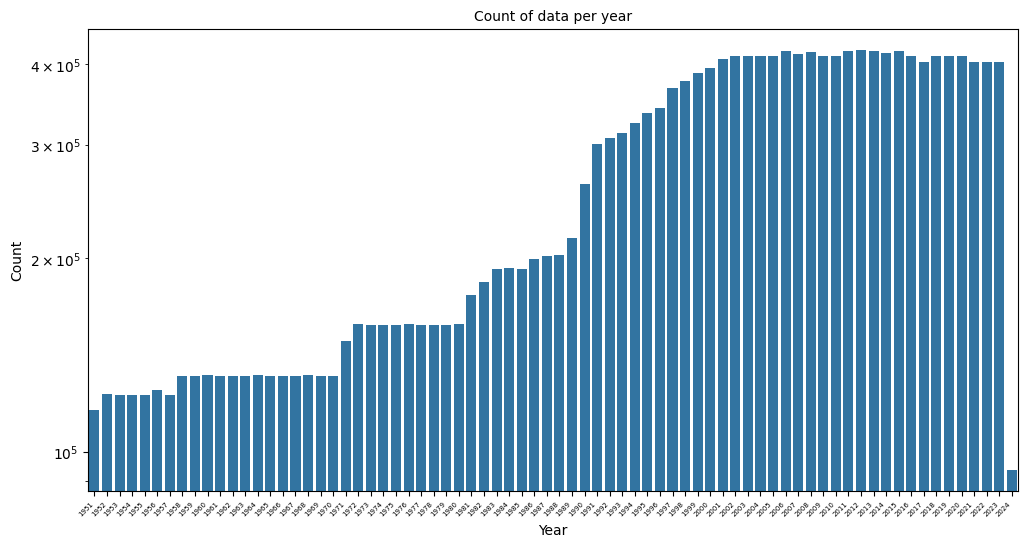

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sorted, x='Date (YYYY-MM-DD)')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of data per year', fontsize=10)

plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=5) 
plt.show()

This plots represents the number of data for each year from 1951 until 2024. However, still 2024 is not over and this is why we lack of data there. 

In [37]:
df_sorted = df_sorted[df_sorted['Date (YYYY-MM-DD)'] >= 2015]

print(df_sorted)

          Date (YYYY-MM-DD)  Station ID  Hour  \
15693677               2015         391    17   
15693678               2015         391    16   
15693679               2015         391    15   
15693676               2015         391    19   
15693680               2015         391    14   
...                     ...         ...   ...   
19126110               2024         391    11   
19126109               2024         391    10   
19126108               2024         391     8   
19126106               2024         391     7   
19188674               2024         375     5   

          Hourly Average Wind Speed (m/s) Highest Wind Gust (m/s)   \
15693677                             20.0                       60   
15693678                             20.0                       50   
15693679                             30.0                       70   
15693676                             20.0                       60   
15693680                             30.0                    

In [38]:
df_sorted.shape

(3775320, 15)

## Traffic data

In [39]:
traffic_jam = pd.read_parquet('datasets/part-00000-tid-5723335361199544621-d336d8d1-1073-410a-866c-3445c2fec160-222-1-c000.snappy.parquet')

traffic_jam.shape

(1581781, 26)

Checking if the table got imported properly.

In [40]:
traffic_jam.sample(3)

NLSitNummer DatumFileBegin DatumFileEind TijdFileBegin TijdFileEind  \
146488      3532509     2023-05-15    2023-05-15       7:39:26      7:53:00   
1578792     2796093     2020-12-08    2020-12-08      16:41:00     16:47:54   
44936       3600866     2023-06-19    2023-06-19      17:19:29     17:23:01   

        FileZwaarte GemLengte FileDuur HectometerKop HectometerStaart  ...  \
146488       35,722  2633,000   13,567          36,5             38,5  ...   
1578792      13,800  2000,000    6,900          83,6             81,6  ...   
44936         8,542  2417,000    3,533           9,5              7,0  ...   

            TrajVan   TrajNaar               OorzaakGronddetail  \
146488     Den Haag  Amsterdam  Spitsfile (geen oorzaak gemeld)   
1578792  Ridderkerk  Gorinchem  Spitsfile (geen oorzaak gemeld)   
44936      Den Haag    Utrecht  Spitsfile (geen oorzaak gemeld)   

                                   OorzaakVerloop OorzaakCodeVerloop  \
146488   [Geen oorzaakcode opgegeven door VWM 14]              [000]   
1578792   [Geen oorzaakcode opgegeven door VWM 7]              [000]   
44936     [Geen oorzaakcode opgegeven door VWM 4]              [000]   

        OorzaakCode                        Oorzaak_1            Oorzaak_2  \
146488          001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1578792         001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
44936           001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   

        Oorzaak_3         Oorzaak_4  
146488     Drukte  Hoge intensiteit  
1578792    Drukte  Hoge intensiteit  
44936      Drukte  Hoge intensiteit  

[3 rows x 26 columns]

Since many of the columns are not visible in the printed version above, we have decided to take a look at all the names by printing them in a separate chunk. 

In [41]:
traffic_jam.columns

Index(['NLSitNummer', 'DatumFileBegin', 'DatumFileEind', 'TijdFileBegin',
       'TijdFileEind', 'FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop',
       'HectometerStaart', 'RouteLet', 'RouteNum', 'RouteOms',
       'hectometreringsrichting', 'KopWegvakVan', 'KopWegvakNaar', 'TrajVan',
       'TrajNaar', 'OorzaakGronddetail', 'OorzaakVerloop',
       'OorzaakCodeVerloop', 'OorzaakCode', 'Oorzaak_1', 'Oorzaak_2',
       'Oorzaak_3', 'Oorzaak_4'],
      dtype='object')

We deduce that the names are in Dutch and they seem like they are abbreviated, which makes it even more challenging for non-Dutch speaking students to gain a grasp of the meaning of the columns. Therefore, we decided to check if there is any available metadata or explanation about the file.

We first took a random name from the column names such as KopWegvakVan and we pasted it in Google together with the source name Rijkswaterstaat, hoping that we would get some information. Fortunately, after playing around with the links we got, we eventually arrived at this link: https://downloads.rijkswaterstaatdata.nl/filedata/
Then, inside of it, we found two very important files:
* the metadata file: https://downloads.rijkswaterstaatdata.nl/filedata/rws_filedata_metadata.csv
* and the column names expanations: https://downloads.rijkswaterstaatdata.nl/filedata/kolombeschrijving_rws_filedata.txt 

Since we are mostly interested in the column names at the moment, we had a look into the second file and we found the following informationn (which we also structured to make it more readable and extract only the relevant parts):

**Type of data**: Floating Car Data

**Data source**: NDW (Nationaal Dataportaal Wegverkeer, in translation: national road traffic data portal)

**Definition of traffic jam**: Queues of more than *2 kilometers* in length are classified as traffic jams or road sections where *the travel time exceeds a threshold value*.

**Code allocation procedure**: The traffic jam messages are approved in the RWS traffic jam control room and provided with a reason code.


<table>
  <tr>
    <th>Original Column Name</th>
    <th>Translated Description</th>
    <th>Translated Column Name</th>
    <th>Data Type</th>
    <th>Range of Data</th>
    <th>Notes</th>
  </tr>
  <tr>
    <td>NLSitNummer</td>
    <td>Unique number of the traffic jam situation assigned by RWS</td>
    <td>TrafficJamNum</td>
    <td>object</td>
    <td>Between 1471895 and 3967084</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>DatumFileBegin</td>
    <td>Date of the first file message associated with this file</td>
    <td>StartDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td>DatumFileEind</td>
    <td>Date of completion of the last file message associated with this file</td>
    <td>EndDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td>TijdFileBegin</td>
    <td>Time of the first traffic jam message associated with this file</td>
    <td>StartTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td>TijdFileBegin</td>
    <td>Time of completion of the last traffic jam message associated with this file</td>
    <td>EndTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td>FileZwaarte</td>
    <td>Traffic jam severity is the sum of the length * duration of the traffic jam messages (km min)</td>
    <td>Severity</td>
    <td>float64</td>
    <td>Between 0.033 and 10638.83</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>GemLengte</td>
    <td>This is the time-weighted average length of the file (meters)</td>
    <td>Length</td>
    <td>float64</td>
    <td>Between 47.0 and 171600.0</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Meters</p>
    </td>
  </tr>
  <tr>
    <td>FileDuur</td>
    <td>File duration is the total duration of the file (the difference between start time and end time)</td>
    <td>Duration</td>
    <td>float64</td>
    <td>Between 0.017 and 1740.483</td>
     <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Minutes</p>
    </td>
  </tr>
  <tr>
    <td>HectometerKop</td>
    <td>The value of the hectometer sign associated with the first traffic jam message at the head of the traffic jam</td>
    <td>HectometerStart</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td>HectometerStaart</td>
    <td>The value of the hectometer sign associated with the last traffic jam message at the tail of the traffic jam</td>
    <td>HectometerEnd</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td>RouteLet</td>
    <td>The letter of the road name</td>
    <td>RoadLetter</td>
    <td>object</td>
    <td>1 character</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only A or N values are accepted.</p>
        <p>A stands for a motorway <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
        <p>N stands for a non-motorway road <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
    </td>
  </tr>
  <tr>
    <td>RouteNum</td>
    <td>The numerical value of the road name</td>
    <td>RoadNumber</td>
    <td>int32</td>
    <td>Between 1 and 999</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>RouteOms</td>
    <td>The merger of RouteLet and RouteNum</td>
    <td>RoadDescr</td>
    <td>object</td>
    <td>Between 2 and 4 characters </td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Always a combination of exactly one letter (A or N) and at least 1 number.</p>
    </td>
  </tr>
  <tr>
    <td>hectometreringsrichting</td>
    <td>Ascending hectometer direction belongs to Re and descending belongs to Li</td>
    <td>Hectometer direction</td>
    <td>object</td>
    <td>8 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only aflopend and oplopend values are accepted.</p>
        <p>Aflopend = descending</p>
        <p>Oplopend = ascending</p>
    </td>
  </tr>
  <tr>
    <td>KopWegvakVan</td>
    <td>The VILD road name of the road section of the head location (the point before the end of the traffic jam)</td>
    <td>RoadSectionFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>KopWegvakNaar</td>
    <td>The VILD road name of the road section of the head location (the point beyond the end of the traffic jam)</td>
    <td>RoadSectionTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>TrajVan</td>
    <td>The higher VILD route (such as Amsterdam - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>TrajNaar</td>
    <td>The higher VILD route (such as Amsteream - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>OorzaakGronddetail</td>
    <td>Detail Description of the reason code registered with this file</td>
    <td>CauseCodeDescr</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>OorzaakVerloop</td>
    <td>A collection of the various causes that are logged in the underlying file messages</td>
    <td>CauseClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>OorzaakCodeVerloop</td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCodeClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>OorzaakCode</td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCode</td>
    <td>object</td>
    <td>2 or 3 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Combinations of letters and numbers are possible.</p></td>
  </tr>
  <tr>
    <td>Oorzaak_1</td>
    <td>A cause aggregation at 1st level used by RWS</td>
    <td>Cause_1</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>Oorzaak_2</td>
    <td>A cause aggregation at 2nd level used by RWS</td>
    <td>Cause_2</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>Oorzaak_3</td>
    <td>A cause aggregation at 3rd level used by RWS</td>
    <td>Cause_3</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td>Oorzaak_4</td>
    <td>A cause aggregation at 4th level used by RWS</td>
    <td>Cause_4</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
</table>


## List of abbreviations

* NDW - Nationaal Dataportaal Wegverkeer (in translation: National Road Traffic Data Portal)
* VILD - VerkeersInformatie Locatie Database (in translation: Traffic Information Location Database)
* RWS - Rijkswaterstaat (in translation: Ministry of Infrastructure and Water Management)
* DATEX - Provides a widely accepted European standard for the traffic and travel information sector in order to share data for delivering a comprehensive information service to the users of road infrastructure.

In [42]:
traffic_jam.iloc[:, -12:]

KopWegvakVan        KopWegvakNaar           TrajVan  \
0                 Botlekbrug          Spijkenisse        Ridderkerk   
1                Nieuwendijk            Werkendam             Breda   
2                  Grijsoord               Renkum            Arnhem   
3                    Rucphen      Sint Willebrord    Bergen op Zoom   
4              Rosmalen-Oost          Kruisstraat  's-Hertogenbosch   
...                      ...                  ...               ...   
1581776  Zevenbergschen Hoek              Zonzeel         Rotterdam   
1581777          Kruisstraat               Nuland  's-Hertogenbosch   
1581778           Coentunnel  Amsterdam-Hemhavens   Watergraafsmeer   
1581779             Harmelen             Harmelen           Utrecht   
1581780           Oosterbeek           Wageningen            Arnhem   

               TrajNaar                                OorzaakGronddetail  \
0             Europoort                   Spitsfile (geen oorzaak gemeld)   
1             Gorinchem                   Spitsfile (geen oorzaak gemeld)   
2                   Oss                   Spitsfile (geen oorzaak gemeld)   
3                 Breda                   Spitsfile (geen oorzaak gemeld)   
4                   Oss                   Spitsfile (geen oorzaak gemeld)   
...                 ...                                               ...   
1581776           Breda                               Opruimwerkzaamheden   
1581777             Oss                      Ongeval (met opruim/berging)   
1581778  De Nieuwe Meer  Te hoog voertuig gesignaleerd, wordt afgehandeld   
1581779        Den Haag                   Spitsfile (geen oorzaak gemeld)   
1581780         Utrecht                                      Ongeval(len)   

                                            OorzaakVerloop  \
0                  [Geen oorzaakcode opgegeven door VWM 6]   
1                 [Geen oorzaakcode opgegeven door VWM 15]   
2                  [Geen oorzaakcode opgegeven door VWM 2]   
3                 [Geen oorzaakcode opgegeven door VWM 12]   
4                 [Geen oorzaakcode opgegeven door VWM 10]   
...                                                    ...   
1581776  [Geen oorzaakcode opgegeven door VWM 1], [Opru...   
1581777  [Opruimingswerkzaamheden 46], [Eerder(e) ongev...   
1581778  [Geen oorzaakcode opgegeven door VWM 1], [Te h...   
1581779           [Geen oorzaakcode opgegeven door VWM 12]   
1581780  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   

          OorzaakCodeVerloop OorzaakCode  \
0                      [000]         001   
1                      [000]         001   
2                      [000]         001   
3                      [000]         001   
4                      [000]         001   
...                      ...         ...   
1581776         [000], [CLE]         CLE   
1581777         [OCL], [ACA]         ACI   
1581778  [000], [OHW], [000]         OHW   
1581779                [000]         001   
1581780         [000], [ACI]         ACI   

                                                Oorzaak_1  \
0                         Spitsfile (geen oorzaak gemeld)   
1                         Spitsfile (geen oorzaak gemeld)   
2                         Spitsfile (geen oorzaak gemeld)   
3                         Spitsfile (geen oorzaak gemeld)   
4                         Spitsfile (geen oorzaak gemeld)   
...                                                   ...   
1581776                               Opruimwerkzaamheden   
1581777                                      Ongeval(len)   
1581778  Te hoog voertuig gesignaleerd, wordt afgehandeld   
1581779                   Spitsfile (geen oorzaak gemeld)   
1581780                                      Ongeval(len)   

                   Oorzaak_2                       Oorzaak_3         Oorzaak_4  
0        Geen oorzaak gemeld                          Drukte  Hoge intensiteit  
1        Geen oorzaak gemeld                          Drukte  Hoge in

### Renaming columns 

Changing the names with the names suggested by Vanesa.

In [43]:
english_column_names = [
    'Site Number', 'Start Date of Traffic Jam', 'End Date of Traffic Jam', 'Start Time of Traffic Jam',
    'End Time of Traffic Jam', 'Traffic Jam Severity', 'Average Length', 'Duration of Traffic Jam', 
    'Start Hectometer Marker', 'End Hectometer Marker', 'Route Letter', 'Route Number', 'Route Description',
    'Hectometer Direction', 'Start Section From', 'Start Section To', 'From', 'To',
    'Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 
    'Cause 2', 'Cause 3', 'Cause 4'
]

traffic_jam.columns = english_column_names

traffic_jam.sample(10)

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
780596      2546191                2019-04-26              2019-04-26   
1366381     2111987                2017-02-27              2017-02-27   
1540754     2386274                2018-08-03              2018-08-03   
1003356     1688299                2016-09-12              2016-09-12   
1123097     1957869                2016-06-01              2016-06-01   
468864      3966555                2024-02-29              2024-02-29   
1277016     1761451                2015-06-05              2015-06-05   
893672      3136782                2022-08-10              2022-08-10   
115896      3764502                2023-10-12              2023-10-12   
416265      3701278                2023-09-05              2023-09-05   

        Start Time of Traffic Jam End Time of Traffic Jam  \
780596                   15:46:00                15:56:28   
1366381                  16:47:00                17:03:46   
1540754                  10:17:00                10:24:50   
1003356                  15:20:00                16:04:54   
1123097                  17:36:00                17:41:03   
468864                   17:40:30                17:44:00   
1277016                  17:29:00                17:36:59   
893672                   17:19:29                17:25:02   
115896                   17:02:31                17:06:41   
416265                   17:41:29                17:43:00   

        Traffic Jam Severity Average Length Duration of Traffic Jam  \
780596                20,933       2000,000                  10,467   
1366381               33,533       2000,000                  16,767   
1540754               24,333       3106,383                   7,833   
1003356              120,850       2691,537                  44,900   
1123097               15,150       3000,000                   5,050   
468864                 7,293       2084,000                   3,500   
1277016               22,950       2874,739                   7,983   
893672                13,675       2464,000                   5,550   
115896                 8,750       2100,000                   4,167   
416265                 3,033       2000,000                   1,517   

        Start Hectometer Marker End Hectometer Marker  ...               From  \
780596                     34,2                  32,2  ...          Rotterdam   
1366381                    30,9                  28,9  ...     De Nieuwe Meer   
1540754                    63,9                  67,9  ...          Apeldoorn   
1003356                    32,8                  30,8  ...          Amsterdam   
1123097                    16,3                  13,3  ...          Amsterdam   
468864                    160,8                 158,8  ...           Batadorp   
1277016                   178,0                 175,0  ...          Eindhoven   
893672                     32,0                  34,5  ...              Gouda   
115896                     94,6                  92,5  ...  Knooppunt Zonzeel   
416265                    116,9                 114,9  ...  Knooppunt Zonzeel   

                       To                           Detailed Cause  \
780596              Breda          Spitsfile (geen oorzaak gemeld)   
1366381         Coenplein          Spitsfile (geen oorzaak gemeld)   
1540754        Amersfoort  File buiten spits (geen oorzaak gemeld)   
1003356        Amersfoort          Spitsfile (geen oorzaak gemeld)   
1123097          Den Haag          Spitsfile (geen oorzaak gemeld)   
468864       Leenderheide          Spitsfile (geen oorzaak gemeld)   
1277016  Maastricht-Noord          Spitsfile (geen oorzaak gemeld)   
893672   Hoek van Holland          Spitsfile (geen oorzaak gemeld)   
115896   's-Hertogenbosch          Spitsfile (geen oorzaak gemeld)   
416265   's-Hertogenbosch          Spitsfile (geen oorzaak gemeld)   

                                Cause Progression Cause Progression Code  \
780596   [G

The names got properly changed. Now, let's do some initial EDA.

### Tackling data types

In [44]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Site Number                1581781 non-null  object
 1   Start Date of Traffic Jam  1581781 non-null  object
 2   End Date of Traffic Jam    1581781 non-null  object
 3   Start Time of Traffic Jam  1581781 non-null  object
 4   End Time of Traffic Jam    1581781 non-null  object
 5   Traffic Jam Severity       1581781 non-null  object
 6   Average Length             1581781 non-null  object
 7   Duration of Traffic Jam    1581781 non-null  object
 8   Start Hectometer Marker    1581781 non-null  object
 9   End Hectometer Marker      1581781 non-null  object
 10  Route Letter               1581781 non-null  object
 11  Route Number               1581781 non-null  object
 12  Route Description          1581781 non-null  object
 13  Hectometer Direction       

In [45]:
traffic_jam["End Hectometer Marker"].min()

'-0,1'

In [46]:
traffic_jam["Hectometer Direction"].apply(lambda x: len(str(x))).max()

8

We can see that **all datatypes are again "object"**, even though many of them should be numerical. Furthermore, we have just a few nulls and it seems that there could be some **dependency in the way the data is missing** as the same number of missing values is repeated for 4 of the columns and, therefore, that needs to be investigated further. 
In essence, some **data cleaning** needs to be done before proceeding further. 

In [47]:
#Converting the date columns to date datatype
date_columns = ['Start Date of Traffic Jam', 'End Date of Traffic Jam']
traffic_jam[date_columns] = traffic_jam[date_columns].apply(pd.to_datetime)

#Since I couldn't create a proper time format, I created two additional columns with start datetime and end datetime
traffic_jam['Start Datetime'] = pd.to_datetime(traffic_jam['Start Date of Traffic Jam'].astype(str) + ' ' + traffic_jam['Start Time of Traffic Jam'].astype(str))
traffic_jam['End Datetime'] = pd.to_datetime(traffic_jam['End Date of Traffic Jam'].astype(str) + ' ' + traffic_jam['End Time of Traffic Jam'].astype(str))

# Converting numerical columns to float and changing the coma to a point in order to help python recognize the format
columns_to_convert = ['Traffic Jam Severity', 
                      'Average Length', 
                      'Duration of Traffic Jam', 
                      'Start Hectometer Marker', 
                      'End Hectometer Marker']
for col in columns_to_convert:
    traffic_jam[col] = traffic_jam[col].str.replace(',', '.').astype(float)
    
#Converting the integer column to integer format
traffic_jam['Route Number'] = traffic_jam['Route Number'].astype(int)

In [48]:
traffic_jam

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
0           3589057                2023-06-13              2023-06-13   
1           3589058                2023-06-13              2023-06-13   
2           3589060                2023-06-13              2023-06-13   
3           3589061                2023-06-13              2023-06-13   
4           3589062                2023-06-13              2023-06-13   
...             ...                       ...                     ...   
1581776     2756774                2020-04-10              2020-04-10   
1581777     2756818                2020-04-10              2020-04-10   
1581778     2756726                2020-04-09              2020-04-09   
1581779     2756735                2020-04-09              2020-04-09   
1581780     2756909                2020-04-13              2020-04-13   

        Start Time of Traffic Jam End Time of Traffic Jam  \
0                        16:54:29                17:00:06   
1                        16:54:29                17:09:01   
2                        16:54:29                16:56:05   
3                        16:54:29                17:06:00   
4                        16:54:29                17:04:00   
...                           ...                     ...   
1581776                   6:31:00                 7:14:41   
1581777                  16:46:00                17:35:32   
1581778                  14:14:00                14:17:40   
1581779                  16:03:00                16:15:27   
1581780                  16:40:00                17:41:19   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
0                      13.480        2400.000                    5.617   
1                      46.287        3185.000                   14.533   
2                       5.120        3200.000                    1.600   
3                      29.525        2564.000                   11.517   
4                      28.952        3042.000                    9.517   
...                       ...             ...                      ...   
1581776               102.150        2338.421                   43.683   
1581777               139.217        2810.565                   49.533   
1581778                 7.333        2000.000                    3.667   
1581779                25.900        2080.321                   12.450   
1581780               122.633        2000.000                   61.317   

         Start Hectometer Marker  End Hectometer Marker  ...  \
0                           45.6                   47.9  ...   
1                           31.4                   28.2  ...   
2                          166.5                  169.7  ...   
3                           82.8                   85.6  ...   
4                          144.3                  140.6  ...   
...                          ...                    ...  ...   
1581776                     52.3                   50.3  ...   
1581777                    146.2                  144.2  ...   
1581778                     30.0                   32.0  ...   
1581779                     51.5                   53.5  ...   
1581780                    111.6                  113.6  ...   

                                           Detailed Cause  \
0                         Spitsfile (geen oorzaak gemeld)   
1                         Spitsfile (geen oorzaak gemeld)   
2                         Spitsfile (geen oorzaak gemeld)   
3                         Spitsfile (geen oorzaak gemeld)   
4                         Spitsfile (geen oorzaak gemeld)   
...                                                   ...   
1581776                               Opruimwerkzaamheden   
1581777                      Ongeval (met opruim/berging)   
1581778  Te hoog voertuig gesignaleerd, wordt afgehandeld   
1581779                   Spitsfile (geen oorzaak gemeld)   
1581780                                      Ongeval(len)   

       

In [49]:
traffic_jam[traffic_jam['Start Date of Traffic Jam'] != traffic_jam['End Date of Traffic Jam']] 

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
6536        3568729                2023-06-03              2023-06-04   
11132       3571530                2023-06-05              2023-06-06   
11133       3571532                2023-06-05              2023-06-06   
13722       3576406                2023-06-07              2023-06-08   
14007       3576426                2023-06-07              2023-06-08   
...             ...                       ...                     ...   
1566172     2762411                2020-06-06              2020-06-07   
1566195     2761918                2020-06-03              2020-06-04   
1569386     2811903                2021-04-16              2021-04-17   
1578962     2798351                2020-12-30              2020-12-31   
1580629     2760871                2020-05-28              2020-05-29   

        Start Time of Traffic Jam End Time of Traffic Jam  \
6536                     23:52:22                 0:31:03   
11132                    23:54:20                 0:51:48   
11133                    23:59:20                 1:34:20   
13722                    21:13:25                 0:42:54   
14007                    22:13:23                 0:07:33   
...                           ...                     ...   
1566172                  23:52:00                 0:45:47   
1566195                  23:46:00                 0:27:21   
1569386                  21:32:00                 0:07:07   
1578962                  18:57:00                 1:16:19   
1580629                  14:27:00                 0:02:37   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
6536                  111.825        2891.000                   38.683   
11132                 208.273        3624.000                   57.467   
11133                 264.233        2781.000                   95.000   
13722                 597.529        2852.000                  209.483   
14007                 284.758        2494.000                  114.167   
...                       ...             ...                      ...   
1566172               161.350        3000.000                   53.783   
1566195               123.900        2996.372                   41.350   
1569386               456.083        2940.260                  155.117   
1578962              1549.400        4084.714                  379.317   
1580629              4578.283        7953.702                  575.617   

         Start Hectometer Marker  End Hectometer Marker  ...  \
6536                        62.6                   59.0  ...   
11132                       55.1                   50.1  ...   
11133                       79.1                   76.7  ...   
13722                       44.1                   41.3  ...   
14007                       15.4                   12.8  ...   
...                          ...                    ...  ...   
1566172                     88.4                   91.4  ...   
1566195                    126.0                  124.0  ...   
1569386                     29.6                   31.6  ...   
1578962                     95.3                   93.3  ...   
1580629                     44.1                   42.1  ...   

                                            Detailed Cause  \
6536                                      Wegwerkzaamheden   
11132                                     Wegwerkzaamheden   
11133                                     Wegwerkzaamheden   
13722    Werkzaamheden (en file buiten spits zonder oor...   
14007    File buiten spits zonder oorzaak (met werkzaam...   
...                                                    ...   
1566172                       Ongeval (met ander incident)   
1566195                                       Ongeval(len)   
1569386                  Werkzaamheden op aansluitende weg   
1578962           Ongeval vrachtwagen (met spoedreparatie)   
1580629                            Opruimingswerkzaamheden

In [50]:
traffic_jam[['Route Letter', 'Route Number', 'Route Description', 'Hectometer Direction', 'Start Section From', 'Start Section To', 'From', 'To']]

Route Letter  Route Number Route Description Hectometer Direction  \
0                  A            15               A15             aflopend   
1                  A            27               A27             oplopend   
2                  A            50               A50             aflopend   
3                  A            58               A58             aflopend   
4                  A            59               A59             oplopend   
...              ...           ...               ...                  ...   
1581776            A            16               A16             oplopend   
1581777            A            59               A59             oplopend   
1581778            A            10               A10             aflopend   
1581779            A            12               A12             aflopend   
1581780            A            12               A12             aflopend   

          Start Section From     Start Section To              From  \
0                 Botlekbrug          Spijkenisse        Ridderkerk   
1                Nieuwendijk            Werkendam             Breda   
2                  Grijsoord               Renkum            Arnhem   
3                    Rucphen      Sint Willebrord    Bergen op Zoom   
4              Rosmalen-Oost          Kruisstraat  's-Hertogenbosch   
...                      ...                  ...               ...   
1581776  Zevenbergschen Hoek              Zonzeel         Rotterdam   
1581777          Kruisstraat               Nuland  's-Hertogenbosch   
1581778           Coentunnel  Amsterdam-Hemhavens   Watergraafsmeer   
1581779             Harmelen             Harmelen           Utrecht   
1581780           Oosterbeek           Wageningen            Arnhem   

                     To  
0             Europoort  
1             Gorinchem  
2                   Oss  
3                 Breda  
4                   Oss  
...                 ...  
1581776           Breda  
1581777             Oss  
1581778  De Nieuwe Meer  
1581779        Den Haag  
1581780         Utrecht  

[1581781 rows x 8 columns]

In [51]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Site Number                1581781 non-null  object        
 1   Start Date of Traffic Jam  1581781 non-null  datetime64[ns]
 2   End Date of Traffic Jam    1581781 non-null  datetime64[ns]
 3   Start Time of Traffic Jam  1581781 non-null  object        
 4   End Time of Traffic Jam    1581781 non-null  object        
 5   Traffic Jam Severity       1581781 non-null  float64       
 6   Average Length             1581781 non-null  float64       
 7   Duration of Traffic Jam    1581781 non-null  float64       
 8   Start Hectometer Marker    1581781 non-null  float64       
 9   End Hectometer Marker      1581781 non-null  float64       
 10  Route Letter               1581781 non-null  object        
 11  Route Number               1581781 no

Checking why some and which values for "Traffic Jam Severity" are negative, even though it should logically have positive value based on the way it is calculated. This could be heavily connected to the reason we also have negative lower range for "Duration of Traffic Jam", which, again, should logically be positive.

In [52]:
traffic_jam[traffic_jam["Traffic Jam Severity"] < 0]

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
134285     3510932                2023-05-01              2023-05-01   
170523     3544389                2023-05-22              2023-05-22   
498320     3647798                2023-07-14              2023-07-14   

       Start Time of Traffic Jam End Time of Traffic Jam  \
134285                  18:39:00                17:40:01   
170523                  18:47:16                18:20:03   
498320                  14:11:06                13:57:36   

        Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
134285               -12.752          2300.0                  -58.983   
170523              -263.553          7600.0                  -27.217   
498320               -43.410          2900.0                  -13.500   

        Start Hectometer Marker  End Hectometer Marker  ...  \
134285                     19.4                   21.7  ...   
170523                     92.4                   84.8  ...   
498320                     52.1                   55.0  ...   

                                 Detailed Cause  \
134285              Ongeval op aansluitende weg   
170523          Spitsfile (geen oorzaak gemeld)   
498320  File buiten spits (geen oorzaak gemeld)   

                                        Cause Progression  \
134285  [Geen oorzaakcode opgegeven door VWM -74], [On...   
170523          [Geen oorzaakcode opgegeven door VWM -27]   
498320          [Geen oorzaakcode opgegeven door VWM -14]   

       Cause Progression Code Cause Code  \
134285           [000], [N65]        N65   
170523                  [000]        001   
498320                  [000]        003   

                                        Cause 1              Cause 2  Cause 3  \
134285              Ongeval op aansluitende weg       Ongeval elders  Ongeval   
170523          Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
498320  File buiten spits (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   

                 Cause 4      Start Datetime        End Datetime  
134285           Ongeval 2023-05-01 18:39:00 2023-05-01 17:40:01  
170523  Hoge intensiteit 2023-05-22 18:47:16 2023-05-22 18:20:03  
498320  Hoge intensiteit 2023-07-14 14:11:06 2023-07-14 13:57:36  

[3 rows x 28 columns]

In [53]:
traffic_jam[traffic_jam["Duration of Traffic Jam"] < 0]

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
134285     3510932                2023-05-01              2023-05-01   
170523     3544389                2023-05-22              2023-05-22   
498320     3647798                2023-07-14              2023-07-14   

       Start Time of Traffic Jam End Time of Traffic Jam  \
134285                  18:39:00                17:40:01   
170523                  18:47:16                18:20:03   
498320                  14:11:06                13:57:36   

        Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
134285               -12.752          2300.0                  -58.983   
170523              -263.553          7600.0                  -27.217   
498320               -43.410          2900.0                  -13.500   

        Start Hectometer Marker  End Hectometer Marker  ...  \
134285                     19.4                   21.7  ...   
170523                     92.4                   84.8  ...   
498320                     52.1                   55.0  ...   

                                 Detailed Cause  \
134285              Ongeval op aansluitende weg   
170523          Spitsfile (geen oorzaak gemeld)   
498320  File buiten spits (geen oorzaak gemeld)   

                                        Cause Progression  \
134285  [Geen oorzaakcode opgegeven door VWM -74], [On...   
170523          [Geen oorzaakcode opgegeven door VWM -27]   
498320          [Geen oorzaakcode opgegeven door VWM -14]   

       Cause Progression Code Cause Code  \
134285           [000], [N65]        N65   
170523                  [000]        001   
498320                  [000]        003   

                                        Cause 1              Cause 2  Cause 3  \
134285              Ongeval op aansluitende weg       Ongeval elders  Ongeval   
170523          Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
498320  File buiten spits (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   

                 Cause 4      Start Datetime        End Datetime  
134285           Ongeval 2023-05-01 18:39:00 2023-05-01 17:40:01  
170523  Hoge intensiteit 2023-05-22 18:47:16 2023-05-22 18:20:03  
498320  Hoge intensiteit 2023-07-14 14:11:06 2023-07-14 13:57:36  

[3 rows x 28 columns]

As expected, it seems that the end time of the traffic jam is actually earlier than the start time of the traffic jam, occuring in the same day. This happens for 3 records in the whole dataset. This makes both the columns in question have a negative lower range, which seems to be the case for only these 3 records in both cases. There could be a few reasons for this input:

* The values for "End Time of Traffic Jam" and "Start Time of Traffic Jam" were mistankenly swaped when inputting the data
* The "End Date of Traffic Jam" should have been the following day (highly unlikely)
* The values filled in are simply wrong

As we do not know for sure what happened here, we could just remove the 3 rows. 

Now, let's see what happens for the cases where "Average Length" = 0, as it seems strange for it to not display even one meter.

In [54]:
traffic_jam[traffic_jam["Average Length"]== 0]

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
21208       3582552                2023-06-09              2023-06-09   
38368       3615875                2023-06-26              2023-06-26   
107650      3745944                2023-10-03              2023-10-03   
170484      3542629                2023-05-21              2023-05-21   
478109      3958235                2024-02-26              2024-02-26   
491993      3658077                2023-07-24              2023-07-24   
633319      3389287                2023-02-09              2023-02-09   
1342206     1744351                2015-04-27              2015-04-27   
1356467     2279637                2018-01-20              2018-01-20   
1367176     2097817                2017-02-01              2017-02-01   
1387900     2946271                2022-02-28              2022-02-28   
1387901     2946272                2022-02-28              2022-02-28   
1570874     2928246                2022-01-28              2022-01-28   

        Start Time of Traffic Jam End Time of Traffic Jam  \
21208                    17:16:59                17:21:12   
38368                    18:05:31                18:42:14   
107650                   11:57:28                11:57:37   
170484                   19:29:51                19:40:12   
478109                    5:57:23                 6:07:12   
491993                    5:21:17                 5:25:12   
633319                   19:39:28                19:48:08   
1342206                  16:06:00                16:11:00   
1356467                   0:00:00                 1:40:33   
1367176                   7:17:00                 7:32:25   
1387900                  11:05:42                11:23:16   
1387901                  11:06:21                11:23:11   
1570874                   7:06:39                 7:24:04   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
21208                     0.0             0.0                    4.217   
38368                     0.0             0.0                   36.717   
107650                    0.0             0.0                    0.150   
170484                    0.0             0.0                   10.350   
478109                    0.0             0.0                    9.817   
491993                    0.0             0.0                    3.917   
633319                    0.0             0.0                    8.667   
1342206                   0.0             0.0                    5.000   
1356467                   0.0             0.0                  100.550   
1367176                   0.0             0.0                   15.417   
1387900                   0.0             0.0                   17.567   
1387901                   0.0             0.0                   16.833   
1570874                   0.0             0.0                   17.417   

         Start Hectometer Marker  End Hectometer Marker  ...  \
21208                      169.2                  169.2  ...   
38368                      142.6                  142.6  ...   
107650                      16.0                   16.0  ...   
170484                     158.6                  158.6  ...   
478109                      50.7                   50.7  ...   
491993                       8.5                    8.5  ...   
633319                     132.7                  132.7  ...   
1342206                     22.9                   22.9  ...   
1356467                      3.7                    3.7  ...   
1367176                      5.8                    5.8  ...   
1387900                     48.6                   48.6  ...   
1387901                     48.6                   48.6  ...   
1570874                     57.2                   57.2  ...   

                                  Detailed Cause  \
21208                 Ongeval met vrachtwagen(s)   
38368                               Ongeval(len)   
107650                          Defecte 

We only see 13 rows where this happens, and it seems that the length is consistent with the hectometer start and end: as the length is 0, the other 2 values are equal to each other, so it all makes sense. To understand further why this happens, we looked at the causes, to see if they give any insights into the reason for these values. Once translated, most of these rows seem to have an accident as a cause for the traffic jam. Therefore, the accident might have blocked the road, leading to the need for passing cars to go on a side road/ make only one band instead of 2, which could have caused the delays. This explains also why the value for the length might have been stored as 0 in the dataframe: there is one car that blocked the road, which is where the traffic is being crowded only. 

However, these accidents are only exceptional causes, and we can not rely on them for a reliable prediction. Therefore, we could remove the rows and proceed like this further with the cleaning.

Next, we could have a look at the values below 0 in the case of "Start Hectometer Marker" and "End Hectometer Marker".


In [55]:
var = traffic_jam[traffic_jam["End Hectometer Marker"]<0]
var[["Route Description", "End Hectometer Marker", "Start Section From"]]


Route Description  End Hectometer Marker     Start Section From
171802                N59                   -5.0  Brouwershaven/Renesse
180915                N59                   -5.1  Brouwershaven/Renesse
184146                N59                   -4.7  Brouwershaven/Renesse
184353                N59                   -5.0  Brouwershaven/Renesse
185452                N59                   -3.6  Brouwershaven/Renesse
...                   ...                    ...                    ...
1458659               A44                   -0.1              Kaag-Dorp
1458883               A44                   -0.1          Oude Wetering
1510799                A2                  -12.8            Holendrecht
1570937               A44                   -0.1            Leiden-Zuid
1571675               A35                   -0.1            Almelo-West

[130 rows x 3 columns]

In [56]:
var = traffic_jam[traffic_jam["Start Hectometer Marker"]<0]
var[["Route Description", "Start Hectometer Marker", "Start Section From"]]

Route Description  Start Hectometer Marker Start Section From
172065                N59                     -3.2        Serooskerke
179209                A76                     -2.2       Maasmechelen
179410                N59                     -3.0        Serooskerke
179529                N59                     -3.7        Serooskerke
180965                N59                     -5.1        Serooskerke
...                   ...                      ...                ...
1388486               A76                     -3.6       Maasmechelen
1389107               A76                     -3.5       Maasmechelen
1389108               A76                     -4.0       Maasmechelen
1390669               A76                     -3.6       Maasmechelen
1392234               A76                     -3.6       Maasmechelen

[100 rows x 3 columns]

We can see, in both cases, that there are all kinds of roads with negative values for either "End Hectometer Marker", "Start Section From". To see if these values could be even possible, we checked on the Hectometer Marker Database (https://www.hmpaal.nl/). As expected, negative values are not existent. However, a good guess of ours was that the person who filled in the data added a minus sign by mistake in front of the real value, so to validate this hyphotesis, we checked the values on the same website mentioned before, to see if they match with the road and the street name. Sadly, our hypothesis was rejected, as they did not match, so we can not proceed further with these rows, as we do not know what their real values were and it could provide erroneous information.

Therefore, we will drop all the rows mentioned before.

In [57]:
condition_1 = traffic_jam[traffic_jam["Duration of Traffic Jam"] < 0].index
condition_2 = traffic_jam[traffic_jam["Start Hectometer Marker"] < 0].index
condition_3 = traffic_jam[traffic_jam["End Hectometer Marker"] < 0].index
condition_4 = traffic_jam[traffic_jam["Average Length"] == 0].index

traffic_jam = traffic_jam.drop(condition_1)
traffic_jam = traffic_jam.drop(condition_2)
traffic_jam = traffic_jam.drop(condition_3)
traffic_jam = traffic_jam.drop(condition_4)

traffic_jam.shape


(1581535, 28)

It seems that the number of rows droped by only 246, meaning that the number is quite insignificant compared to the overall dataset. More specifically, we only drop about 0.02% of the total number of rows, leaving us with 99.98% of the original traffic data. This is insignificant, so it will not affect our model.

### Missing values handling
Now, all of the columns are in the correct data type. Let's check if we have any connection between the missing information. First, I am extracting the column names of columns with NAs.

In [58]:
traffic_jam.isna().sum()

Site Number                    0
Start Date of Traffic Jam      0
End Date of Traffic Jam        0
Start Time of Traffic Jam      0
End Time of Traffic Jam        0
Traffic Jam Severity           0
Average Length                 0
Duration of Traffic Jam        0
Start Hectometer Marker        0
End Hectometer Marker          0
Route Letter                   0
Route Number                   0
Route Description              0
Hectometer Direction           0
Start Section From            11
Start Section To               0
From                           0
To                             0
Detailed Cause               109
Cause Progression            109
Cause Progression Code       109
Cause Code                   109
Cause 1                        0
Cause 2                        0
Cause 3                        0
Cause 4                       13
Start Datetime                 0
End Datetime                   0
dtype: int64

In [59]:
columns_with_missing_data = traffic_jam.columns[traffic_jam.isnull().any()].tolist()
columns_with_missing_data

['Start Section From',
 'Detailed Cause',
 'Cause Progression',
 'Cause Progression Code',
 'Cause Code',
 'Cause 4']

Then, I am getting only for these columns the rows with missing data.

In [60]:
missing_data = traffic_jam[traffic_jam[columns_with_missing_data].isna().any(axis=1)][columns_with_missing_data]
missing_data

Start Section From                                     Detailed Cause  \
304110          Emmen-Oost                Let op:  langza(a)m(e) voertuig(en)   
816546                None                                       Ongeval(len)   
914353                None                                       Ongeval(len)   
959778     Heerenveen-West                Let op:  langza(a)m(e) voertuig(en)   
987906            Randwyck                                               None   
...                    ...                                                ...   
1536767     Beverwijk-Oost                                               None   
1540901     Amc Ziekenhuis  Dit bericht is voor testdoeleinden. Gelieve he...   
1547650               None            File buiten spits (geen oorzaak gemeld)   
1568355        Kerensheide         Spitsstrook aan de rechterzijde in gebruik   
1581752   Havens 8220-8325                Speciale parkeerverboden van kracht   

                                         Cause Progression  \
304110   [Geen oorzaakcode opgegeven door VWM 16], [Let...   
816546       [Ongeval(len) 28], [Eerder(e) ongeval(len) 6]   
914353   [Geen oorzaakcode opgegeven door VWM 0], [Onge...   
959778   [Geen oorzaakcode opgegeven door VWM 15], [Let...   
987906                                                None   
...                                                    ...   
1536767                                               None   
1540901  [Dit bericht is voor testdoeleinden. Gelieve h...   
1547650           [Geen oorzaakcode opgegeven door VWM 54]   
1568355  [Geen oorzaakcode opgegeven door VWM 1], [Spit...   
1581752  [Geen oorzaakcode opgegeven door VWM 3], [Spec...   

        Cause Progression Code Cause Code           Cause 4  
304110            [000], [VSM]        VSM              None  
816546            [ACI], [ACA]        ACI           Ongeval  
914353     [000], [ACI], [ACA]        ACI           Ongeval  
959778            [000], [VSM]        VSM              None  
987906                    None       None  Hoge intensiteit  
...                        ...        ...               ...  
1536767                   None       None  Hoge intensiteit  
1540901                  [TMO]        TMO              None  
1547650                  [000]        003  Hoge intensiteit  
1568355           [000], [N48]        N48              None  
1581752           [000], [PSR]        PSR              None  

[133 rows x 6 columns]

Apparently, in Python, apart from NaN, **None** is also identified as a missing value. Based on the definition of w3schools, "The None keyword is used to define a null value, or no value at all. None is not the same as 0, False, or an empty string". I tried to also check what is the difference between NaN and None and according to Medium (https://medium.com/data-and-beyond/none-nan-null-and-zero-in-python-ac326cfb73a2):

* **None**: Represents **the absence of a value or a null value** in Python. It signifies that a variable or object doesn’t refer to any specific data. It’s essentially **a placeholder for the absence of a meaningful value**.

* **NaN (Not a Number)**: Stands for undefined or nonsensical numerical values in Python, particularly in the context of numerical computations. It’s a marker used in numeric operations to **represent invalid or undefined results**.

That means that in our case, simply no data was recorded at all and we got a **placeholder for the absence of a meaningful value**. 

Now, I will try to ivestigate whether there is any dependency in the way the data is missing by checking all the combinations of missing values that exist:

In [61]:
print(columns_with_missing_data)
print(missing_data.isna().apply(tuple, axis=1).value_counts())

['Start Section From', 'Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 4']
(False, True, True, True, True, False)       109
(False, False, False, False, False, True)     13
(True, False, False, False, False, False)     11
Name: count, dtype: int64


We can deduce that:
* The *Start Section From* column is always **missing independently from other columns** and there are 11 such instances
* The *Cause 4* column is always **missing independently from other columns** and there are 13 such instances
* The *Detailed Cause*, *Cause Progression*, *Cause Progression Code* and *Cause Code* columns are **always missing in a combination** in 119 instances, which might indicate that they have some **dependency** in the way they are missing.

#### Start Section From
So, first we are going to observe the missing values in the Start Section From column as they seem the least connected to any other kind of values. Therefore, we will inspect them individually from the other columns with missing values. 

In [62]:
missing_start_from = traffic_jam.loc[traffic_jam["Start Section From"].isna(), ["Start Section From", "Start Section To", "From", "To", "Route Description", "Hectometer Direction", "Start Hectometer Marker", "End Hectometer Marker"]]
missing_start_from

Start Section From Start Section To       From        To  \
816546                None     Ekkersweijer  Eindhoven       Oss   
914353                None     Ekkersweijer  Eindhoven       Oss   
1108150               None     Ekkersweijer  Eindhoven       Oss   
1177739               None     Ekkersweijer  Eindhoven       Oss   
1263702               None     Ekkersweijer  Eindhoven       Oss   
1286921               None     Ekkersweijer  Eindhoven       Oss   
1340867               None     Ekkersweijer  Eindhoven       Oss   
1347628               None     Ekkersweijer  Eindhoven       Oss   
1375527               None     Ekkersweijer  Eindhoven       Oss   
1454483               None     Ekkersweijer  Eindhoven       Oss   
1547650               None       Rijkevoort   Nijmegen  Duisburg   

        Route Description Hectometer Direction  Start Hectometer Marker  \
816546                A50             oplopend                     95.4   
914353                A50             oplopend                     95.5   
1108150               A50             oplopend                     95.5   
1177739               A50             oplopend                     95.5   
1263702               A50             oplopend                     95.4   
1286921               A50             oplopend                     95.4   
1340867               A50             oplopend                     95.3   
1347628               A50             oplopend                     95.5   
1375527               A50             oplopend                     95.5   
1454483               A50             oplopend                     95.5   
1547650               A77             oplopend                      2.1   

         End Hectometer Marker  
816546                    93.4  
914353                    93.5  
1108150                   93.5  
1177739                   93.5  
1263702                   93.4  
1286921                   93.4  
1340867                   93.3  
1347628                   93.5  
1375527                   93.5  
1454483                   93.5  
1547650                    0.1

We can observe that most missing values in "Start Section From" reffer to the same route, with the same start city (Eindhoven) and destination city (Oss). Moreover, we see more or less the same "Start Hectometer Marker" and "End Hectometer Marker" for this road, meaning that we are looking at the same sector of a road. To fill in the NAs, we could try searching for records with the same values in these column, to see if they all have a known "Start Section From" and if they are the same we can fill the correct value in.

In [63]:
specific_values = {
    "Start Section To": "Ekkersweijer",
    "From": "Eindhoven",
    "To": "Oss",
    "Route Description": "A50",
    "Hectometer Direction": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Start Section To"] == specific_values["Start Section To"]) &
    (traffic_jam["From"] == specific_values["From"]) &
    (traffic_jam["To"] == specific_values["To"]) &
    (traffic_jam["Route Description"] == specific_values["Route Description"]) &
    (traffic_jam["Hectometer Direction"] == specific_values["Hectometer Direction"]),
    ["Start Section From", "Start Section To", "From", "To", "Route Description", "Hectometer Direction", "Start Hectometer Marker", "End Hectometer Marker"]
]

traffic_jam_filtered_specific

Start Section From Start Section To       From   To Route Description  \
49950         Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
126594        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
246766        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
251414        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
349008        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
670059        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
675948        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
684490        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
816546                None     Ekkersweijer  Eindhoven  Oss               A50   
856517        Ekkersweijer     Ekkersweijer  Eindhoven  Oss               A50   
914353                None     Ekkersweijer  Eindhoven  Oss               A50   
1108150               None     Ekkersweijer  Eindhoven  Oss               A50   
1177739               None     Ekkersweijer  Eindhoven  Oss               A50   
1263702               None     Ekkersweijer  Eindhoven  Oss               A50   
1286921               None     Ekkersweijer  Eindhoven  Oss               A50   
1340867               None     Ekkersweijer  Eindhoven  Oss               A50   
1347628               None     Ekkersweijer  Eindhoven  Oss               A50   
1375527               None     Ekkersweijer  Eindhoven  Oss               A50   
1454483               None     Ekkersweijer  Eindhoven  Oss               A50   

        Hectometer Direction  Start Hectometer Marker  End Hectometer Marker  
49950               oplopend                     94.7                   93.4  
126594              oplopend                     95.4                   93.4  
246766              oplopend                     95.4                   93.4  
251414              oplopend                     95.5                   93.5  
349008              oplopend                     95.4                   93.4  
670059              oplopend                     95.5                   93.4  
675948              oplopend                     95.5                   93.4  
684490              oplopend                     95.3                   93.4  
816546              oplopend                     95.4                   93.4  
856517              oplopend                     95.5                   93.5  
914353              oplopend                     95.5                   93.5  
1108150             oplopend                     95.5                   93.5  
1177739             oplopend                     95.5                   93.5  
1263702             oplopend                     95.4                   93.4  
1286921             oplopend                     95.4                   93.4  
1340867             oplopend                     95.3                   93.3  
1347628             oplopend                     95.5                   93.5  
1375527             oplopend                     95.5                   93.5  
1454483             oplopend                     95.5                   93.5

In [64]:
specific_hectometer = traffic_jam[(traffic_jam["Start Hectometer Marker"] <= missing_start_from["Start Hectometer Marker"].max()) & (traffic_jam["End Hectometer Marker"] >= missing_start_from["End Hectometer Marker"].min()) & (traffic_jam["Hectometer Direction"] == "oplopend") & (traffic_jam["From"] == "Eindhoven") & (traffic_jam["To"] == "Oss")]
specific_hectometer["Start Section From"].unique()

array(['Ekkersweijer', None], dtype=object)

By checking for values in all columns observed before, where we saw a pattern, we can confidently fill in the "None" values with the same value in the "Start Section To" column. But before doing that, we need to further investigate the only record that had different end and start cities.

In [65]:
specific_hectometer = traffic_jam[(traffic_jam["Start Hectometer Marker"] <= missing_start_from["Start Hectometer Marker"].max()) & (traffic_jam["End Hectometer Marker"] >= missing_start_from["End Hectometer Marker"].min()) & (traffic_jam["Hectometer Direction"] == "oplopend") & (traffic_jam["From"] == "Nijmegen") & (traffic_jam["To"] == "Duisburg") & (traffic_jam["Start Section To"] == "Rijkevoort")]
specific_hectometer["Start Section From"].unique()

array([None], dtype=object)

In [66]:
specific_values = {
    "Start Section To": "Rijkevoort",
    "From": "Nijmegen",
    "To": "Duisburg",
    "Route Description": "A77",
    "Hectometer Direction": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Start Section To"] == specific_values["Start Section To"]) &
    (traffic_jam["From"] == specific_values["From"]) &
    (traffic_jam["To"] == specific_values["To"]) &
    (traffic_jam["Route Description"] == specific_values["Route Description"]) &
    (traffic_jam["Hectometer Direction"] == specific_values["Hectometer Direction"]),
    ["Start Section From", "Start Section To", "From", "To", "Route Description", "Hectometer Direction", "Start Hectometer Marker", "End Hectometer Marker"]
]

traffic_jam_filtered_specific

Start Section From Start Section To      From        To  \
1547650               None       Rijkevoort  Nijmegen  Duisburg   

        Route Description Hectometer Direction  Start Hectometer Marker  \
1547650               A77             oplopend                      2.1   

         End Hectometer Marker  
1547650                    0.1

We can see that, as expected, all values match, hinting that the NAs might have just been MCAR (Missing Completely at Random) and it might just be that the creator by accident ommitted these values. We also further validated what we should input in the place of the missing values by refering to Hectometer marker database: https://www.hmpaal.nl/. Based on the route description and the hectometer marker, we could easily identify on which road section the traffic jam started. 

After making the finding that in each and every case the Start Section From that was missing was the same as the Start Section To values, we decided to fill in the Nones with the values from the known column:

In [67]:
traffic_jam['Start Section From'].fillna(traffic_jam['Start Section To'], inplace=True)
traffic_jam.isna().sum()

/var/folders/vy/7zf_1thx2wj3s563sjr_09vw0000gn/T/ipykernel_57282/1413870702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_jam['Start Section From'].fillna(traffic_jam['Start Section To'], inplace=True)


Site Number                    0
Start Date of Traffic Jam      0
End Date of Traffic Jam        0
Start Time of Traffic Jam      0
End Time of Traffic Jam        0
Traffic Jam Severity           0
Average Length                 0
Duration of Traffic Jam        0
Start Hectometer Marker        0
End Hectometer Marker          0
Route Letter                   0
Route Number                   0
Route Description              0
Hectometer Direction           0
Start Section From             0
Start Section To               0
From                           0
To                             0
Detailed Cause               109
Cause Progression            109
Cause Progression Code       109
Cause Code                   109
Cause 1                        0
Cause 2                        0
Cause 3                        0
Cause 4                       13
Start Datetime                 0
End Datetime                   0
dtype: int64

Therefore, we can observe no missing values left in the Start Section From column.

#### Detailed Cause, Cause Progression, Cause Progression Code and Cause Code

In [68]:
missing_causes = traffic_jam.loc[traffic_jam["Detailed Cause"].isna(), ['Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 'Cause 2', 'Cause 3', 'Cause 4']]
missing_causes

Detailed Cause Cause Progression Cause Progression Code Cause Code  \
987906            None              None                   None       None   
1036470           None              None                   None       None   
1043571           None              None                   None       None   
1044332           None              None                   None       None   
1075111           None              None                   None       None   
...                ...               ...                    ...        ...   
1498406           None              None                   None       None   
1501206           None              None                   None       None   
1501290           None              None                   None       None   
1502157           None              None                   None       None   
1536767           None              None                   None       None   

                                     Cause 1              Cause 2 Cause 3  \
987906   Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1036470  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1043571  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1044332  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1075111  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
...                                      ...                  ...     ...   
1498406  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501206  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501290  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1502157  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1536767  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   

                  Cause 4  
987906   Hoge intensiteit  
1036470  Hoge intensiteit  
1043571  Hoge intensiteit  
1044332  Hoge intensiteit  
1075111  Hoge intensiteit  
...                   ...  
1498406  Hoge intensiteit  
1501206  Hoge intensiteit  
1501290  Hoge intensiteit  
1502157  Hoge intensiteit  
1536767  Hoge intensiteit  

[109 rows x 8 columns]

At a first glance, we can see that the 4 cause columns contain the same values in the same order for every missing record. However, we have a limited view of that at the moment and we need to validate our assumption, by executing the code below:

In [69]:
combined_columns = missing_causes['Cause 1'].astype(str) + \
                   missing_causes['Cause 2'].astype(str) + missing_causes['Cause 3'].astype(str) + \
                   missing_causes['Cause 4'].astype(str)

combined_columns.unique()

array(['Geen oorzaakcode opgegeven door VWMGeen oorzaak gemeldDrukteHoge intensiteit'],
      dtype=object)

In the code above, we pasted each cause in a string with the other causes to see how many unique combinations of them there are and we can deduce that it's just one, which means that our guess was correct and the same causes are valid for all of the missing rows. Now, we are going to check if for the same combination of causes there are actual values for the missing observations in the original big traffic dataset.

In [70]:
specific_values = {
    "Cause 1": missing_causes['Cause 1'].unique()[0],
    "Cause 2": missing_causes['Cause 2'].unique()[0],
    "Cause 3": missing_causes['Cause 3'].unique()[0],
    "Cause 4": missing_causes['Cause 4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Cause 1"] == specific_values["Cause 1"]) &
    (traffic_jam["Cause 2"] == specific_values["Cause 2"]) &
    (traffic_jam["Cause 3"] == specific_values["Cause 3"]) &
    (traffic_jam["Cause 4"] == specific_values["Cause 4"]),
    ['Start Date of Traffic Jam', 'End Date of Traffic Jam', 'Start Time of Traffic Jam', 'End Time of Traffic Jam', 'Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 'Cause 2', 'Cause 3', 'Cause 4']
]

traffic_jam_filtered_specific

Start Date of Traffic Jam End Date of Traffic Jam  \
987906                 2015-10-13              2015-10-13   
1036470                2016-05-19              2016-05-19   
1043571                2016-05-04              2016-05-04   
1044332                2016-05-02              2016-05-02   
1075111                2016-04-26              2016-04-26   
...                           ...                     ...   
1498406                2015-07-05              2015-07-05   
1501206                2015-07-04              2015-07-04   
1501290                2015-07-05              2015-07-05   
1502157                2015-07-13              2015-07-13   
1536767                2015-08-03              2015-08-04   

        Start Time of Traffic Jam End Time of Traffic Jam Detailed Cause  \
987906                   20:44:00                22:23:45           None   
1036470                  20:19:00                23:32:04           None   
1043571                  14:33:00                14:44:40           None   
1044332                  14:56:00                15:17:01           None   
1075111                  10:31:00                10:40:06           None   
...                           ...                     ...            ...   
1498406                  17:13:00                18:45:10           None   
1501206                   9:46:00                13:18:03           None   
1501290                  17:15:00                18:45:17           None   
1502157                  16:55:00                18:44:37           None   
1536767                  21:07:00                 4:36:36           None   

        Cause Progression Cause Progression Code Cause Code  \
987906               None                   None       None   
1036470              None                   None       None   
1043571              None                   None       None   
1044332              None                   None       None   
1075111              None                   None       None   
...                   ...                    ...        ...   
1498406              None                   None       None   
1501206              None                   None       None   
1501290              None                   None       None   
1502157              None                   None       None   
1536767              None                   None       None   

                                     Cause 1              Cause 2 Cause 3  \
987906   Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1036470  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1043571  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1044332  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1075111  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
...                                      ...                  ...     ...   
1498406  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501206  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501290  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1502157  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1536767  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   

                  Cause 4  
987906   Hoge intensiteit  
1036470  Hoge intensiteit  
1043571  Hoge intensiteit  
1044332  Hoge intensiteit  
1075111  Hoge intensiteit  
...                   ...  
1498406  Hoge intensiteit  
1501206  Hoge intensiteit  
1501290  Hoge intensiteit  
1502157  Hoge intensiteit  
1536767  Hoge intensiteit  

[109 rows x 12 columns]

In [71]:
specific_values = {
    "Cause 1": missing_causes['Cause 1'].unique()[0],
    "Cause 2": missing_causes['Cause 2'].unique()[0],
    "Cause 3": missing_causes['Cause 3'].unique()[0],
    "Cause 4": missing_causes['Cause 4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    
    (traffic_jam["Cause 2"] == specific_values["Cause 2"]) &
    (traffic_jam["Cause 3"] == specific_values["Cause 3"]) &
    (traffic_jam["Cause 4"] == specific_values["Cause 4"]),
    ['Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 'Cause 2', 'Cause 3', 'Cause 4']
]

traffic_jam_filtered_specific

Detailed Cause  \
0        Spitsfile (geen oorzaak gemeld)   
1        Spitsfile (geen oorzaak gemeld)   
2        Spitsfile (geen oorzaak gemeld)   
3        Spitsfile (geen oorzaak gemeld)   
4        Spitsfile (geen oorzaak gemeld)   
...                                  ...   
1581733  Spitsfile (geen oorzaak gemeld)   
1581737  Spitsfile (geen oorzaak gemeld)   
1581745  Spitsfile (geen oorzaak gemeld)   
1581747  Spitsfile (geen oorzaak gemeld)   
1581779  Spitsfile (geen oorzaak gemeld)   

                                Cause Progression Cause Progression Code  \
0         [Geen oorzaakcode opgegeven door VWM 6]                  [000]   
1        [Geen oorzaakcode opgegeven door VWM 15]                  [000]   
2         [Geen oorzaakcode opgegeven door VWM 2]                  [000]   
3        [Geen oorzaakcode opgegeven door VWM 12]                  [000]   
4        [Geen oorzaakcode opgegeven door VWM 10]                  [000]   
...                                           ...                    ...   
1581733   [Geen oorzaakcode opgegeven door VWM 5]                  [000]   
1581737   [Geen oorzaakcode opgegeven door VWM 7]                  [000]   
1581745  [Geen oorzaakcode opgegeven door VWM 10]                  [000]   
1581747  [Geen oorzaakcode opgegeven door VWM 28]                  [000]   
1581779  [Geen oorzaakcode opgegeven door VWM 12]                  [000]   

        Cause Code                          Cause 1              Cause 2  \
0              001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1              001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
2              001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
3              001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
4              001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
...            ...                              ...                  ...   
1581733        001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1581737        001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1581745        001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1581747        001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1581779        001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   

        Cause 3           Cause 4  
0        Drukte  Hoge intensiteit  
1        Drukte  Hoge intensiteit  
2        Drukte  Hoge intensiteit  
3        Drukte  Hoge intensiteit  
4        Drukte  Hoge intensiteit  
...         ...               ...  
1581733  Drukte  Hoge intensiteit  
1581737  Drukte  Hoge intensiteit  
1581745  Drukte  Hoge intensiteit  
1581747  Drukte  Hoge intensiteit  
1581779  Drukte  Hoge intensiteit  

[1444429 rows x 8 columns]

It seems that the combination of the different causes is unique and valid only for the rows with missing values, which means that we cannot deduce based on the big traffic dataset what the possible missing values could be. One interesting thing that we found is that the combination of Cause 2, Cause 3 and Cause 4 can be found in a lot of other records, but with a different Cause 1, such as Spitsfile (geen oorzaak gemeld) instead of our version with Geen oorzaakcode opgegeven door VWM. Both of them have more or less the same meaning, when translated from Dutch. The major difference is that Spitsfile (geen oorzaak gemeld) means Rush hour traffic jam (no cause) and we thought the missing data could be because the traffic jams happened outside of rush hours in this case, but it turned out that they happened in various hours of the day, including rush hours, which rejected our hypothesis.

By having a first glance at the data, we could guess that each cause code seems to display the same values for Cause 1, Cause 2, Cause 3 and Cause 4, in the same order. We could check that by trying to concatinate all the values and see if we end up having the length of the output.

In [72]:
traffic_jam['Cause Code'].value_counts()

Cause Code
001    1266378
003     139196
ACI      49676
002      38746
998      15288
        ...   
N12          1
BWM          1
N17          1
HAZ          1
PSR          1
Name: count, Length: 194, dtype: int64

In [73]:
combined_columns = traffic_jam['Cause Code'].astype(str) + traffic_jam['Cause 1'].astype(str) + \
                   traffic_jam['Cause 2'].astype(str) + traffic_jam['Cause 3'].astype(str) + \
                   traffic_jam['Cause 4'].astype(str)

combined_columns.value_counts()


001Spitsfile (geen oorzaak gemeld)Geen oorzaak gemeldDrukteHoge intensiteit                                   1266378
003File buiten spits (geen oorzaak gemeld)Geen oorzaak gemeldDrukteHoge intensiteit                            139196
ACIOngeval(len)OngevalOngevalOngeval                                                                            49676
002Spitsfile (geen oorzaak gemeld) met gevonden werk in SpinGeen oorzaak gemeldDrukteHoge intensiteit           38746
998Opgehoogde werkzaamhedenWerkzaamheden gevonden door WiFi-scriptWerkzaamhedenAanleg en gepland onderhoud      15288
                                                                                                               ...   
N33Werkzaamheden aan verkeersbordenWerkzaamhedenWerkzaamhedenAanleg en gepland onderhoud                            1
SCINoodtoestandOmstandighedenOmstandigheden(Zeer extreme) weersomstandigheden                                       1
RWCWegwerkzaamheden be-eindigdMeldingMeldingNone        

While we have 194 unique cause code, there are 2 more rows for the concatinated version, with Cause code, Cause 1,2,3 and 4, therefore suggesting that most cause codes resemble, in the same order, the same causes. This means that, however, there are 2 combinations which do not adhere to the before observed rule, therefore requiring some more inspection.

 If we go back to the cleaning performed on the traffic data, we could observe there were some NAs for Cause 4, as well as some for Cause Code. This might, therefore, be the reason we get 2 different combinations, because the concatinated version created above would just paste the NA instead.

We will, therefore, try to see which records have NAs and if we can fill them in based on this pattern discovered.

In [74]:
missing_cause4 = traffic_jam[traffic_jam["Cause 4"].isna()]
missing_cause4

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
304110      3102292                2022-06-29              2022-06-29   
959778      2324942                2018-04-14              2018-04-14   
1033311     2705632                2019-12-13              2019-12-13   
1108804     2397648                2018-09-07              2018-09-07   
1115003     2397647                2018-09-07              2018-09-07   
1262577     2600209                2019-07-15              2019-07-15   
1318795     1721931                2015-03-07              2015-03-07   
1518153     2755665                2020-03-24              2020-03-24   
1518344     2755662                2020-03-24              2020-03-24   
1518717     2755661                2020-03-24              2020-03-24   
1540901     2392474                2018-08-29              2018-08-29   
1568355     2812199                2021-04-20              2021-04-20   
1581752     2756442                2020-04-05              2020-04-05   

        Start Time of Traffic Jam End Time of Traffic Jam  \
304110                   23:17:21                23:45:54   
959778                   13:18:00                14:16:38   
1033311                   9:47:00                11:11:21   
1108804                  10:16:00                10:17:40   
1115003                  10:14:00                10:15:42   
1262577                  14:33:00                15:19:46   
1318795                  18:51:00                18:51:43   
1518153                  11:30:00                15:13:53   
1518344                  10:30:00                15:14:02   
1518717                  10:29:00                15:13:58   
1540901                  13:09:00                13:10:04   
1568355                   7:30:00                 7:38:42   
1581752                  15:06:00                16:16:52   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
304110                 64.657        2265.000                   28.550   
959778                117.267        2000.000                   58.633   
1033311               175.000        2074.689                   84.350   
1108804                 5.533        3320.000                    1.667   
1115003                 5.767        3392.157                    1.700   
1262577                93.533        2000.000                   46.767   
1318795                 1.433        2000.000                    0.717   
1518153               447.767        2000.000                  223.883   
1518344               568.067        2000.000                  284.033   
1518717               569.933        2000.000                  284.967   
1540901                 3.200        3000.000                    1.067   
1568355                17.400        2000.000                    8.700   
1581752               330.433        4662.747                   70.867   

         Start Hectometer Marker  End Hectometer Marker  ...  \
304110                      39.4                   36.7  ...   
959778                     140.0                  142.0  ...   
1033311                     51.9                   53.9  ...   
1108804                     24.0                   11.3  ...   
1115003                     12.1                   15.1  ...   
1262577                     21.0                   19.0  ...   
1318795                     33.7                   31.7  ...   
1518153                     12.0                   10.0  ...   
1518344                    240.0                  238.0  ...   
1518717                     40.0                   38.0  ...   
1540901                     12.1                   15.1  ...   
1568355                    239.1                  241.1  ...   
1581752                     13.1                   18.1  ...   

                                            Detailed Cause  \
304110                 Let op:  langza(a)m(e) voertuig(en)   
959778                 Let op:  langza(a)m(e) voertuig(en)   
1033311   

In [75]:
specific_values = {
    "Cause 1": missing_cause4['Cause 1'].unique()[4]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    
    (traffic_jam["Cause 1"] == specific_values["Cause 1"]), 
    ['Detailed Cause', 'Cause Progression', 'Cause Progression Code', 'Cause Code', 'Cause 1', 'Cause 2', 'Cause 3', 'Cause 4']
]

traffic_jam_filtered_specific

Detailed Cause  \
1581752  Speciale parkeerverboden van kracht   

                                         Cause Progression  \
1581752  [Geen oorzaakcode opgegeven door VWM 3], [Spec...   

        Cause Progression Code Cause Code  \
1581752           [000], [PSR]        PSR   

                                     Cause 1  Cause 2  Cause 3 Cause 4  
1581752  Speciale parkeerverboden van kracht  Melding  Melding    None

We checked for patterns related to the combinations with the missing Cause 4, but it seems that the Cause 1 appears for all of them exclusively and uniquely when the Cause 4 is missing. Therefore, we are inclined to think that the values in Cause 4 are MNAR (Missing Not At Random).

In [76]:
traffic_jam[((traffic_jam["Cause 3"] == "Melding")|(traffic_jam["Cause 2"] == "Melding"))&(traffic_jam["Cause 4"].notna())]

Empty DataFrame
Columns: [Site Number, Start Date of Traffic Jam, End Date of Traffic Jam, Start Time of Traffic Jam, End Time of Traffic Jam, Traffic Jam Severity, Average Length, Duration of Traffic Jam, Start Hectometer Marker, End Hectometer Marker, Route Letter, Route Number, Route Description, Hectometer Direction, Start Section From, Start Section To, From, To, Detailed Cause, Cause Progression, Cause Progression Code, Cause Code, Cause 1, Cause 2, Cause 3, Cause 4, Start Datetime, End Datetime]
Index: []

[0 rows x 28 columns]

We assume that, since the Melding (which translates to report or message) exists as a Cause 2 and Cause 3 only for the rows with missing values in Cause 4, it is possible that a whole report was written somewhere specifically for these occurances. That would futher solidfy our opinion that the values are not missing at random at all.

In [77]:
traffic_jam = traffic_jam.dropna()
traffic_jam.isna().sum()

Site Number                  0
Start Date of Traffic Jam    0
End Date of Traffic Jam      0
Start Time of Traffic Jam    0
End Time of Traffic Jam      0
Traffic Jam Severity         0
Average Length               0
Duration of Traffic Jam      0
Start Hectometer Marker      0
End Hectometer Marker        0
Route Letter                 0
Route Number                 0
Route Description            0
Hectometer Direction         0
Start Section From           0
Start Section To             0
From                         0
To                           0
Detailed Cause               0
Cause Progression            0
Cause Progression Code       0
Cause Code                   0
Cause 1                      0
Cause 2                      0
Cause 3                      0
Cause 4                      0
Start Datetime               0
End Datetime                 0
dtype: int64

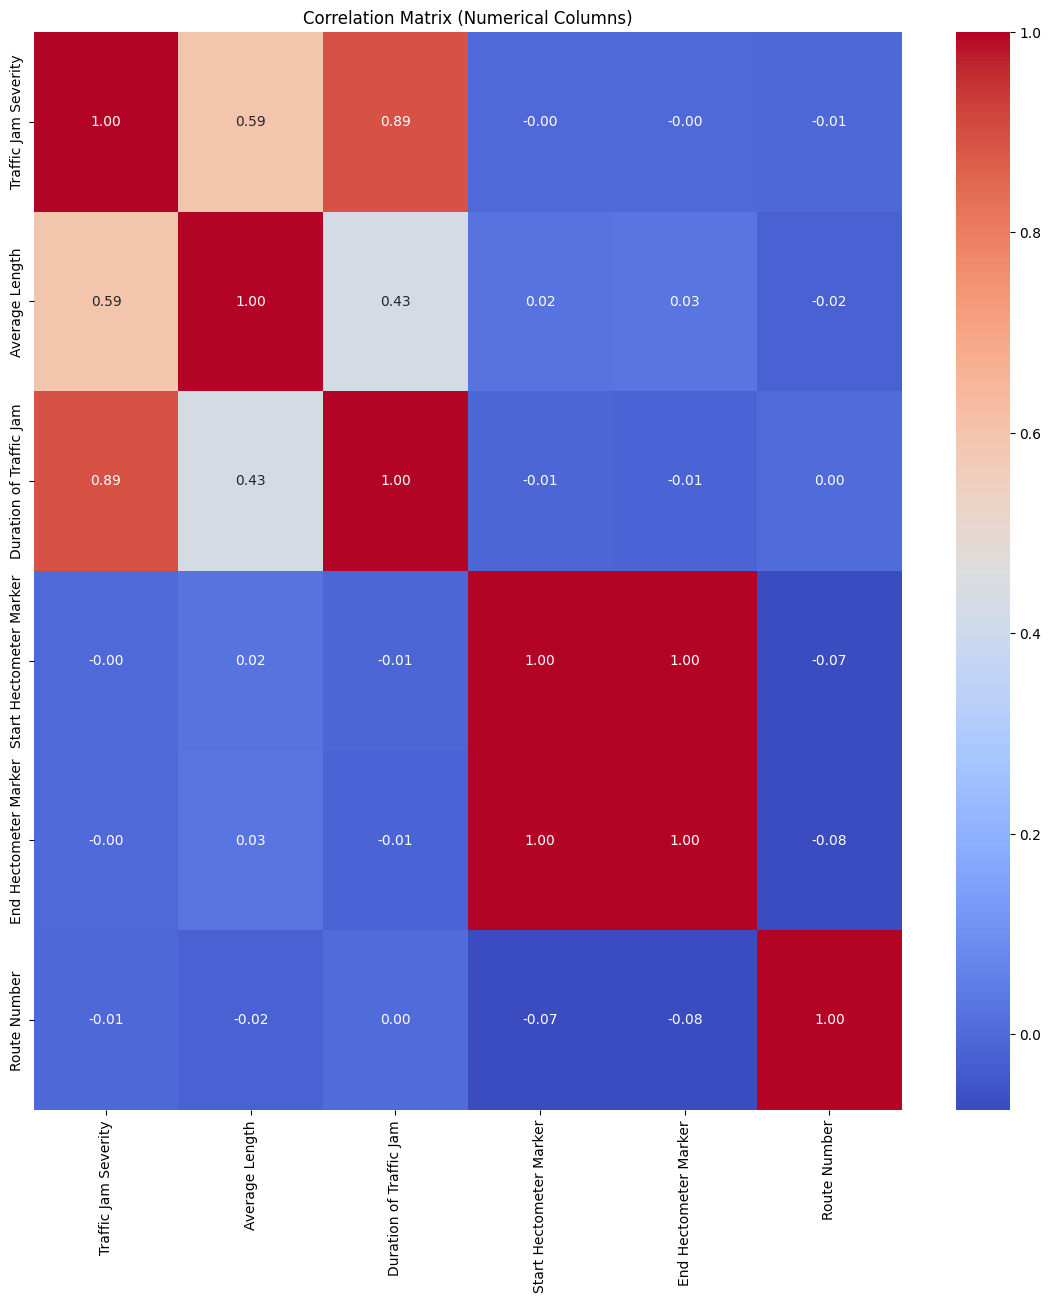

In [78]:
import matplotlib.pyplot as plt
# Selecting only the numerical columns
numerical_columns = traffic_jam.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

## Weather stations data

In [79]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

STN  LON(east)  LAT(north)  ALT(m)           NAME
0  209      4.518      52.465     0.0         IJmond
1  210      4.430      52.171    -0.2  Valkenburg Zh
2  215      4.437      52.141    -1.1    Voorschoten
3  225      4.555      52.463     4.4       IJmuiden
4  235      4.781      52.928     1.2        De Kooy

In [80]:
weather_stations.shape

(50, 5)

In [81]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [82]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data. Next, we should check the ranges and see if they fall in realistic categories.

In [83]:
weather_stations.describe()

STN  LON(east)  LAT(north)     ALT(m)
count   50.000000  50.000000   50.000000   50.00000
mean   295.240000   5.034120   52.155380    8.79000
std     47.221821   0.996242    0.675282   18.89544
min    209.000000   3.242000   50.906000   -4.30000
25%    261.250000   4.320250   51.536750    0.00000
50%    285.500000   4.957500   52.084500    1.30000
75%    328.500000   5.759500   52.641500   11.62500
max    391.000000   7.150000   53.575000  114.30000

At a first glance, the values look normal. The points as latitude and longitude seem to mostly fit in the Netherlands borders. As noted after research, Netherlands coresponds to the coordinates of ~53.51 LAT(north) and ~3.36 LON(east). We can have a look at approximate maximum and minimum:

* MAX LON : ~7.22 LON(east) 
* MAX LAT : ~53.51 LAT(north)
* MIN LON : ~3.36 LON(east)
* MIN LAT : ~50.75 LAT(north)

As specified, these seem to fit quite well in the ranges, with very slight, insignificant differences. We can, however, continue with our analysis. Later on, we will look into altitude as well.

We can have a look at the map, with each station's positioning. This would not only confirm, once again, the accuracy of the positions, but also give us an idea and overview of the exact positioning of each on the map.

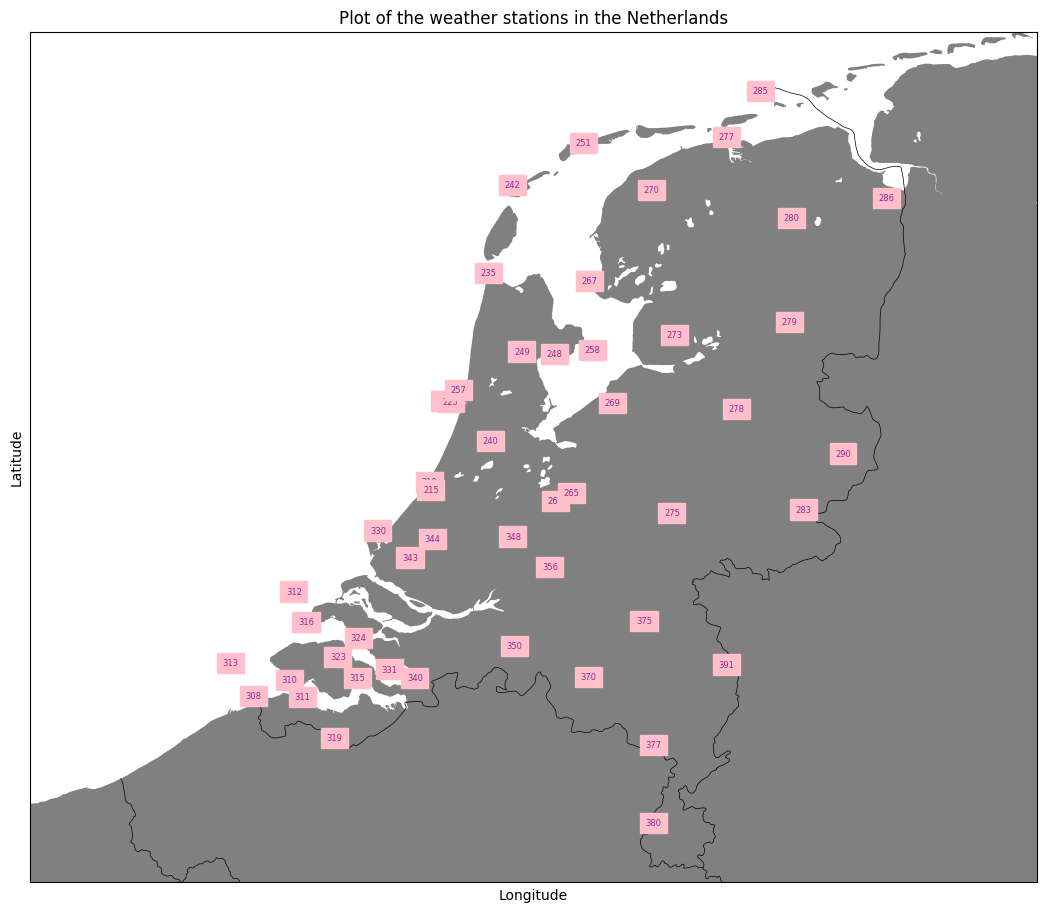

In [86]:
import numpy as np
from matplotlib import pyplot as plt


plt.figure(figsize=(13, 12))

map = Basemap(projection='merc', 
              resolution='f', 
              llcrnrlat=50.7, urcrnrlat=53.8, 
              llcrnrlon=2, urcrnrlon=8, 
              lat_ts=51)
# Plot map
map.drawcountries()
map.fillcontinents(color='grey', zorder=0)

# Plot weather station points with values as labels
x, y = map(weather_stations['LON(east)'], weather_stations['LAT(north)'])
for i in range(len(x)):
    # Adjust label placement and font size, offset labels, and use transparent background
    plt.text(x[i], y[i], f'{weather_stations["STN"][i]}', ha='right', va='bottom', fontsize=6, color='purple', backgroundcolor='pink', alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of the weather stations in the Netherlands')

plt.show()

We can now check the distribution of the altitudes.

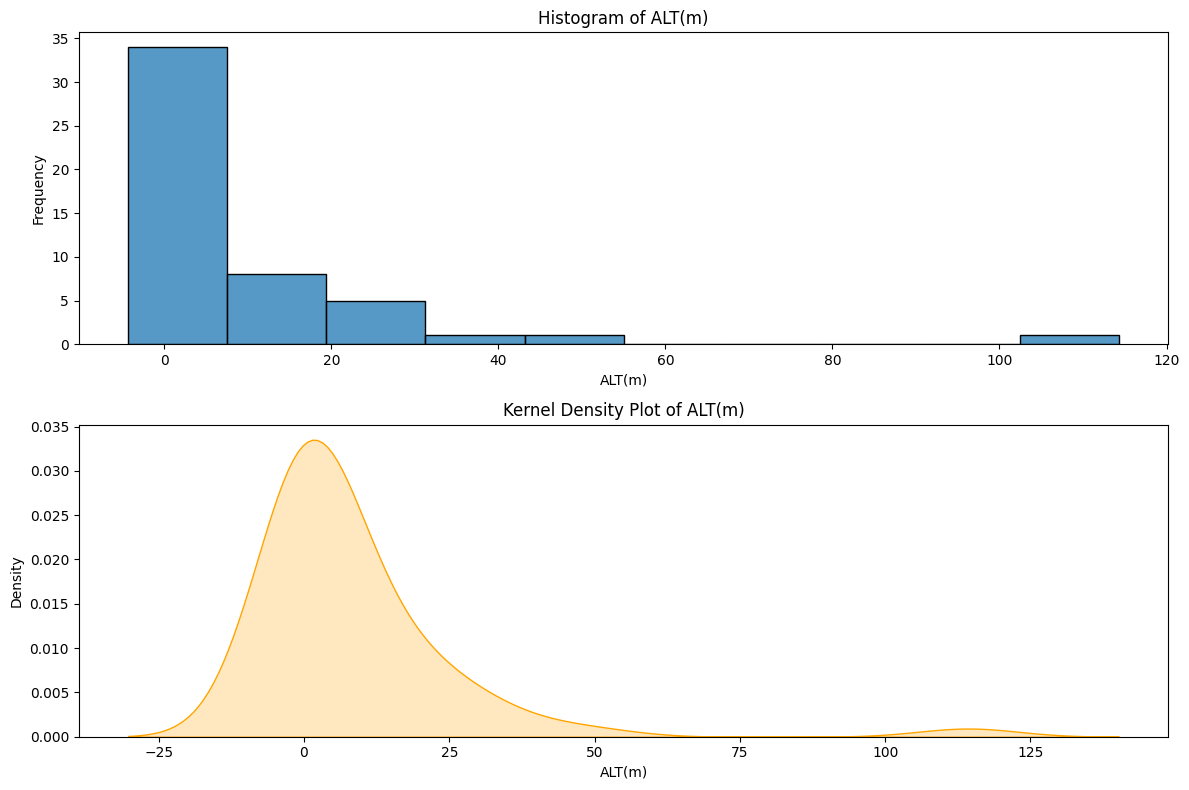

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

altitudes = weather_stations['ALT(m)']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sns.histplot(altitudes, ax=axes[0], bins=10, kde=False)  #histogram
axes[0].set_title('Histogram of ALT(m)')
axes[0].set_xlabel('ALT(m)')
axes[0].set_ylabel('Frequency')
sns.kdeplot(altitudes, ax=axes[1], color='orange', fill=True) #kernel density plot
axes[1].set_title('Kernel Density Plot of ALT(m)')
axes[1].set_xlabel('ALT(m)')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()

We can see that most weather stations are at an altitude of around 0 and slightly larger, which is expected from a country that does not have any mountains. There seems to be an outlier station, that is situated at a much higher altitude than the others. Let's see where that actually is and if it makes sense.

In [88]:
weather_stations[weather_stations['ALT(m)'] == max(altitudes)]

STN  LON(east)  LAT(north)  ALT(m)        NAME
48  380      5.762      50.906   114.3  Maastricht

We can see this is situated in Maastricht. When we look it up online, we can see the value is accurate and the station and its coordinates actually exists. Therefore, we can state that it is reliable and consider it correct. Similarly, we can check the lowest altitude we have in our dataset, to see if it is accurate.

![Screenshot 2024-04-09 205409.png](<attachment:Screenshot 2024-04-09 205409.png>)
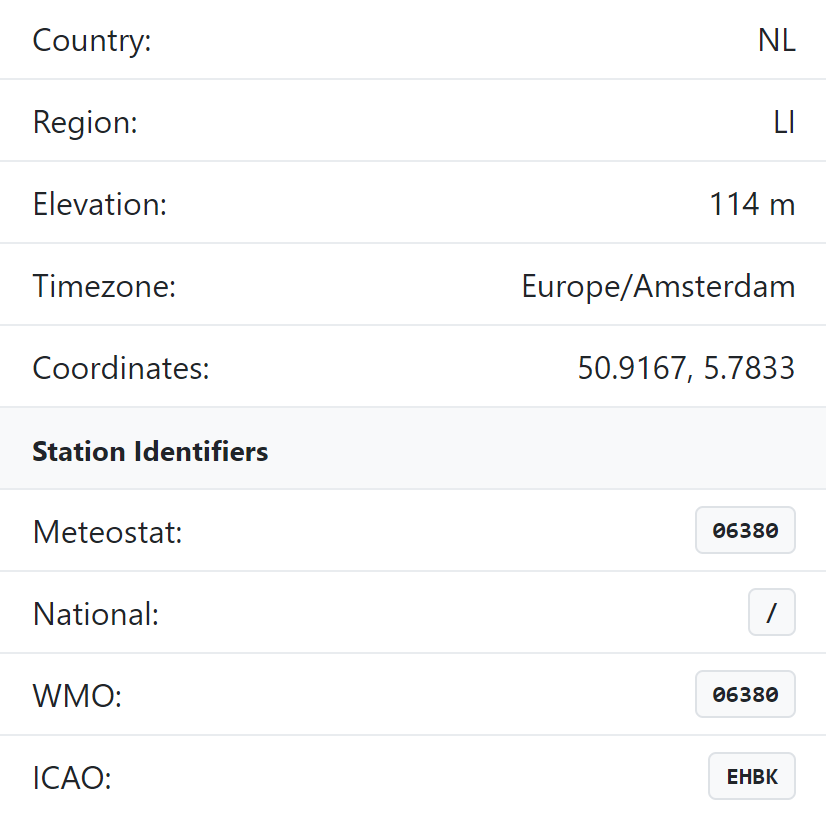

In [89]:
weather_stations[weather_stations['ALT(m)'] == min(altitudes)]

STN  LON(east)  LAT(north)  ALT(m)       NAME
41  344      4.447      51.962    -4.3  Rotterdam

This one seems to be located in Rotterdam. Since it is a harbour city, it makes sense that we have, in these kind of cities, stations under sea level. 

It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [91]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:1]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km



# Data preparation for joining

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from these 3 stations of interest. 

In [92]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 375, 380}

In [94]:
filtered_weather_data = df[df['Station ID'].isin(unique_ids)]
filtered_weather_data

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               1951-01-01         380    23                             98.0   
73              1951-01-01         380     4                             77.0   
74              1951-01-01         380     3                             72.0   
75              1951-01-01         380     2                             77.0   
76              1951-01-01         380     1                             82.0   
...                    ...         ...   ...                              ...   
19188527        2024-03-25         375    10                             30.0   
19188528        2024-03-25         375     8                             20.0   
19188534        2024-03-25         375     9                             30.0   
19188639        2024-03-25         380     4                             30.0   
19188674        2024-03-25         375     5                             20.0   

         Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0                                                 22.0   
73                                                18.0   
74                                                11.0   
75                                                 0.0   
76                                                 0.0   
...                           ...                  ...   
19188527                       50                 85.0   
19188528                       30                 62.0   
19188534                       40                 79.0   
19188639                       30                 11.0   
19188674                       30                 -4.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                       NaN                        NaN   
73                                      NaN                        NaN   
74                                      NaN                        NaN   
75                                      NaN                        NaN   
76                                      NaN                        NaN   
...                                     ...                        ...   
19188527                                0.0                        0.0   
19188528                                0.0                        0.0   
19188534                                0.0                        0.0   
19188639                                0.0                        0.0   
19188674                                0.0                        0.0   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0                    NaN            0.0                 0.0             0.0   
73                   NaN            0.0                 0.0             0.0   
74                   NaN            0.0                 0.0             0.0   
75                   NaN            0.0                 0.0             0.0   
76                   NaN            0.0                 0.0             0.0   
...                  ...            ...                 ...             ...   
19188527            66.0            0.0                 0.0             0.0   
19188528            62.0            0.0                 0.0             0.0   
19188534            65.0            0.0                 0.0             0.0   
19188639            65.0            0.0                 0.0             0.0   
19188674            56.0            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  Month  
0                            0.0                      0.0      1  
73                           0.0                      0.0      1  
74                           0.0                      0.0      1  
75                           0.0                      0.0      1  
76                           0.0                      0.0      1  
...                          ...                      ...    ...  
19188527                     0.0

To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [95]:
traffic_jam['Hour'] = traffic_jam['Start Time of Traffic Jam'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_jam

Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
0           3589057                2023-06-13              2023-06-13   
1           3589058                2023-06-13              2023-06-13   
2           3589060                2023-06-13              2023-06-13   
3           3589061                2023-06-13              2023-06-13   
4           3589062                2023-06-13              2023-06-13   
...             ...                       ...                     ...   
1581776     2756774                2020-04-10              2020-04-10   
1581777     2756818                2020-04-10              2020-04-10   
1581778     2756726                2020-04-09              2020-04-09   
1581779     2756735                2020-04-09              2020-04-09   
1581780     2756909                2020-04-13              2020-04-13   

        Start Time of Traffic Jam End Time of Traffic Jam  \
0                        16:54:29                17:00:06   
1                        16:54:29                17:09:01   
2                        16:54:29                16:56:05   
3                        16:54:29                17:06:00   
4                        16:54:29                17:04:00   
...                           ...                     ...   
1581776                   6:31:00                 7:14:41   
1581777                  16:46:00                17:35:32   
1581778                  14:14:00                14:17:40   
1581779                  16:03:00                16:15:27   
1581780                  16:40:00                17:41:19   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
0                      13.480        2400.000                    5.617   
1                      46.287        3185.000                   14.533   
2                       5.120        3200.000                    1.600   
3                      29.525        2564.000                   11.517   
4                      28.952        3042.000                    9.517   
...                       ...             ...                      ...   
1581776               102.150        2338.421                   43.683   
1581777               139.217        2810.565                   49.533   
1581778                 7.333        2000.000                    3.667   
1581779                25.900        2080.321                   12.450   
1581780               122.633        2000.000                   61.317   

         Start Hectometer Marker  End Hectometer Marker  ...  \
0                           45.6                   47.9  ...   
1                           31.4                   28.2  ...   
2                          166.5                  169.7  ...   
3                           82.8                   85.6  ...   
4                          144.3                  140.6  ...   
...                          ...                    ...  ...   
1581776                     52.3                   50.3  ...   
1581777                    146.2                  144.2  ...   
1581778                     30.0                   32.0  ...   
1581779                     51.5                   53.5  ...   
1581780                    111.6                  113.6  ...   

                                         Cause Progression  \
0                  [Geen oorzaakcode opgegeven door VWM 6]   
1                 [Geen oorzaakcode opgegeven door VWM 15]   
2                  [Geen oorzaakcode opgegeven door VWM 2]   
3                 [Geen oorzaakcode opgegeven door VWM 12]   
4                 [Geen oorzaakcode opgegeven door VWM 10]   
...                                                    ...   
1581776  [Geen oorzaakcode opgegeven door VWM 1], [Opru...   
1581777  [Opruimingswerkzaamheden 46], [Eerder(e) ongev...   
1581778  [Geen oorzaakcode opgegeven door VWM 1], [Te h...   
1581779           [Geen oorzaakcode opgegeven door VWM 12]   
1581780  [Geen oorzaakcode opgegeven door VWM 1], [Onge...

To get an overview of the times when most traffic jams happen, we can create a line/bar chart.

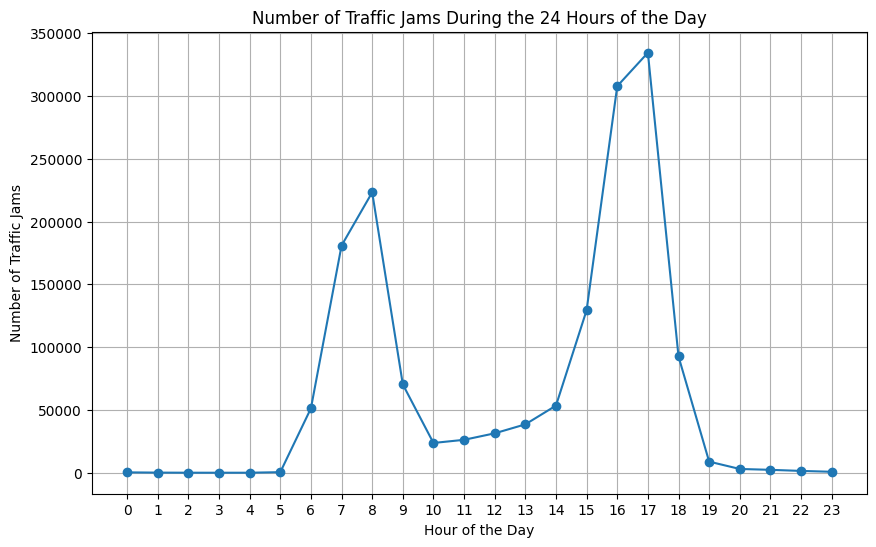

In [96]:
hourly_counts = traffic_jam['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

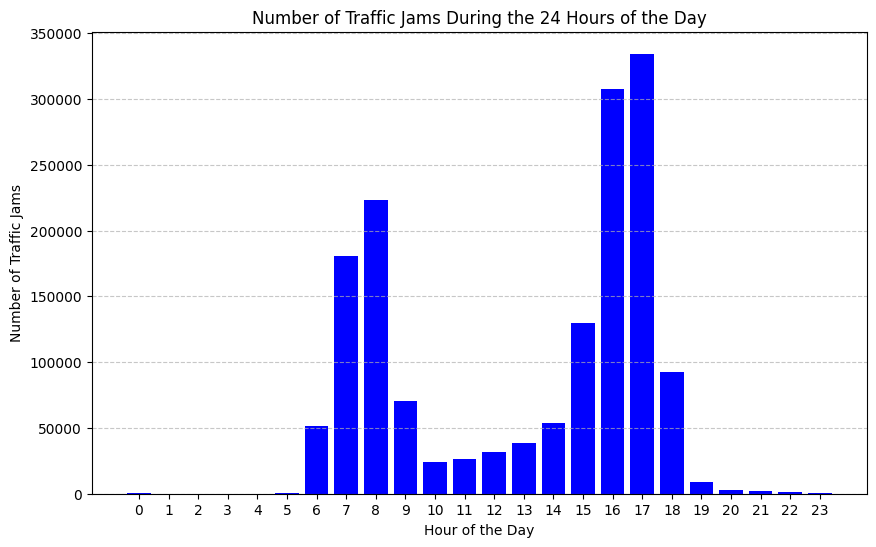

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.

In [98]:
filtered_traffic= traffic_jam[(traffic_jam['Route Description'] == 'A73') | (traffic_jam['Route Description'] == 'A2')]
filtered_traffic


Site Number Start Date of Traffic Jam End Date of Traffic Jam  \
7           3589149                2023-06-13              2023-06-13   
41          3589794                2023-06-13              2023-06-13   
61          3590025                2023-06-14              2023-06-14   
66          3590065                2023-06-14              2023-06-14   
74          3590164                2023-06-14              2023-06-14   
...             ...                       ...                     ...   
1581684     2757675                2020-04-23              2020-04-23   
1581715     2757792                2020-04-24              2020-04-24   
1581760     2756631                2020-04-08              2020-04-08   
1581765     2756680                2020-04-09              2020-04-09   
1581772     2756682                2020-04-09              2020-04-09   

        Start Time of Traffic Jam End Time of Traffic Jam  \
7                        17:03:29                17:17:00   
41                       18:37:28                18:43:00   
61                        7:12:25                 7:25:02   
66                        7:25:25                 8:07:00   
74                        7:49:26                 7:51:00   
...                           ...                     ...   
1581684                  12:12:00                12:32:56   
1581715                  13:35:00                13:45:06   
1581760                  12:58:00                15:06:07   
1581765                   6:25:00                 6:31:41   
1581772                   6:31:00                 7:02:04   

         Traffic Jam Severity  Average Length  Duration of Traffic Jam  \
7                      32.867        2432.000                   13.517   
41                     16.465        2976.000                    5.533   
61                     41.488        3288.000                   12.617   
66                    216.928        5217.000                   41.583   
74                      3.447        2200.000                    1.567   
...                       ...             ...                      ...   
1581684                57.350        2739.650                   20.933   
1581715                20.200        2000.000                   10.100   
1581760               405.883        3168.076                  128.117   
1581765                13.367        2000.000                    6.683   
1581772                62.200        2002.146                   31.067   

         Start Hectometer Marker  End Hectometer Marker  ...  \
7                          115.9                  118.1  ...   
41                          92.0                   89.5  ...   
61                          43.8                   41.4  ...   
66                          44.2                   40.0  ...   
74                         105.5                  103.3  ...   
...                          ...                    ...  ...   
1581684                    162.3                  164.3  ...   
1581715                    219.2                  221.2  ...   
1581760                     90.6                   92.6  ...   
1581765                     68.9                   70.9  ...   
1581772                     69.1                   71.1  ...   

                                         Cause Progression  \
7                 [Geen oorzaakcode opgegeven door VWM 14]   
41                 [Geen oorzaakcode opgegeven door VWM 6]   
61                [Geen oorzaakcode opgegeven door VWM 13]   
66                [Geen oorzaakcode opgegeven door VWM 42]   
74                 [Geen oorzaakcode opgegeven door VWM 2]   
...                                                    ...   
1581684  [Geen oorzaakcode opgegeven door VWM 1], [Defe...   
1581715  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   
1581760  [Geen oorzaakcode opgegeven door VWM 3], [Opru...   
1581765       [Ongeval(len) 5], [Eerder(e) ongeval(len) 2]   
1581772  [Geen oorzaakcode opgegeven door VWM 1], [Eerd...

# Data joining

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [99]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

STN  LON(east)  LAT(north)  ALT(m)        NAME Date (YYYY-MM-DD)  \
0        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
1        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
2        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
3        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
4        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
...      ...        ...         ...     ...         ...               ...   
1576537  380      5.762      50.906   114.3  Maastricht        2024-03-25   
1576538  380      5.762      50.906   114.3  Maastricht        2024-03-25   
1576539  380      5.762      50.906   114.3  Maastricht        2024-03-25   
1576540  380      5.762      50.906   114.3  Maastricht        2024-03-25   
1576541  380      5.762      50.906   114.3  Maastricht        2024-03-25   

         Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               356    24                              NaN   
1               356    23                              NaN   
2               356    22                              NaN   
3               356    21                              NaN   
4               356    20                             26.0   
...             ...   ...                              ...   
1576537         380     5                             40.0   
1576538         380     3                             30.0   
1576539         380     1                             30.0   
1576540         380     2                             30.0   
1576541         380     4                             30.0   

        Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0                                               157.0   
1                                               157.0   
2                                               157.0   
3                                               157.0   
4                             36                138.0   
...                          ...                  ...   
1576537                       50                 18.0   
1576538                       40                 13.0   
1576539                       40                 24.0   
1576540                       40                 21.0   
1576541                       30                 11.0   

         Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                      NaN                        NaN   
1                                      NaN                        NaN   
2                                      NaN                        NaN   
3                                      NaN                        NaN   
4                                      NaN                        NaN   
...                                    ...                        ...   
1576537                                0.0                        0.0   
1576538                                0.0                        0.0   
1576539                                0.0                        0.0   
1576540                                0.0                        0.0   
1576541                                0.0                        0.0   

         Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0                   NaN            0.0                 0.0             0.0   
1                   NaN            0.0                 0.0             0.0   
2                   NaN            0.0                 0.0             0.0   
3                   NaN            0.0                 0.0             0.0   
4                   NaN            0.0                 0.0             0.0   
...                 ...            ...                 ...             ...   
1576537            65.0            0.0                 0.0             0.0   
1576538            61.0            0.0                 0.0             0.0   
1576539            65.0            0.0                 0.0             0.0 

Finally, we reach our (initial) final table by performing a left join on the previously created table and the traffic data we filtered. We decided to join based on both date and hour, so in this way we can keep records of all days and hours recorded by the weather stations we selected. In the future, we can try reducing this number by removing some dates that might be too far in the past to be relevant, but this is the table we will keep for now.

In [100]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['Start Date of Traffic Jam', 'Hour'], how = 'left')
merged_data

STN  LON(east)  LAT(north)  ALT(m)        NAME Date (YYYY-MM-DD)  \
0        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
1        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
2        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
3        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
4        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
...      ...        ...         ...     ...         ...               ...   
2089621  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089622  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089623  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089624  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089625  380      5.762      50.906   114.3  Maastricht        2024-03-25   

         Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               356    24                              NaN   
1               356    23                              NaN   
2               356    22                              NaN   
3               356    21                              NaN   
4               356    20                             26.0   
...             ...   ...                              ...   
2089621         380     5                             40.0   
2089622         380     3                             30.0   
2089623         380     1                             30.0   
2089624         380     2                             30.0   
2089625         380     4                             30.0   

        Highest Wind Gust (m/s)   ...  Detailed Cause  Cause Progression  \
0                                 ...             NaN                NaN   
1                                 ...             NaN                NaN   
2                                 ...             NaN                NaN   
3                                 ...             NaN                NaN   
4                             36  ...             NaN                NaN   
...                          ...  ...             ...                ...   
2089621                       50  ...             NaN                NaN   
2089622                       40  ...             NaN                NaN   
2089623                       40  ...             NaN                NaN   
2089624                       40  ...             NaN                NaN   
2089625                       30  ...             NaN                NaN   

         Cause Progression Code  Cause Code  Cause 1  Cause 2  Cause 3  \
0                           NaN         NaN      NaN      NaN      NaN   
1                           NaN         NaN      NaN      NaN      NaN   
2                           NaN         NaN      NaN      NaN      NaN   
3                           NaN         NaN      NaN      NaN      NaN   
4                           NaN         NaN      NaN      NaN      NaN   
...                         ...         ...      ...      ...      ...   
2089621                     NaN         NaN      NaN      NaN      NaN   
2089622                     NaN         NaN      NaN      NaN      NaN   
2089623                     NaN         NaN      NaN      NaN      NaN   
2089624                     NaN         NaN      NaN      NaN      NaN   
2089625                     NaN         NaN      NaN      NaN      NaN   

         Cause 4  Start Datetime  End Datetime  
0            NaN             NaT           NaT  
1            NaN             NaT           NaT  
2            NaN             NaT           NaT  
3            NaN             NaT           NaT  
4            NaN             NaT           NaT  
...          ...             ...           ...  
2089621      NaN             NaT           NaT  
2089622      NaN             NaT           NaT  
2089623      NaN             NaT           NaT  
2089624      NaN             NaT           NaT 

## EDA on (initial) final dataset 
#### For the requested weather stations and roads

We will add a new column, that displays the weekday name of each date.

In [101]:
merged_data['Date (YYYY-MM-DD)']= pd.to_datetime(merged_data['Date (YYYY-MM-DD)'])

merged_data['Weekday Name'] = merged_data['Date (YYYY-MM-DD)'].dt.day_name()

merged_data

STN  LON(east)  LAT(north)  ALT(m)        NAME Date (YYYY-MM-DD)  \
0        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
1        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
2        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
3        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
4        356      5.146      51.859     0.7   Herwijnen        1989-10-05   
...      ...        ...         ...     ...         ...               ...   
2089621  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089622  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089623  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089624  380      5.762      50.906   114.3  Maastricht        2024-03-25   
2089625  380      5.762      50.906   114.3  Maastricht        2024-03-25   

         Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               356    24                              NaN   
1               356    23                              NaN   
2               356    22                              NaN   
3               356    21                              NaN   
4               356    20                             26.0   
...             ...   ...                              ...   
2089621         380     5                             40.0   
2089622         380     3                             30.0   
2089623         380     1                             30.0   
2089624         380     2                             30.0   
2089625         380     4                             30.0   

        Highest Wind Gust (m/s)   ...  Cause Progression  \
0                                 ...                NaN   
1                                 ...                NaN   
2                                 ...                NaN   
3                                 ...                NaN   
4                             36  ...                NaN   
...                          ...  ...                ...   
2089621                       50  ...                NaN   
2089622                       40  ...                NaN   
2089623                       40  ...                NaN   
2089624                       40  ...                NaN   
2089625                       30  ...                NaN   

         Cause Progression Code  Cause Code  Cause 1  Cause 2  Cause 3  \
0                           NaN         NaN      NaN      NaN      NaN   
1                           NaN         NaN      NaN      NaN      NaN   
2                           NaN         NaN      NaN      NaN      NaN   
3                           NaN         NaN      NaN      NaN      NaN   
4                           NaN         NaN      NaN      NaN      NaN   
...                         ...         ...      ...      ...      ...   
2089621                     NaN         NaN      NaN      NaN      NaN   
2089622                     NaN         NaN      NaN      NaN      NaN   
2089623                     NaN         NaN      NaN      NaN      NaN   
2089624                     NaN         NaN      NaN      NaN      NaN   
2089625                     NaN         NaN      NaN      NaN      NaN   

         Cause 4  Start Datetime  End Datetime  Weekday Name  
0            NaN             NaT           NaT      Thursday  
1            NaN             NaT           NaT      Thursday  
2            NaN             NaT           NaT      Thursday  
3            NaN             NaT           NaT      Thursday  
4            NaN             NaT           NaT      Thursday  
...          ...             ...           ...           ...  
2089621      NaN             NaT           NaT        Monday  
2089622      NaN             NaT           NaT        Monday  
2089623      NaN             NaT           NaT        Monday  
2089624      NaN             NaT           NaT        Monday  
2089625      NaN             NaT    

In [102]:
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])

unique_dates_weekdays['Weekday Name'].value_counts()

Weekday Name
Thursday     3821
Friday       3821
Saturday     3821
Sunday       3821
Monday       3821
Tuesday      3821
Wednesday    3821
Name: count, dtype: int64

It seems that we have a perfectly even distribution of records for each weekday. It might be interesting to see how much out of each is days with traffic jams.

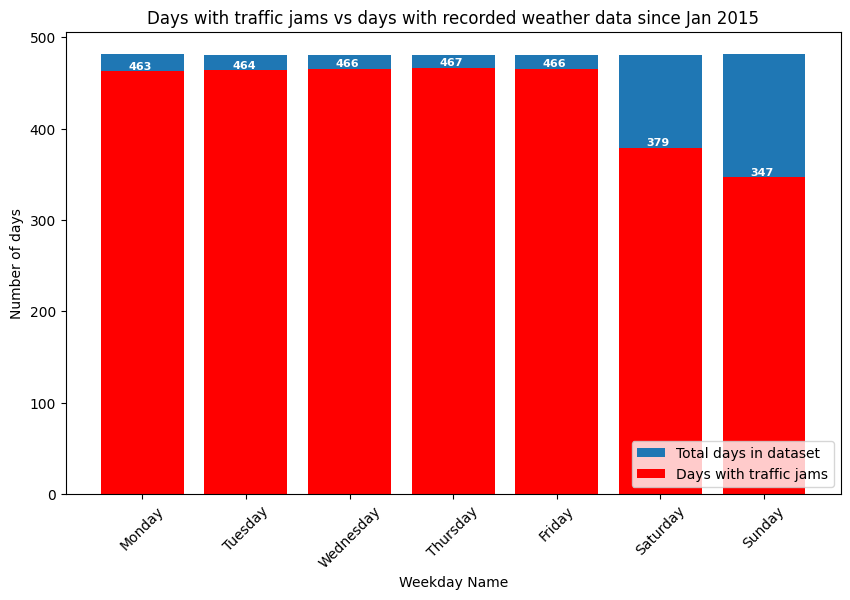

In [103]:
# Unique weekdays in the dataset with recorded weather data
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])
min_date = merged_data['Start Date of Traffic Jam'].min()
unique_dates_weekdays = unique_dates_weekdays[unique_dates_weekdays['Date (YYYY-MM-DD)'] >= min_date]
value_counts = unique_dates_weekdays['Weekday Name'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_value_counts = value_counts.reindex(weekday_order)

# Unique days with traffic jams (one or more)
unique_weekdays_with_traffic = merged_data.drop_duplicates(subset=['Start Date of Traffic Jam', 'Weekday Name']) 
value_counts_traffic = unique_weekdays_with_traffic['Weekday Name'].value_counts()
sorted_value_counts_traffic = value_counts_traffic.reindex(weekday_order)

plt.figure(figsize=(10, 6))
bars1 =plt.bar(sorted_value_counts.index, sorted_value_counts.values)
bars = plt.bar(sorted_value_counts_traffic.index, sorted_value_counts_traffic.values, color = 'red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, yval, int(yval), va='bottom',fontsize=8, color='white',  fontweight='bold')

plt.xlabel('Weekday Name')
plt.ylabel('Number of days')
plt.title('Days with traffic jams vs days with recorded weather data since Jan 2015')
plt.xticks(rotation=45)
plt.legend([bars1, bars], ['Total days in dataset', 'Days with traffic jams'], loc='lower right')
plt.show()


We can see, as expected, that the weekends have significantly less traffic jams than the workdays. This could be due people not having to go to work.

Since we can see that the traffic data starts from 2015, whereas the weather data states even back to 1951, it created a huge number of NAs in our final table. We can, for the future, consider reducing the dataset to only records starting 2015.

In [104]:
print(merged_data['Start Date of Traffic Jam'].min())
print(merged_data['Date (YYYY-MM-DD)'].min())

2015-01-04 00:00:00
1951-01-01 00:00:00


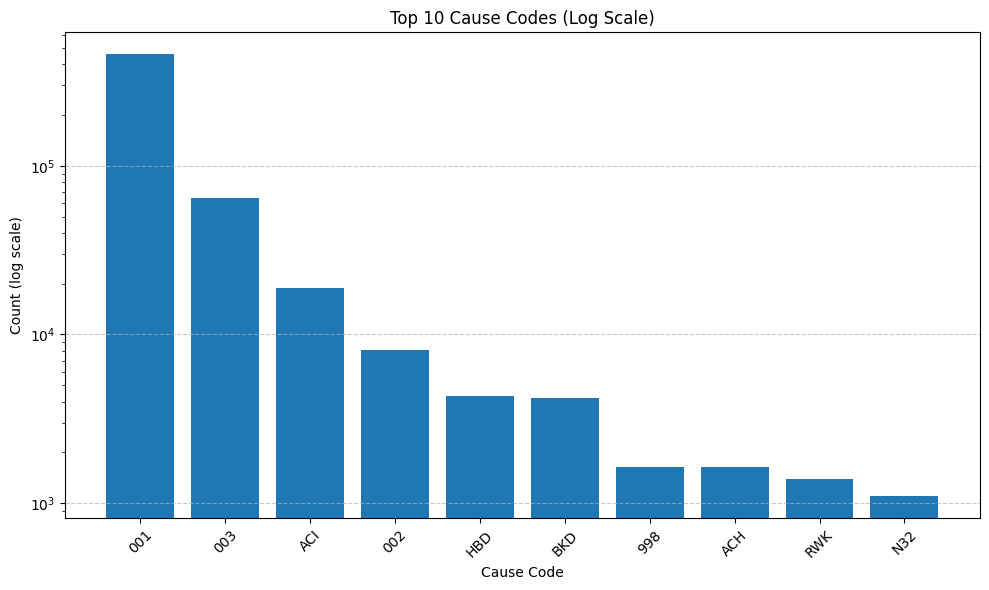

In [105]:
top_n = 10

cause_code_counts = merged_data['Cause Code'].value_counts()
#Since we see big differenc between causes, we will select the top 10
top_cause_code_counts = cause_code_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_cause_code_counts.index, top_cause_code_counts)
plt.yscale('log') 
plt.title(f'Top {top_n} Cause Codes (Log Scale)')
plt.xlabel('Cause Code')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can try spotting some initial relationships between relevant variables by creating a pairplot.

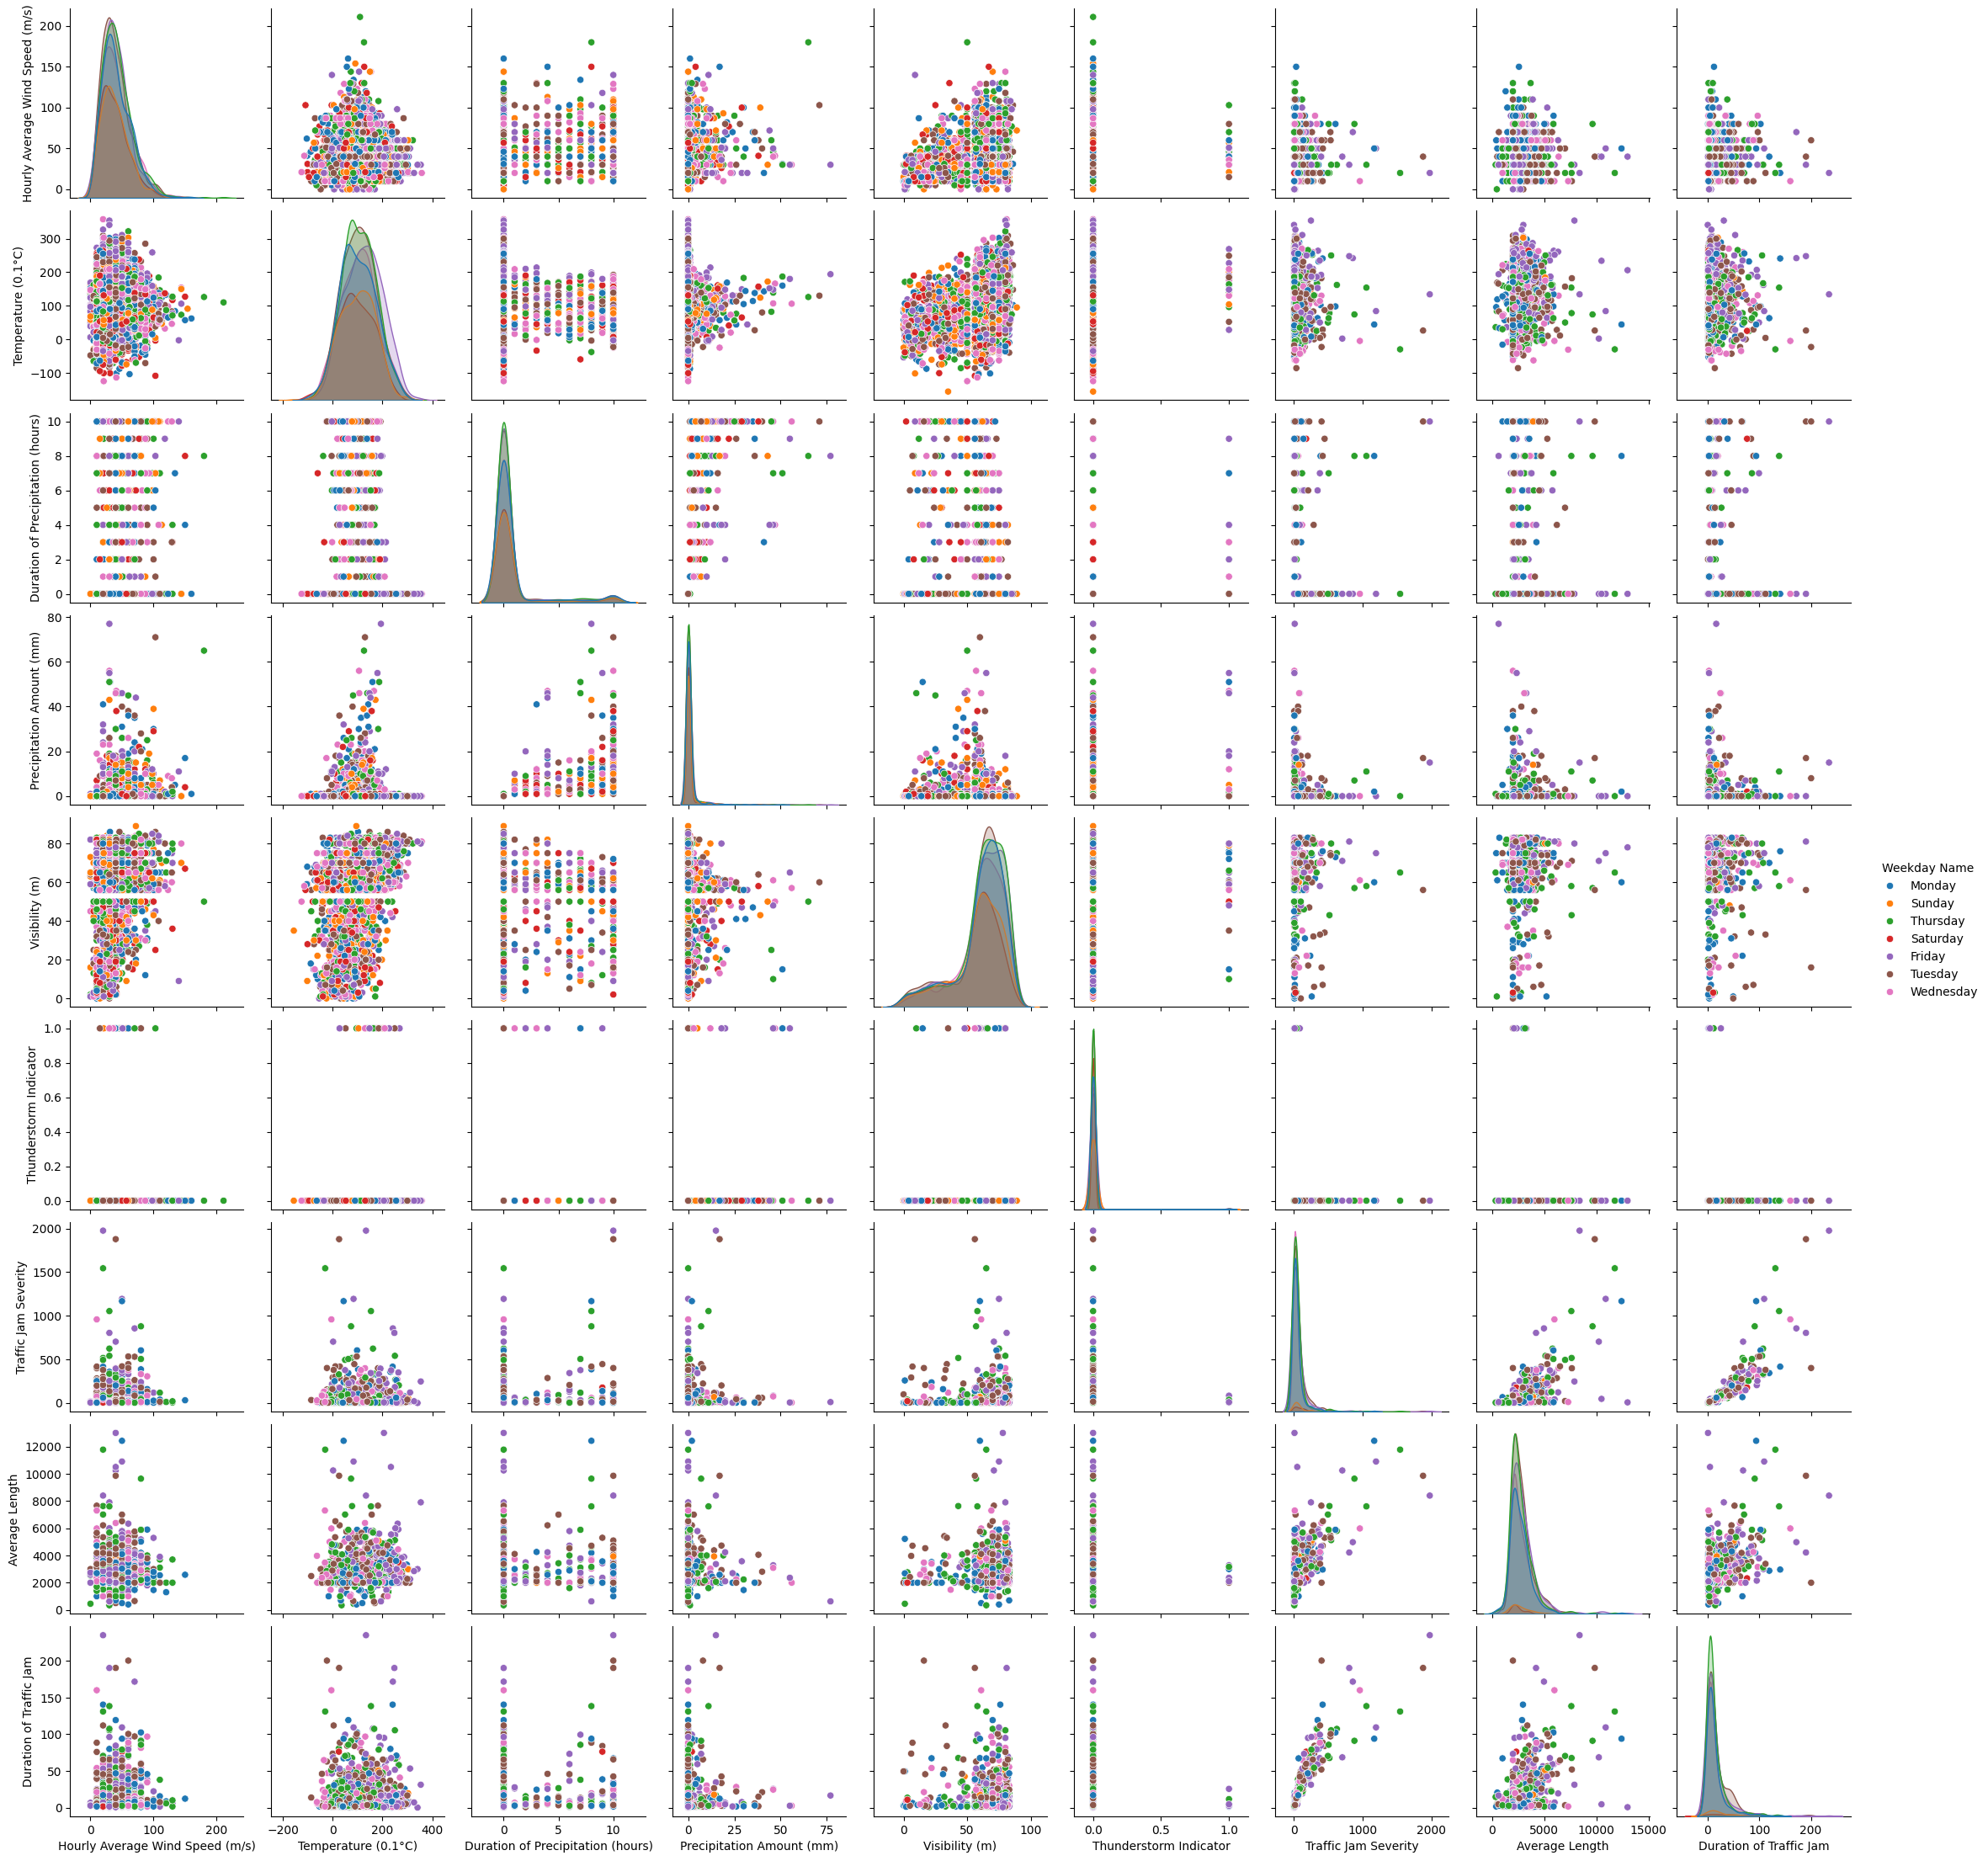

In [107]:
import seaborn as sns

columns_to_drop = ['LON(east)', 'LAT(north)', 'Rainfall Indicator', 'Snow Indicator',
       'Fog Indicator', 'Ice Formation Indicator', 'Site Number', 'Route Number', 'ALT(m)', 'Start Hectometer Marker', 'End Hectometer Marker' ]
categorical_data = merged_data.select_dtypes(exclude=['int32', 'int64'])
categorical_data = categorical_data.drop(columns=columns_to_drop)
sns.pairplot(categorical_data.sample(5000), hue="Weekday Name")

As the dataset has a lot of columns and rows, it would take to much time to try and see the results of a pairplot on all data. However, we could keep the number of relevant columns, but simply reduce the rows to a reasonable number, so that we can still spot a trend, while taking all columns into account.

We are specifically interested in **Duration of the traffic jam** and **Severity of the traffic jam**. We can observe already that these 2 form some kind of linear relationship, therefore leading us to think that the grade given for severity is heavily influenced also by duration. We can also see, for both of them, that they are somewhat displaying a linear relationship with the **Average Length**, although not as strong. 

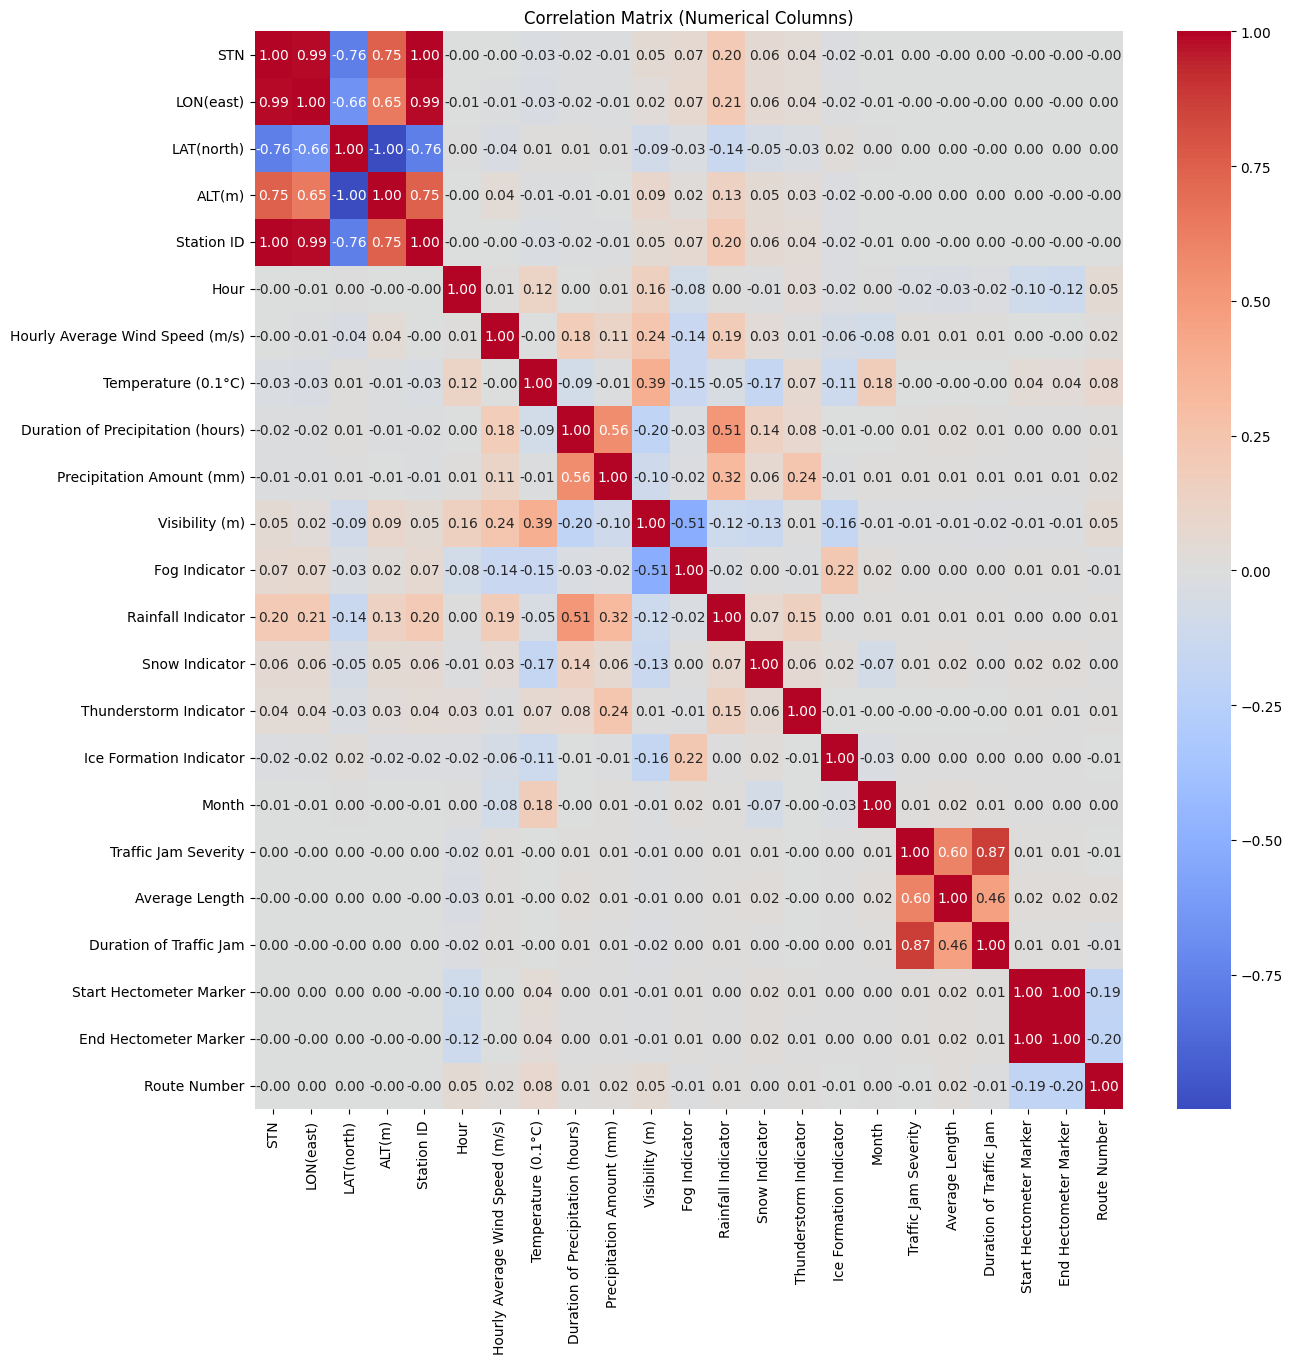

In [108]:
# Selecting only the numerical columns
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

We can not observe any relevant correlations. :-( This, however, is constant with our discoveries from the pairplot, as we can only observe the same main correlations we could also spot from the initial graphs. I am making this message to test the push-commit-pull chain. ddd

In [109]:
merged_data.head()

STN  LON(east)  LAT(north)  ALT(m)       NAME Date (YYYY-MM-DD)  \
0  356      5.146      51.859     0.7  Herwijnen        1989-10-05   
1  356      5.146      51.859     0.7  Herwijnen        1989-10-05   
2  356      5.146      51.859     0.7  Herwijnen        1989-10-05   
3  356      5.146      51.859     0.7  Herwijnen        1989-10-05   
4  356      5.146      51.859     0.7  Herwijnen        1989-10-05   

   Station ID  Hour  Hourly Average Wind Speed (m/s) Highest Wind Gust (m/s)   \
0         356    24                              NaN                            
1         356    23                              NaN                            
2         356    22                              NaN                            
3         356    21                              NaN                            
4         356    20                             26.0                       36   

   ...  Cause Progression  Cause Progression Code  Cause Code  Cause 1  \
0  ...                NaN                     NaN         NaN      NaN   
1  ...                NaN                     NaN         NaN      NaN   
2  ...                NaN                     NaN         NaN      NaN   
3  ...                NaN                     NaN         NaN      NaN   
4  ...                NaN                     NaN         NaN      NaN   

   Cause 2  Cause 3  Cause 4  Start Datetime  End Datetime  Weekday Name  
0      NaN      NaN      NaN             NaT           NaT      Thursday  
1      NaN      NaN      NaN             NaT           NaT      Thursday  
2      NaN      NaN      NaN             NaT           NaT      Thursday  
3      NaN      NaN      NaN             NaT           NaT      Thursday  
4      NaN      NaN      NaN             NaT           NaT      Thursday  

[5 rows x 49 columns]

In [110]:
# Isolating the columns that need to be cleaned, the ones that correlate to them the most and other ones that might impact NAs (STN, Hour, Route Number) for computational efficiency

alex_cleaning = merged_data[['STN', 'Hour', 'Hourly Average Wind Speed (m/s)', 'Mean Wind Speed (m/s)', 'Maximum Wind Speed (m/s)', 'Duration of Precipitation (hours)', 'Precipitation Amount (mm)', 'Visibility (m)', 'Present Weather', 'Rainfall Indicator']]
alex_cleaning.head()

KeyError: "['Mean Wind Speed (m/s)', 'Maximum Wind Speed (m/s)', 'Present Weather'] not in index"

In [ ]:
alex_cleaning.shape

(2089653, 10)

In [ ]:
alex_cleaning.isna().sum()

STN                                        0
Hour                                       0
Hourly Average Wind Speed (m/s)       175941
Mean Wind Speed (m/s)                   4982
Maximum Wind Speed (m/s)              345361
Duration of Precipitation (hours)     288629
Precipitation Amount (mm)             288614
Visibility (m)                        504291
Present Weather                      1008097
Rainfall Indicator                    497331
dtype: int64

First, we will clean the Hourly Average Wind Speed column.

Text(0, 0.5, 'Hourly Average Wind Speed (m/s)')

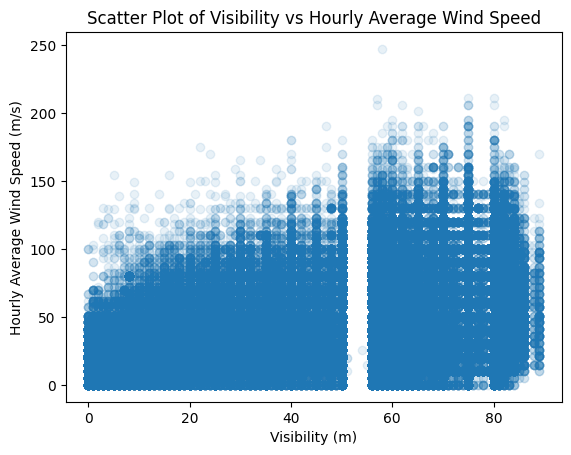

In [ ]:
plt.scatter(alex_cleaning['Visibility (m)'], alex_cleaning['Hourly Average Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Hourly Average Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Hourly Average Wind Speed (m/s)')

In [ ]:
alex_cleaning['Visibility (m)'].value_counts()

Visibility (m)
70.0    170350
75.0    146527
65.0    123172
80.0    109443
60.0     79710
         ...  
87.0        22
51.0         3
55.0         1
52.0         1
54.0         1
Name: count, Length: 89, dtype: int64

Something interesting is that we have very few cases if visibility being getween 51-55 meters. We can see that with the increase of visibility, the upper limit of the hourly average wind speed increases. This could help us replace the missing values more appropriately. Now, instead of replacing them with the mean hourly average wind speed, we can split the visibility in sectors (between 0-30, 30-60, 60-90) and replace the missing value with the mean of the sector that it's in. Before doing that, lets explore further to see if there are other more meaningful correlations.

In [ ]:
alex_cleaning['Rainfall Indicator'].value_counts()

Rainfall Indicator
0.0     1273613
1.0      318708
11.0          1
Name: count, dtype: int64

We can see that there is 1 instance of the rainfall indicator stating 11. I will assume that this is a human error and it's supposed to say 1 because 0 and 1 are the only two numbers that this variable uses (0 for no rain and 1 for rain).

In [ ]:
alex_cleaning['Rainfall Indicator'] = alex_cleaning['Rainfall Indicator'].replace(11, 1)

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\2659713466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Rainfall Indicator'] = alex_cleaning['Rainfall Indicator'].replace(11, 1)


In [ ]:
alex_cleaning['Rainfall Indicator'].value_counts()

Rainfall Indicator
0.0    1273613
1.0     318709
Name: count, dtype: int64

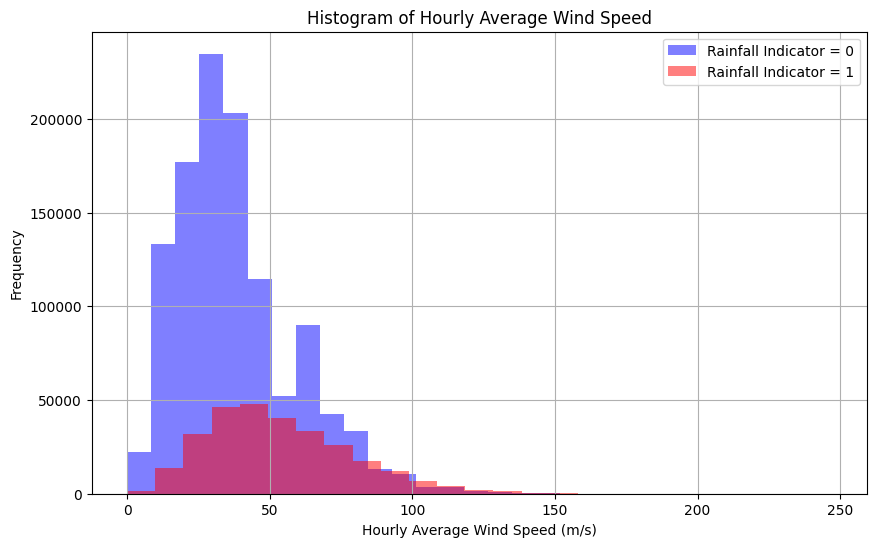

In [ ]:
wind_speed_rain_0 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 0]['Hourly Average Wind Speed (m/s)']
wind_speed_rain_1 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 1]['Hourly Average Wind Speed (m/s)']

plt.figure(figsize=(10, 6))
plt.hist(wind_speed_rain_0, bins=25, alpha=0.5, color='blue', label='Rainfall Indicator = 0')
plt.hist(wind_speed_rain_1, bins=25, alpha=0.5, color='red', label='Rainfall Indicator = 1')
plt.title('Histogram of Hourly Average Wind Speed')
plt.xlabel('Hourly Average Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

We can see that the hourly average wind speed stays roughly in the same range both when it is raining and when it's not, so we can say that rain does not impact it significantly enough. The only thing is that the peaks of the hourly average wind speed occur when it's raining.

In [ ]:
alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1403013176.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
STN                                                                      
356    0     0                             1390                   1391   
375    0     0                           174551                   3591   
380    0     0                                0                      0   

     Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
STN                                                                
356                      1813                              31564   
375                    176470                             204481   
380                    167078                              52584   

     Precipitation Amount (mm)  Visibility (m)  Present Weather  \
STN                                                               
356                      31550          432066           453554   
375                     204480           36384           285171   
380                      52584           35841           269372   

     Rainfall Indicator  
STN                      
356              432069  
375               62640  
380                2622

We can see that the hourly average wind speed is missing mostly from station 375 which is located between Den Bosch and Boxmeer. There are also missing values of the hourly average windspeed for station 356 but they are not that many.

In [ ]:
alex_cleaning[alex_cleaning['STN']==375].groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1754831458.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning[alex_cleaning['STN']==375].groupby('Hour').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
Hour                                                                      
1       0     0                             7273                    595   
2       0     0                             7273                    591   
3       0     0                             7273                     86   
4       0     0                             7273                     68   
5       0     0                             7273                     65   
6       0     0                             7273                     23   
7       0     0                             7273                     23   
8       0     0                             7273                     24   
9       0     0                             7273                     22   
10      0     0                             7273                     28   
11      0     0                             7273                     29   
12      0     0                             7273                     28   
13      0     0                             7273                     29   
14      0     0                             7273                     29   
15      0     0                             7273                     29   
16      0     0                             7273                     30   
17      0     0                             7273                     31   
18      0     0                             7273                     30   
19      0     0                             7273                     44   
20      0     0                             7273                    167   
21      0     0                             7273                    167   
22      0     0                             7273                    613   
23      0     0                             7273                    615   
24      0     0                             7272                    225   

      Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
Hour                                                                
1                         7354                               8520   
2                         7353                               8520   
3                         7352                               8520   
4                         7358                               8520   
5                         7359                               8520   
6                         7363                               8520   
7                         7364                               8520   
8                         7364                               8520   
9                         7368                               8520   
10                        7365                               8520   
11                        7365                               8520   
12                        7363                               8521   
13                        7357                               8520   
14                        7348                               8520   
15                        7340                               8520   
16                        7339                               8520   
17                        7335                               8520   
18                        7342                               8520   
19                        7344                               8520   
20                        7345                               8520   
21                        7351                               8520   
22                        7349                               8520   
23                        7344                               8520   
24                        7348                               8520   

      Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Hour                                                               
1                          8520            1788             8149   
2                          8520            1785         

We see that we have the same amount of NAs for the hourly average wind speed for each hour of the day. This means that whether the value is missing or not does not depend on the hour. 

After we analyzed the hourly average wind speed column, I would suggest that we replace the missing values in the following way: add a column for the visibility sector (between 0-30, 30-60 or 60-90), then group by 'Visibility sector' and replace the missing values with the mean for that sector. For the cases where 'Visibility (m)' is missing explicitly, we will replace the hourly average wind speed with the mean of the the whole column.

In [ ]:
def categorize_visibility(visibility):
    if pd.isna(visibility):
        return visibility  
    elif visibility <= 30:
        return 1
    elif visibility <= 60:
        return 2
    else:
        return 3

alex_cleaning['Visibility Sector'] = alex_cleaning['Visibility (m)'].apply(categorize_visibility)

alex_cleaning['Visibility Sector'].unique()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\4079329737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Visibility Sector'] = alex_cleaning['Visibility (m)'].apply(categorize_visibility)


array([nan,  1.,  3.,  2.])

In [ ]:
alex_cleaning['Hourly Average Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Hourly Average Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))

alex_cleaning['Hourly Average Wind Speed (m/s)'].fillna(alex_cleaning['Hourly Average Wind Speed (m/s)'].mean(), inplace=True)

alex_cleaning

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1603450850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Hourly Average Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Hourly Average Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1603450850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0        356     1                        39.912583                   30.0   
1        356     2                        39.912583                   40.0   
2        356     3                        39.912583                   40.0   
3        356     4                        39.912583                   40.0   
4        356     5                        39.912583                   30.0   
...      ...   ...                              ...                    ...   
2089648  380    20                        39.912583                    0.0   
2089649  380    21                        39.912583                    0.0   
2089650  380    22                        39.912583                    0.0   
2089651  380    23                        39.912583                    0.0   
2089652  380    24                        39.912583                    0.0   

         Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
0                            50.0                                0.0   
1                            60.0                                0.0   
2                            60.0                                0.0   
3                            50.0                                0.0   
4                            50.0                                0.0   
...                           ...                                ...   
2089648                       NaN                                NaN   
2089649                       NaN                                NaN   
2089650                       NaN                                NaN   
2089651                       NaN                                NaN   
2089652                       NaN                                NaN   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
0                              0.0             NaN              NaN   
1                              0.0             NaN              NaN   
2                              0.0             NaN              NaN   
3                              0.0             NaN              NaN   
4                              0.0             NaN              NaN   
...                            ...             ...              ...   
2089648                        NaN             NaN             44.0   
2089649                        NaN             NaN             44.0   
2089650                        NaN             NaN             45.0   
2089651                        NaN             NaN             47.0   
2089652                        NaN             NaN             47.0   

         Rainfall Indicator  Visibility Sector  
0                       NaN                NaN  
1                       NaN                NaN  
2                       NaN                NaN  
3                       NaN                NaN  
4                       NaN                NaN  
...                     ...                ...  
2089648                 0.0                NaN  
2089649                 0.0                NaN  
2089650                 0.0                NaN  
2089651                 0.0                NaN  
2089652                 0.0                NaN  

[2089653 rows x 11 columns]

In [ ]:
# Checking the results

alex_cleaning['Visibility Sector'].fillna(0, inplace=True)
alex_cleaning.groupby('Visibility Sector').mean()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1880746372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alex_cleaning['Visibility Sector'].fillna(0, inplace=True)
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1880746372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Visibility Sector'].fillna(0, inplace=True)


STN       Hour  Hourly Average Wind Speed (m/s)  \
Visibility Sector                                                           
0.0                359.076557  12.677119                        39.912583   
1.0                376.524744  10.798921                        27.892320   
2.0                376.858648  11.957009                        37.408101   
3.0                377.041308  13.277053                        43.401763   

                   Mean Wind Speed (m/s)  Maximum Wind Speed (m/s)  \
Visibility Sector                                                    
0.0                            42.020026                 70.308854   
1.0                            27.529113                 44.093791   
2.0                            37.646275                 59.956058   
3.0                            43.468161                 73.762724   

                   Duration of Precipitation (hours)  \
Visibility Sector                                      
0.0                                         0.898408   
1.0                                         1.557301   
2.0                                         1.377228   
3.0                                         0.427634   

                   Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Visibility Sector                                                               
0.0                                 1.195185             NaN        14.538801   
1.0                                 1.824934       16.748899        30.487836   
2.0                                 1.918572       52.543018        20.541710   
3.0                                 0.607095       72.119195        16.938006   

                   Rainfall Indicator  
Visibility Sector                      
0.0                          0.191092  
1.0                          0.244853  
2.0                          0.265675  
3.0                          0.159805

Text(0, 0.5, 'Hourly Average Wind Speed (m/s)')

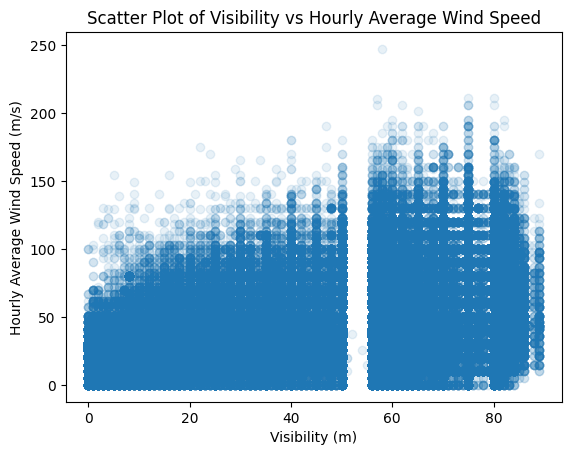

In [ ]:
plt.scatter(alex_cleaning['Visibility (m)'], alex_cleaning['Hourly Average Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Hourly Average Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Hourly Average Wind Speed (m/s)')

Now, we continue with the 'Mean Wind Speed' column.

Text(0, 0.5, 'Mean Wind Speed (m/s)')

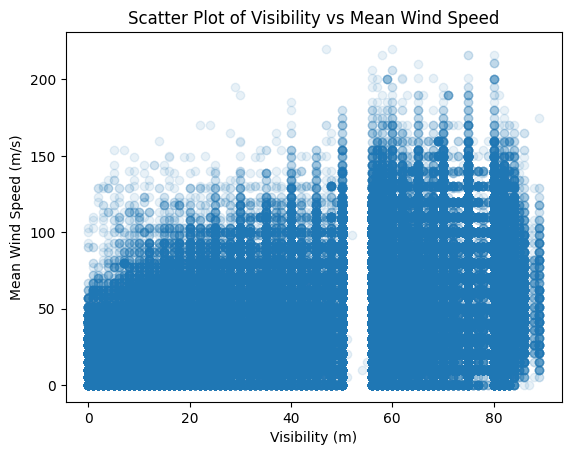

In [ ]:
plt.scatter(alex_cleaning['Visibility (m)'], alex_cleaning['Mean Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Mean Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Mean Wind Speed (m/s)')

Here, we can observe the same case as with the last column (Hourly Average Wind Speed). With the increase in visibility, we see an increase in the upper limit of Mean Wind Speed. We also see the same case with values between 51-55 missing. We can apply the same cleaning method as we did before (sectors). Let's continue exploring.

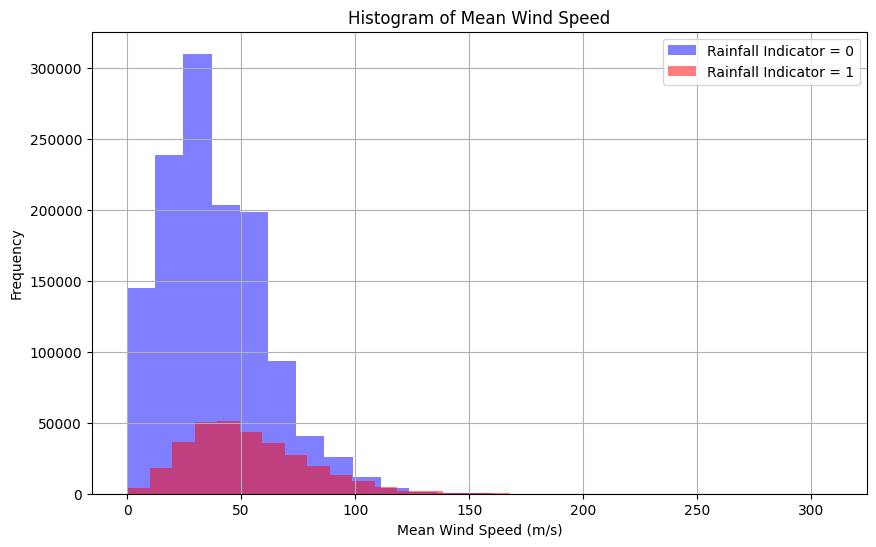

In [ ]:
wind_speed_rain_2 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 0]['Mean Wind Speed (m/s)']
wind_speed_rain_3 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 1]['Mean Wind Speed (m/s)']

plt.figure(figsize=(10, 6))
plt.hist(wind_speed_rain_2, bins=25, alpha=0.5, color='blue', label='Rainfall Indicator = 0')
plt.hist(wind_speed_rain_3, bins=25, alpha=0.5, color='red', label='Rainfall Indicator = 1')
plt.title('Histogram of Mean Wind Speed')
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

This graph looks almost identical to the one we previously made. The same insights apply.

example

In [ ]:
alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1403013176.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
STN                                                                      
356    0     0                                0                   1391   
375    0     0                                0                   3591   
380    0     0                                0                      0   

     Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
STN                                                                
356                      1813                              31564   
375                    176470                             204481   
380                    167078                              52584   

     Precipitation Amount (mm)  Visibility (m)  Present Weather  \
STN                                                               
356                      31550          432066           453554   
375                     204480           36384           285171   
380                      52584           35841           269372   

     Rainfall Indicator  Visibility Sector  
STN                                         
356              432069                  0  
375               62640                  0  
380                2622                  0

Again, we can see that we have missing values only for stations 356 and 375. We also see that Hourly Average Wind Speed has no more NAs.

In [ ]:
alex_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\527630477.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
Hour                                                                      
1       0     0                                0                    647   
2       0     0                                0                    645   
3       0     0                                0                    140   
4       0     0                                0                    120   
5       0     0                                0                    120   
6       0     0                                0                     78   
7       0     0                                0                     80   
8       0     0                                0                     75   
9       0     0                                0                     69   
10      0     0                                0                     93   
11      0     0                                0                     99   
12      0     0                                0                     83   
13      0     0                                0                     87   
14      0     0                                0                     82   
15      0     0                                0                     88   
16      0     0                                0                     86   
17      0     0                                0                     93   
18      0     0                                0                     87   
19      0     0                                0                    103   
20      0     0                                0                    228   
21      0     0                                0                    230   
22      0     0                                0                    677   
23      0     0                                0                    681   
24      0     0                                0                    291   

      Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
Hour                                                                
1                        14384                              12027   
2                        14385                              12027   
3                        14386                              12027   
4                        14391                              12027   
5                        14396                              12027   
6                        14403                              12027   
7                        14407                              12026   
8                        14400                              12026   
9                        14402                              12025   
10                       14419                              12024   
11                       14425                              12023   
12                       14412                              12024   
13                       14402                              12025   
14                       14382                              12025   
15                       14371                              12025   
16                       14364                              12027   
17                       14364                              12033   
18                       14364                              12026   
19                       14374                              12026   
20                       14378                              12026   
21                       14388                              12026   
22                       14387                              12026   
23                       14383                              12027   
24                       14394                              12027   

      Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Hour                                                               
1                         12027           14304            26616   
2                         12027           14303         

In contrast to the hourly average wind speed, whether the mean wind speed is missing or not looks to be impacted by the hour. We can observe that the most missing values are between 20:00-02:00. It's hard to think of a specific cause for this because nothing that special or different happens during this 6-hour span, compared to the rest of the day. Something positive is that the rush hours (especially the morning one) and the times when our client travels appear to have little missing data.

My suggestion is that taking care of the missing values in the same way as we did with the previous column would be best in terms of replacing them with accurate data. Plus, we already have the visibility categories which makes it even easier.

In [ ]:
alex_cleaning['Mean Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Mean Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))

alex_cleaning['Mean Wind Speed (m/s)'].fillna(alex_cleaning['Mean Wind Speed (m/s)'].mean(), inplace=True)

alex_cleaning

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\674250517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Mean Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Mean Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\674250517.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].m

STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0        356     1                        39.912583                   30.0   
1        356     2                        39.912583                   40.0   
2        356     3                        39.912583                   40.0   
3        356     4                        39.912583                   40.0   
4        356     5                        39.912583                   30.0   
...      ...   ...                              ...                    ...   
2089648  380    20                        39.912583                    0.0   
2089649  380    21                        39.912583                    0.0   
2089650  380    22                        39.912583                    0.0   
2089651  380    23                        39.912583                    0.0   
2089652  380    24                        39.912583                    0.0   

         Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
0                            50.0                                0.0   
1                            60.0                                0.0   
2                            60.0                                0.0   
3                            50.0                                0.0   
4                            50.0                                0.0   
...                           ...                                ...   
2089648                       NaN                                NaN   
2089649                       NaN                                NaN   
2089650                       NaN                                NaN   
2089651                       NaN                                NaN   
2089652                       NaN                                NaN   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
0                              0.0             NaN              NaN   
1                              0.0             NaN              NaN   
2                              0.0             NaN              NaN   
3                              0.0             NaN              NaN   
4                              0.0             NaN              NaN   
...                            ...             ...              ...   
2089648                        NaN             NaN             44.0   
2089649                        NaN             NaN             44.0   
2089650                        NaN             NaN             45.0   
2089651                        NaN             NaN             47.0   
2089652                        NaN             NaN             47.0   

         Rainfall Indicator  Visibility Sector  
0                       NaN                0.0  
1                       NaN                0.0  
2                       NaN                0.0  
3                       NaN                0.0  
4                       NaN                0.0  
...                     ...                ...  
2089648                 0.0                0.0  
2089649                 0.0                0.0  
2089650                 0.0                0.0  
2089651                 0.0                0.0  
2089652                 0.0                0.0  

[2089653 rows x 11 columns]

In [ ]:
# Checking the results
alex_cleaning.groupby('Visibility Sector').mean()

STN       Hour  Hourly Average Wind Speed (m/s)  \
Visibility Sector                                                           
0.0                359.076557  12.677119                        39.912583   
1.0                376.524744  10.798921                        27.892320   
2.0                376.858648  11.957009                        37.408101   
3.0                377.041308  13.277053                        43.401763   

                   Mean Wind Speed (m/s)  Maximum Wind Speed (m/s)  \
Visibility Sector                                                    
0.0                            42.020026                 70.308854   
1.0                            27.529113                 44.093791   
2.0                            37.646275                 59.956058   
3.0                            43.468161                 73.762724   

                   Duration of Precipitation (hours)  \
Visibility Sector                                      
0.0                                         0.898408   
1.0                                         1.557301   
2.0                                         1.377228   
3.0                                         0.427634   

                   Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Visibility Sector                                                               
0.0                                 1.195185             NaN        14.538801   
1.0                                 1.824934       16.748899        30.487836   
2.0                                 1.918572       52.543018        20.541710   
3.0                                 0.607095       72.119195        16.938006   

                   Rainfall Indicator  
Visibility Sector                      
0.0                          0.191092  
1.0                          0.244853  
2.0                          0.265675  
3.0                          0.159805

The Mean Wind Speed values remained unchanged from what they were before but this shouldn't alarm us because we are working with millions of rows and the missing values in this column were only 4982.

Let's continue with Maximum Wind Speed. There, apart from Visibility and Rainfall Indicator, Present Weather also displays a higher correlation, so we will look into it too.

Text(0, 0.5, 'Maximum Wind Speed (m/s)')

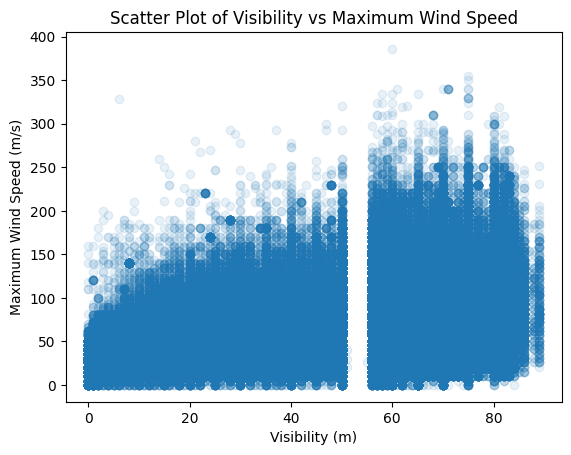

In [ ]:
plt.scatter(alex_cleaning['Visibility (m)'], alex_cleaning['Maximum Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Maximum Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Maximum Wind Speed (m/s)')

And again, the same case as before applies here. The increase in visibility increases the upper limit of the maximum wind speed. Taking care of the NAs by dividing into sectors and replacing them with the mean is an option again.

In [ ]:
alex_cleaning['Present Weather'].unique()

array([nan, 81., 34., 33., 32., 51., 22., 23., 58.,  1., 10., 20.,  3.,
       52., 62., 53., 61., 35., 57.,  2., 82., 63.,  4., 67., 24., 85.,
       12., 91., 92., 26., 84., 83., 68., 72., 77., 71., 86., 25., 54.,
       64., 73.,  5., 17., 29., 80., 50., 11., 21., 60., 41., 28., 95.,
       46., 42., 15., 44., 45., 27., 48., 49., 47., 66., 59., 43., 14.,
       70., 16., 65., 96., 13., 55.,  0., 93., 94., 87., 79.,  8., 40.,
       97., 56., 69., 88., 89., 90.,  7., 36., 31., 76., 75., 98.,  6.,
       30., 74., 18., 78.,  9., 99., 37., 19., 38.])

In [ ]:
print(alex_cleaning['Present Weather'].min())
print(alex_cleaning['Present Weather'].max())

0.0
99.0


Since we have no provided data dictionary with these datasets and I could not find what a 'Present Weather' column with values between 0 and 99 could represent, I will leave it without exploring it further. We already have a viable alternative in the face of the 'Visibility (m)' column which should be enough for us to replace the missing values as we did with the previous columns.

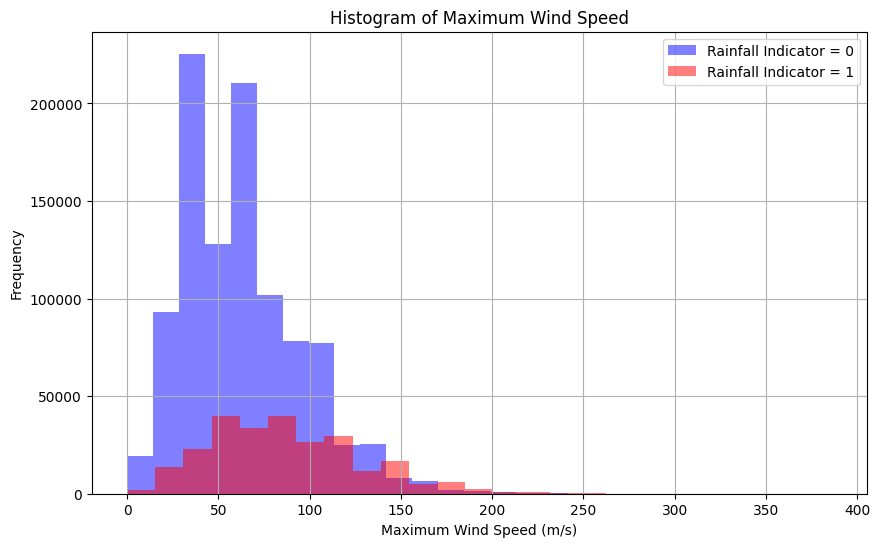

In [ ]:
wind_speed_rain_4 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 0]['Maximum Wind Speed (m/s)']
wind_speed_rain_5 = alex_cleaning[alex_cleaning['Rainfall Indicator'] == 1]['Maximum Wind Speed (m/s)']

plt.figure(figsize=(10, 6))
plt.hist(wind_speed_rain_4, bins=25, alpha=0.5, color='blue', label='Rainfall Indicator = 0')
plt.hist(wind_speed_rain_5, bins=25, alpha=0.5, color='red', label='Rainfall Indicator = 1')
plt.title('Histogram of Maximum Wind Speed')
plt.xlabel('Maximum Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The shape of this graph looks very similar to the previous ones. The only difference is that the wind speeds are higher because we are looking at the maximum (duh). The same insights apply.

In [ ]:
alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1403013176.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
STN                                                                      
356    0     0                                0                      0   
375    0     0                                0                      0   
380    0     0                                0                      0   

     Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
STN                                                                
356                      1813                              31564   
375                    176470                             204481   
380                    167078                              52584   

     Precipitation Amount (mm)  Visibility (m)  Present Weather  \
STN                                                               
356                      31550          432066           453554   
375                     204480           36384           285171   
380                      52584           35841           269372   

     Rainfall Indicator  Visibility Sector  
STN                                         
356              432069                  0  
375               62640                  0  
380                2622                  0

Here, we can see that weather stations 375 and 380 are the ones with the most missing values and station 356 has very little.

In [ ]:
alex_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\527630477.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alex_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())


STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
Hour                                                                      
1       0     0                                0                      0   
2       0     0                                0                      0   
3       0     0                                0                      0   
4       0     0                                0                      0   
5       0     0                                0                      0   
6       0     0                                0                      0   
7       0     0                                0                      0   
8       0     0                                0                      0   
9       0     0                                0                      0   
10      0     0                                0                      0   
11      0     0                                0                      0   
12      0     0                                0                      0   
13      0     0                                0                      0   
14      0     0                                0                      0   
15      0     0                                0                      0   
16      0     0                                0                      0   
17      0     0                                0                      0   
18      0     0                                0                      0   
19      0     0                                0                      0   
20      0     0                                0                      0   
21      0     0                                0                      0   
22      0     0                                0                      0   
23      0     0                                0                      0   
24      0     0                                0                      0   

      Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
Hour                                                                
1                        14384                              12027   
2                        14385                              12027   
3                        14386                              12027   
4                        14391                              12027   
5                        14396                              12027   
6                        14403                              12027   
7                        14407                              12026   
8                        14400                              12026   
9                        14402                              12025   
10                       14419                              12024   
11                       14425                              12023   
12                       14412                              12024   
13                       14402                              12025   
14                       14382                              12025   
15                       14371                              12025   
16                       14364                              12027   
17                       14364                              12033   
18                       14364                              12026   
19                       14374                              12026   
20                       14378                              12026   
21                       14388                              12026   
22                       14387                              12026   
23                       14383                              12027   
24                       14394                              12027   

      Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Hour                                                               
1                         12027           14304            26616   
2                         12027           14303         

Firstly, we can see that Mean Wind Speed has no missing values anymore so handling them was successful. Although the values in the Maximum Wind Speed differ, the variation between the values is very small and we can conclude that the hour does not affect whether more or less values will be missing.

In conclusion, we can handle the missing values in the Maximum Wind Speed column in the same way as the previous two columns.

In [ ]:
alex_cleaning['Maximum Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Maximum Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))

alex_cleaning['Maximum Wind Speed (m/s)'].fillna(alex_cleaning['Maximum Wind Speed (m/s)'].mean(), inplace=True)

alex_cleaning

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1459849546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_cleaning['Maximum Wind Speed (m/s)'] = alex_cleaning.groupby('Visibility Sector')['Maximum Wind Speed (m/s)'].transform(lambda x: x.fillna(x.mean()))
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1459849546.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = d

STN  Hour  Hourly Average Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0        356     1                        39.912583                   30.0   
1        356     2                        39.912583                   40.0   
2        356     3                        39.912583                   40.0   
3        356     4                        39.912583                   40.0   
4        356     5                        39.912583                   30.0   
...      ...   ...                              ...                    ...   
2089648  380    20                        39.912583                    0.0   
2089649  380    21                        39.912583                    0.0   
2089650  380    22                        39.912583                    0.0   
2089651  380    23                        39.912583                    0.0   
2089652  380    24                        39.912583                    0.0   

         Maximum Wind Speed (m/s)  Duration of Precipitation (hours)  \
0                       50.000000                                0.0   
1                       60.000000                                0.0   
2                       60.000000                                0.0   
3                       50.000000                                0.0   
4                       50.000000                                0.0   
...                           ...                                ...   
2089648                 70.308854                                NaN   
2089649                 70.308854                                NaN   
2089650                 70.308854                                NaN   
2089651                 70.308854                                NaN   
2089652                 70.308854                                NaN   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
0                              0.0             NaN              NaN   
1                              0.0             NaN              NaN   
2                              0.0             NaN              NaN   
3                              0.0             NaN              NaN   
4                              0.0             NaN              NaN   
...                            ...             ...              ...   
2089648                        NaN             NaN             44.0   
2089649                        NaN             NaN             44.0   
2089650                        NaN             NaN             45.0   
2089651                        NaN             NaN             47.0   
2089652                        NaN             NaN             47.0   

         Rainfall Indicator  Visibility Sector  
0                       NaN                0.0  
1                       NaN                0.0  
2                       NaN                0.0  
3                       NaN                0.0  
4                       NaN                0.0  
...                     ...                ...  
2089648                 0.0                0.0  
2089649                 0.0                0.0  
2089650                 0.0                0.0  
2089651                 0.0                0.0  
2089652                 0.0                0.0  

[2089653 rows x 11 columns]

In [ ]:
# Checking the results
alex_cleaning.groupby('Visibility Sector').mean()

STN       Hour  Hourly Average Wind Speed (m/s)  \
Visibility Sector                                                           
0.0                359.076557  12.677119                        39.912583   
1.0                376.524744  10.798921                        27.892320   
2.0                376.858648  11.957009                        37.408101   
3.0                377.041308  13.277053                        43.401763   

                   Mean Wind Speed (m/s)  Maximum Wind Speed (m/s)  \
Visibility Sector                                                    
0.0                            42.020026                 70.308854   
1.0                            27.529113                 44.093791   
2.0                            37.646275                 59.956058   
3.0                            43.468161                 73.762724   

                   Duration of Precipitation (hours)  \
Visibility Sector                                      
0.0                                         0.898408   
1.0                                         1.557301   
2.0                                         1.377228   
3.0                                         0.427634   

                   Precipitation Amount (mm)  Visibility (m)  Present Weather  \
Visibility Sector                                                               
0.0                                 1.195185             NaN        14.538801   
1.0                                 1.824934       16.748899        30.487836   
2.0                                 1.918572       52.543018        20.541710   
3.0                                 0.607095       72.119195        16.938006   

                   Rainfall Indicator  
Visibility Sector                      
0.0                          0.191092  
1.0                          0.244853  
2.0                          0.265675  
3.0                          0.159805

In [ ]:
alex_cleaning.isna().sum()

STN                                        0
Hour                                       0
Hourly Average Wind Speed (m/s)            0
Mean Wind Speed (m/s)                      0
Maximum Wind Speed (m/s)                   0
Duration of Precipitation (hours)     288629
Precipitation Amount (mm)             288614
Visibility (m)                        504291
Present Weather                      1008097
Rainfall Indicator                    497331
Visibility Sector                          0
dtype: int64

We can see that the 3 cleaned columns have no more explicitly missing values in them. Now let's replace those columns with the ones in the original merged dataset.

In [ ]:
columns_to_replace = ['Hourly Average Wind Speed (m/s)', 'Mean Wind Speed (m/s)', 'Maximum Wind Speed (m/s)'] 

for col in columns_to_replace:
    merged_data[col] = alex_cleaning[col]

merged_data.isna().sum()

STN                                        0
LON(east)                                  0
LAT(north)                                 0
ALT(m)                                     0
NAME                                       0
Station ID                                 0
Date (YYYY-MM-DD)                          0
Hour                                       0
Hourly Average Wind Speed (m/s)            0
Mean Wind Speed (m/s)                      0
Maximum Wind Speed (m/s)                   0
Duration of Precipitation (hours)     288629
Precipitation Amount (mm)             288614
Visibility (m)                        504291
Present Weather                      1008097
Weather Station Type                  829418
Rainfall Indicator                    497331
Snow Indicator                        497332
Fog Indicator                         497332
Ice Formation Indicator               557707
Site Number                          1515018
Start Date of Traffic Jam            1515018
End Date o

## Let's continues with:
    Duration of Precipitation (hours)   - DOP
    Precipitation Amount (mm)           - PA
    Visibility (m)                      - V

When it comes to Duration of Precipitation (hours) - DOP, these are some of the columns that seem to corelate well    


In [ ]:
DPV_cleaning = merged_data[['STN', 'Hour', 'Duration of Precipitation (hours)', 'Precipitation Amount (mm)', 'Visibility (m)', 'Present Weather', 'Rainfall Indicator','Maximum Wind Speed (m/s)','Mean Wind Speed (m/s)', 'Hourly Average Wind Speed (m/s)','Date (YYYY-MM-DD)']]
DPV_cleaning.sample(15)


STN  Hour  Duration of Precipitation (hours)  \
1783996  380    14                                0.0   
1139401  375    24                                NaN   
1354473  380    17                                5.0   
1022698  375     9                                0.0   
2080901  380     9                                NaN   
666708   375    14                                0.0   
2010519  380     1                                0.0   
1474995  380    14                                0.0   
856336   375    15                               10.0   
435452   356     8                                9.0   
501340   375    16                               10.0   
865173   375    20                                0.0   
866841   375     8                                0.0   
172068   356    21                                0.0   
274430   356    23                                0.0   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
1783996                        0.0            65.0              2.0   
1139401                        NaN            59.0              2.0   
1354473                        3.0            59.0             52.0   
1022698                        0.0            23.0             28.0   
2080901                        NaN            65.0              2.0   
666708                         0.0            83.0              NaN   
2010519                        0.0            70.0              1.0   
1474995                        0.0            81.0              NaN   
856336                        28.0            75.0              NaN   
435452                         4.0             NaN              NaN   
501340                        29.0            36.0             62.0   
865173                         0.0            69.0              NaN   
866841                         0.0            57.0             10.0   
172068                         0.0             NaN              NaN   
274430                         0.0             NaN              NaN   

         Rainfall Indicator  Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
1783996                 0.0                 67.000000                   41.0   
1139401                 0.0                 59.956058                   57.0   
1354473                 1.0                160.000000                  120.0   
1022698                 0.0                 36.000000                   31.0   
2080901                 0.0                 73.762724                   46.0   
666708                  0.0                100.000000                   60.0   
2010519                 0.0                 73.762724                   51.0   
1474995                 0.0                100.000000                   60.0   
856336                  NaN                 60.000000                   20.0   
435452                  NaN                 51.000000                   26.0   
501340                  1.0                 70.000000                   30.0   
865173                  0.0                110.000000                   50.0   
866841                  0.0                 50.000000                   40.0   
172068                  NaN                 20.000000                    0.0   
274430                  NaN                 70.000000                   40.0   

         Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  
1783996                        36.000000        1988-05-18  
1139401                        37.408101        1961-01-01  
1354473                       100.000000        2016-01-07  
1022698                        31.000000        1981-12-10  
2080901                        41.000000        1956-06-02  
666708                         60.000000        2019-06-07  
2010519                        46.000000        1967-09-23  
1474995                        60.000000        2019-04-19  
856336                         10.000000        2000-07-15  
435452                         39.912583        1993-07-30  
501340 

We do see that some values are the general 0, but others are NaN. To get a better understading of what might be going on let us look into the missing spaces

In [ ]:
DPV_cleaning.info()
print("")
print("Subset size: ",DPV_cleaning.shape)
DPV_cleaning.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089653 entries, 0 to 2089652
Data columns (total 11 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   STN                                int64         
 1   Hour                               int32         
 2   Duration of Precipitation (hours)  float64       
 3   Precipitation Amount (mm)          float64       
 4   Visibility (m)                     float64       
 5   Present Weather                    float64       
 6   Rainfall Indicator                 float64       
 7   Maximum Wind Speed (m/s)           float64       
 8   Mean Wind Speed (m/s)              float64       
 9   Hourly Average Wind Speed (m/s)    float64       
 10  Date (YYYY-MM-DD)                  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 167.4 MB

Subset size:  (2089653, 11)


STN                                        0
Hour                                       0
Duration of Precipitation (hours)     288629
Precipitation Amount (mm)             288614
Visibility (m)                        504291
Present Weather                      1008097
Rainfall Indicator                    497331
Maximum Wind Speed (m/s)                   0
Mean Wind Speed (m/s)                      0
Hourly Average Wind Speed (m/s)            0
Date (YYYY-MM-DD)                          0
dtype: int64

It does seem like DOP and Precipitation Amount (PA) might be connected. They do seem to be quite similiar in missing values

Pairplot

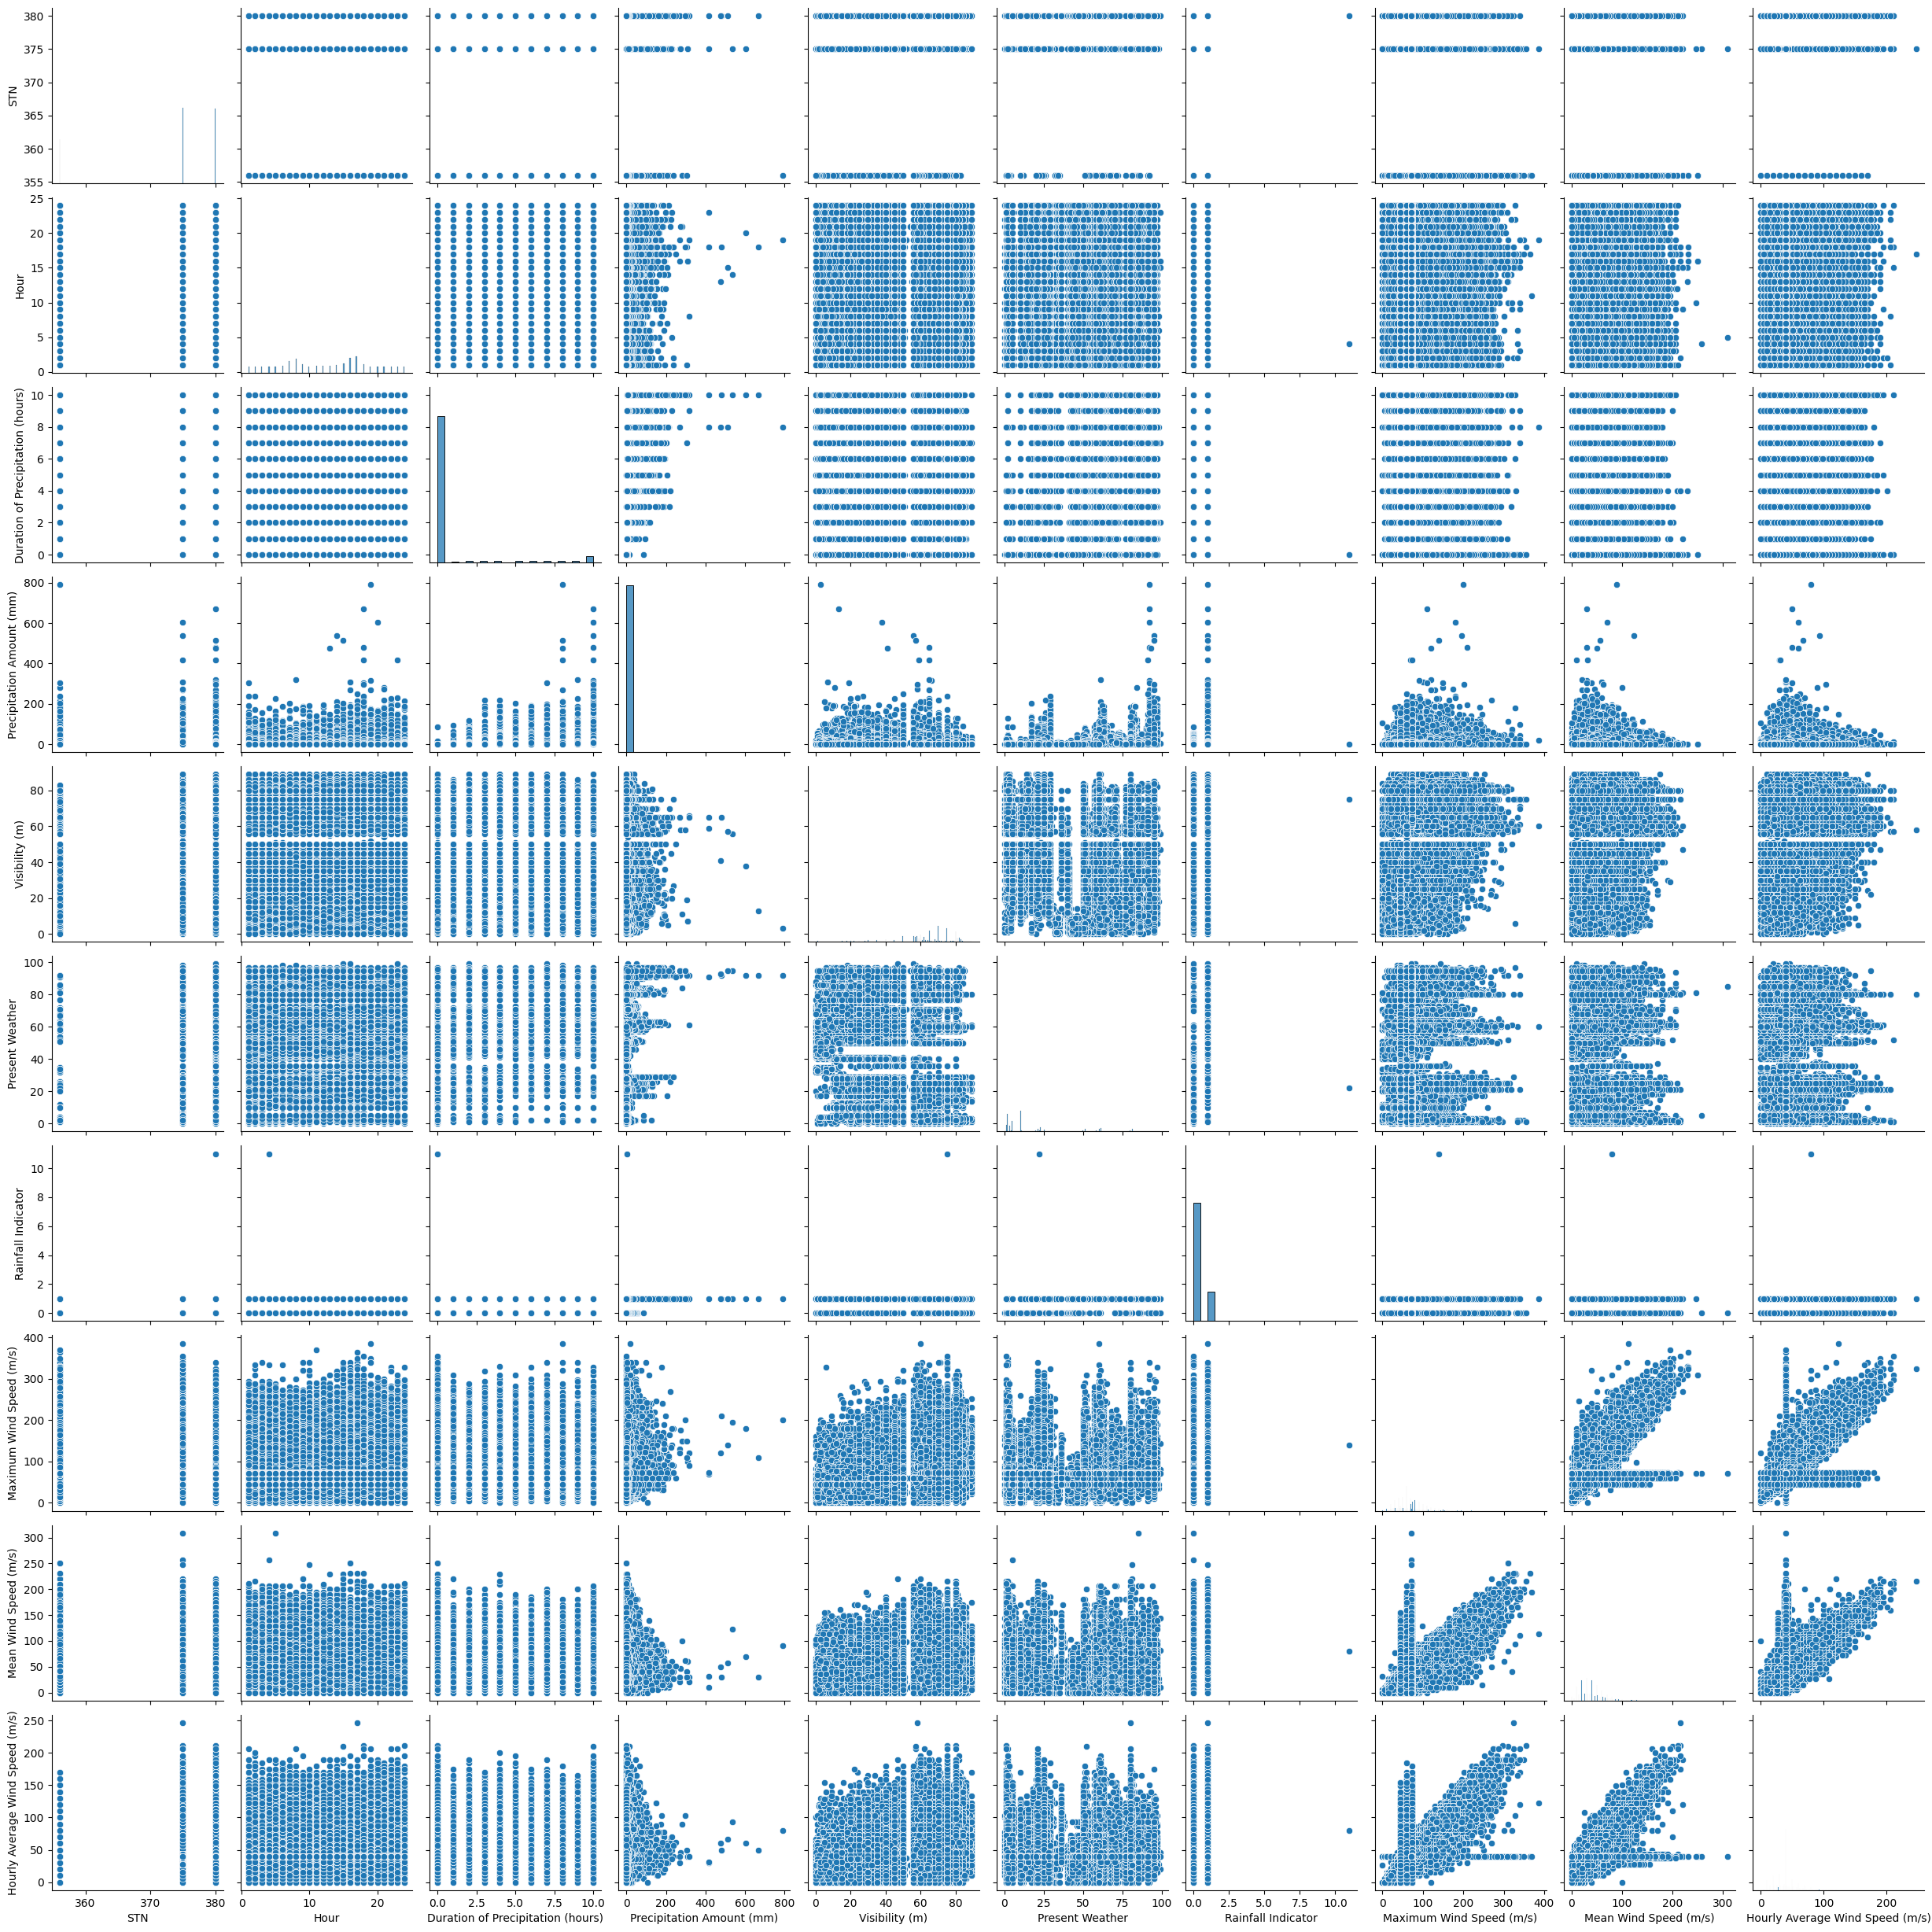

In [ ]:
# Scatterplot for all pairs of variables
sns.pairplot(DPV_cleaning)
plt.show()

What we do see is that it is quite logical - the higher the duration of the precipitation -> the bigger the amount. It does not seem like either the rainfall indicator does not influence anything that much. The ones that do peak our interests however are the PA and the DOP, as well as it does seem possible that the Visibility might have some connection to the PA

### Let's continue on with the Precipitation amount

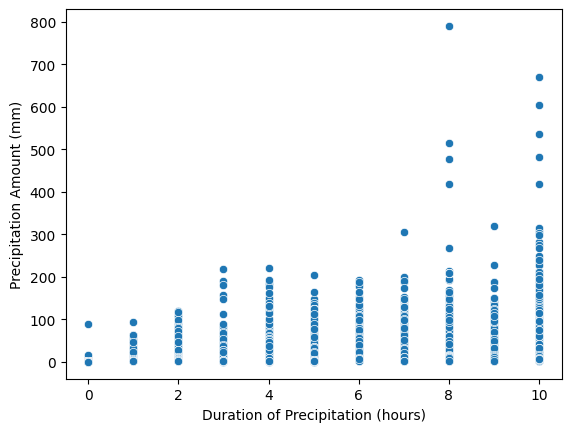

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=DPV_cleaning, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

based on the scatterplot we do see that it is possible to separete them based on the DOP

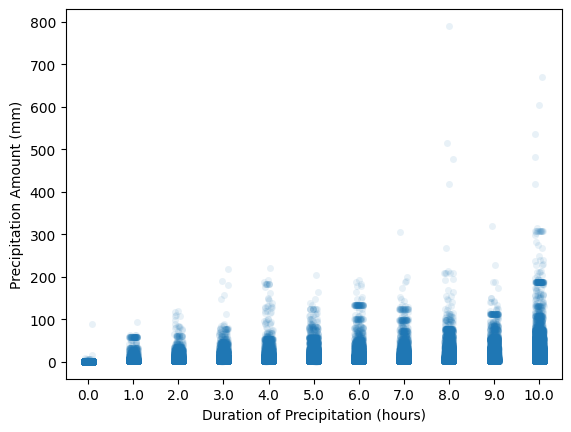

In [ ]:
sns.stripplot(data=DPV_cleaning, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)', jitter=True, alpha=0.1)
plt.show()

Let's check the values by stations like previously done

In [ ]:
DPV_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\2984369646.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DPV_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


STN  Hour  Duration of Precipitation (hours)  Precipitation Amount (mm)  \
STN                                                                            
356    0     0                              31564                      31550   
375    0     0                             204481                     204480   
380    0     0                              52584                      52584   

     Visibility (m)  Present Weather  Rainfall Indicator  \
STN                                                        
356          432066           453554              432069   
375           36384           285171               62640   
380           35841           269372                2622   

     Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
STN                                                    
356                         0                      0   
375                         0                      0   
380                         0                      0   

     Hourly Average Wind Speed (m/s)  Date (YYYY-MM-DD)  
STN                                                      
356                                0                  0  
375                                0                  0  
380                                0                  0

as expected, the most are in 375, however let us see what it also looks like hourly for everything, sinve there are quite a lot fo missing values (current)


In [ ]:
DPV_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\3615941056.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DPV_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())


STN  Hour  Duration of Precipitation (hours)  Precipitation Amount (mm)  \
Hour                                                                            
1       0     0                              12027                      12027   
2       0     0                              12027                      12027   
3       0     0                              12027                      12027   
4       0     0                              12027                      12027   
5       0     0                              12027                      12027   
6       0     0                              12027                      12027   
7       0     0                              12026                      12026   
8       0     0                              12026                      12026   
9       0     0                              12025                      12025   
10      0     0                              12024                      12024   
11      0     0                              12023                      12022   
12      0     0                              12024                      12022   
13      0     0                              12025                      12024   
14      0     0                              12025                      12024   
15      0     0                              12025                      12024   
16      0     0                              12027                      12026   
17      0     0                              12033                      12032   
18      0     0                              12026                      12025   
19      0     0                              12026                      12025   
20      0     0                              12026                      12025   
21      0     0                              12026                      12025   
22      0     0                              12026                      12025   
23      0     0                              12027                      12026   
24      0     0                              12027                      12026   

      Visibility (m)  Present Weather  Rainfall Indicator  \
Hour                                                        
1              14304            26616               15028   
2              14303            26112               14975   
3              13809            23724               14957   
4              13798            23877               13480   
5              13810            23288               12840   
6              17108            26995               16056   
7              32972            64044               31852   
8              42424            86882               41262   
9              21795            40463               20531   
10             15377            30738               14104   
11             16414            34047               15139   
12             17551            32520               16302   
13             18536            39355               17294   
14             20198            43096               19071   
15             26672            55326               26213   
16             45834           105270               45756   
17             51257           118433               51206   
18             23553            44849               23527   
19             14371            29063               14372   
20             13886            27986               14145   
21             13836            26075               14172   
22             14325            27980               14999   
23             14311            27606               14993   
24             13847            23752               15057   

      Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
Hour                                                    
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                          

Let's start grouping by the duration of precipitation that seems reasonable

In [ ]:
def categorize_dop(duration_of_precipitation):
    if pd.isna(duration_of_precipitation):
        return duration_of_precipitation
    elif duration_of_precipitation <= 2:
        return 1
    elif duration_of_precipitation <= 9:
        return 2
    else:
        return 3

DPV_cleaning['DOP Sector'] = DPV_cleaning['Duration of Precipitation (hours)'].apply(categorize_dop)

DPV_cleaning['DOP Sector'].unique()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\2755598625.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPV_cleaning['DOP Sector'] = DPV_cleaning['Duration of Precipitation (hours)'].apply(categorize_dop)


array([ 1.,  2.,  3., nan])

Let's fill in the missing values based on the categories that we gave them 

In [ ]:
DPV_cleaning['Precipitation Amount (mm)'] = DPV_cleaning.groupby('DOP Sector')['Precipitation Amount (mm)'].transform(lambda x: x.fillna(x.mean()))

DPV_cleaning['Precipitation Amount (mm)'].fillna(DPV_cleaning['Precipitation Amount (mm)'].mean(), inplace=True)

DPV_cleaning

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1472403109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPV_cleaning['Precipitation Amount (mm)'] = DPV_cleaning.groupby('DOP Sector')['Precipitation Amount (mm)'].transform(lambda x: x.fillna(x.mean()))
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1472403109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].

STN  Hour  Duration of Precipitation (hours)  \
0        356     1                                0.0   
1        356     2                                0.0   
2        356     3                                0.0   
3        356     4                                0.0   
4        356     5                                0.0   
...      ...   ...                                ...   
2089648  380    20                                NaN   
2089649  380    21                                NaN   
2089650  380    22                                NaN   
2089651  380    23                                NaN   
2089652  380    24                                NaN   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
0                         0.000000             NaN              NaN   
1                         0.000000             NaN              NaN   
2                         0.000000             NaN              NaN   
3                         0.000000             NaN              NaN   
4                         0.000000             NaN              NaN   
...                            ...             ...              ...   
2089648                   1.105337             NaN             44.0   
2089649                   1.105337             NaN             44.0   
2089650                   1.105337             NaN             45.0   
2089651                   1.105337             NaN             47.0   
2089652                   1.105337             NaN             47.0   

         Rainfall Indicator  Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0                       NaN                 50.000000                   30.0   
1                       NaN                 60.000000                   40.0   
2                       NaN                 60.000000                   40.0   
3                       NaN                 50.000000                   40.0   
4                       NaN                 50.000000                   30.0   
...                     ...                       ...                    ...   
2089648                 0.0                 70.308854                    0.0   
2089649                 0.0                 70.308854                    0.0   
2089650                 0.0                 70.308854                    0.0   
2089651                 0.0                 70.308854                    0.0   
2089652                 0.0                 70.308854                    0.0   

         Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  DOP Sector  
0                              39.912583        2006-02-01         1.0  
1                              39.912583        2006-02-01         1.0  
2                              39.912583        2006-02-01         1.0  
3                              39.912583        2006-02-01         1.0  
4                              39.912583        2006-02-01         1.0  
...                                  ...               ...         ...  
2089648                        39.912583        1951-01-31         NaN  
2089649                        39.912583        1951-01-31         NaN  
2089650                        39.912583        1951-01-31         NaN  
2089651                        39.912583        1951-01-31         NaN  
2089652                        39.912583        1951-01-31         NaN  

[2089653 rows x 12 columns]

In [ ]:
DPV_cleaning['DOP Sector'].fillna(0, inplace=True)
DPV_cleaning.groupby('DOP Sector').mean()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\4084091099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DPV_cleaning['DOP Sector'].fillna(0, inplace=True)
C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\4084091099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPV_cleaning['DOP Sector'].fillna(0, inplace=True)


STN       Hour  Duration of Precipitation (hours)  \
DOP Sector                                                             
0.0         373.833118  12.500043                                NaN   
1.0         372.491516  12.646585                           0.031041   
2.0         371.749489  12.690972                           5.785789   
3.0         372.171448  12.623541                          10.000000   

            Precipitation Amount (mm)  Visibility (m)  Present Weather  \
DOP Sector                                                               
0.0                          1.105337       49.144659        15.697654   
1.0                          0.137013       62.810558        14.959855   
2.0                          6.793891       55.141487        51.521199   
3.0                         13.216102       46.090340        61.667606   

            Rainfall Indicator  Maximum Wind Speed (m/s)  \
DOP Sector                                                 
0.0                   0.189512                 63.785864   
1.0                   0.113527                 65.279389   
2.0                   0.970627                 91.116259   
3.0                   0.937166                 86.789019   

            Mean Wind Speed (m/s)  Hourly Average Wind Speed (m/s)  \
DOP Sector                                                           
0.0                     40.175484                        38.725835   
1.0                     39.127060                        39.031231   
2.0                     51.491162                        48.611640   
3.0                     52.925230                        49.488633   

                       Date (YYYY-MM-DD)  
DOP Sector                                
0.0        1964-04-24 13:56:11.623780000  
1.0        2003-11-25 14:15:54.062812160  
2.0        2006-12-16 15:40:57.929849856  
3.0        2005-01-29 03:12:41.870970496

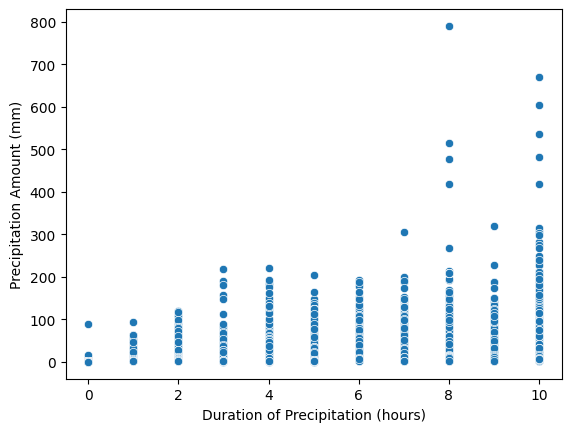

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=DPV_cleaning, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

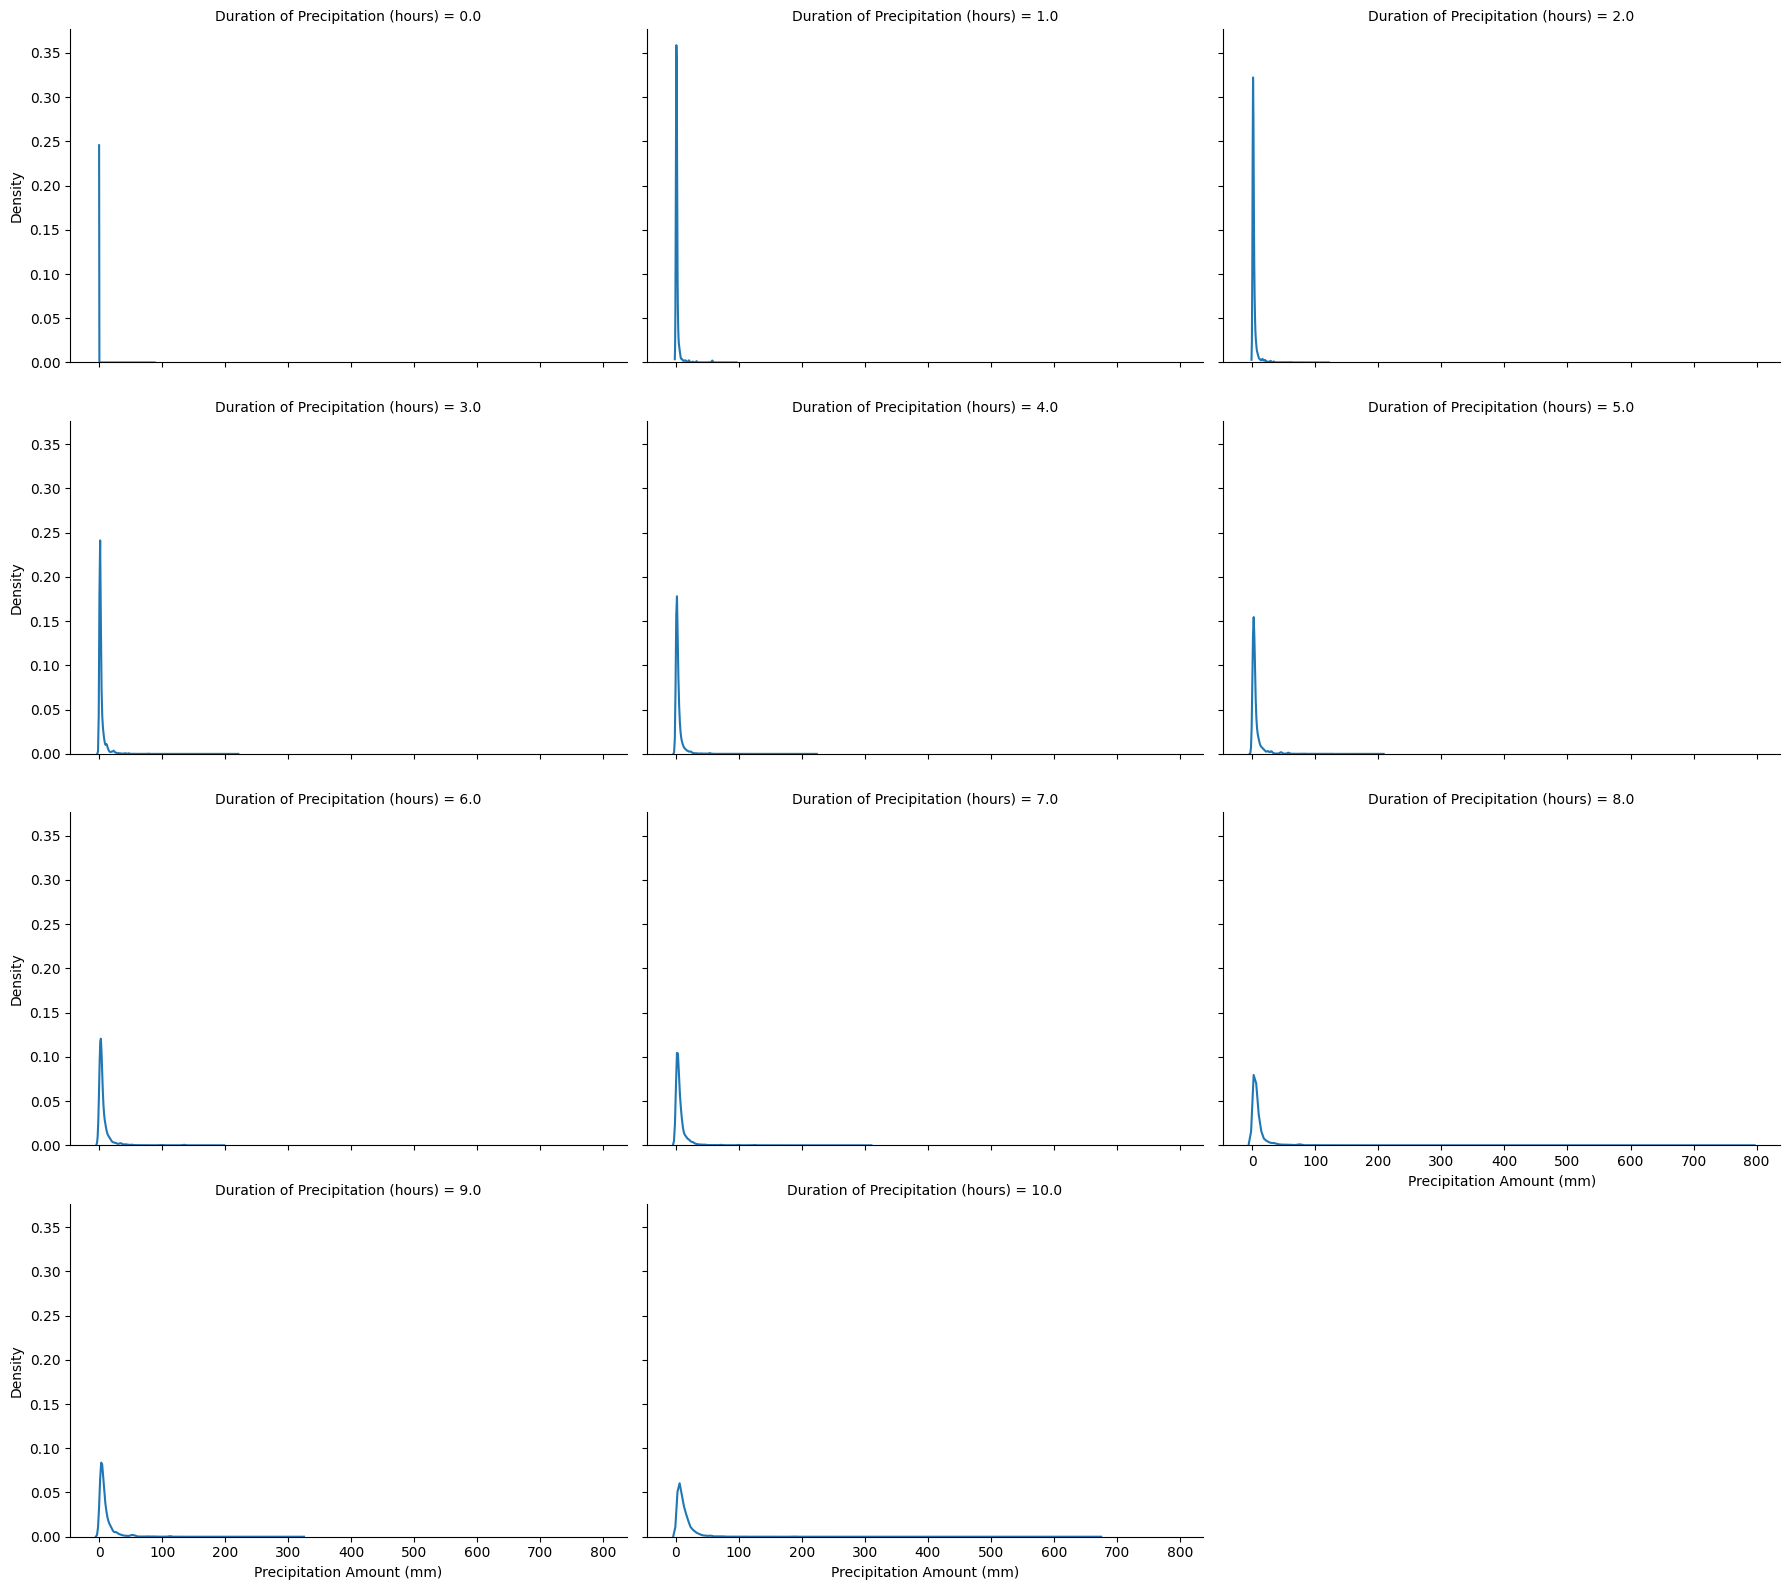

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(DPV_cleaning, col='Duration of Precipitation (hours)', col_wrap=3, height=4, aspect=1.5)

# Map to KDE plots
g.map(sns.kdeplot, 'Precipitation Amount (mm)')

plt.show()

## Let's continue with Duration of precipitation:


By the wat we previously did the PA, it would seem a good idea to do the DOP the same way, since it also does seem like it correlates mainly with the PA

In [ ]:
DPV_cleaning.groupby('STN').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\2215498142.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DPV_cleaning.groupby('STN').apply(lambda x: x.isna().sum())


STN  Hour  Duration of Precipitation (hours)  Precipitation Amount (mm)  \
STN                                                                            
356    0     0                              31564                          0   
375    0     0                             204481                          0   
380    0     0                              52584                          0   

     Visibility (m)  Present Weather  Rainfall Indicator  \
STN                                                        
356          432066           453554              432069   
375           36384           285171               62640   
380           35841           269372                2622   

     Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
STN                                                    
356                         0                      0   
375                         0                      0   
380                         0                      0   

     Hourly Average Wind Speed (m/s)  Date (YYYY-MM-DD)  DOP Sector  
STN                                                                  
356                                0                  0           0  
375                                0                  0           0  
380                                0                  0           0

In [ ]:
DPV_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\3615941056.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DPV_cleaning.groupby('Hour').apply(lambda x: x.isna().sum())


STN  Hour  Duration of Precipitation (hours)  Precipitation Amount (mm)  \
Hour                                                                            
1       0     0                              12027                          0   
2       0     0                              12027                          0   
3       0     0                              12027                          0   
4       0     0                              12027                          0   
5       0     0                              12027                          0   
6       0     0                              12027                          0   
7       0     0                              12026                          0   
8       0     0                              12026                          0   
9       0     0                              12025                          0   
10      0     0                              12024                          0   
11      0     0                              12023                          0   
12      0     0                              12024                          0   
13      0     0                              12025                          0   
14      0     0                              12025                          0   
15      0     0                              12025                          0   
16      0     0                              12027                          0   
17      0     0                              12033                          0   
18      0     0                              12026                          0   
19      0     0                              12026                          0   
20      0     0                              12026                          0   
21      0     0                              12026                          0   
22      0     0                              12026                          0   
23      0     0                              12027                          0   
24      0     0                              12027                          0   

      Visibility (m)  Present Weather  Rainfall Indicator  \
Hour                                                        
1              14304            26616               15028   
2              14303            26112               14975   
3              13809            23724               14957   
4              13798            23877               13480   
5              13810            23288               12840   
6              17108            26995               16056   
7              32972            64044               31852   
8              42424            86882               41262   
9              21795            40463               20531   
10             15377            30738               14104   
11             16414            34047               15139   
12             17551            32520               16302   
13             18536            39355               17294   
14             20198            43096               19071   
15             26672            55326               26213   
16             45834           105270               45756   
17             51257           118433               51206   
18             23553            44849               23527   
19             14371            29063               14372   
20             13886            27986               14145   
21             13836            26075               14172   
22             14325            27980               14999   
23             14311            27606               14993   
24             13847            23752               15057   

      Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
Hour                                                    
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                          

In [ ]:
mean_precipitation = DPV_cleaning.groupby('Duration of Precipitation (hours)')['Precipitation Amount (mm)'].mean()
mean_precipitation

Duration of Precipitation (hours)
0.0      0.084142
1.0      2.476029
2.0      3.065273
3.0      3.981205
4.0      4.707074
5.0      5.954266
6.0      7.121342
7.0      7.729592
8.0      9.286129
9.0     10.346065
10.0    13.216102
Name: Precipitation Amount (mm), dtype: float64

Now with the help of a function we can fill in the places where the DOP values are empty, but the PA values are filled in, with a mean

In [ ]:
# Function to find the 'Duration of Precipitation (hours)' value with the closest mean 'Precipitation Amount (mm)'
def find_closest_duration(row):
    return (mean_precipitation - row['Precipitation Amount (mm)']).abs().idxmin()

# Apply the function to the rows where 'Duration of Precipitation (hours)' is missing
DPV_cleaning.loc[DPV_cleaning['Duration of Precipitation (hours)'].isna(), 'Duration of Precipitation (hours)'] = DPV_cleaning[DPV_cleaning['Duration of Precipitation (hours)'].isna()].apply(find_closest_duration, axis=1)

Now let's see what the changes look like 

In [ ]:
DPV_cleaning.sample(15)

STN  Hour  Duration of Precipitation (hours)  \
1263219  375     2                                0.0   
1356324  380    17                                3.0   
28982    356    15                                0.0   
1630930  380     2                                0.0   
1406427  380    19                                0.0   
1035063  375    14                                0.0   
1600777  380    10                                0.0   
324842   356    17                                0.0   
1813836  380    22                                0.0   
621261   375     2                                0.0   
1390663  380    23                                0.0   
1834489  380    11                                0.0   
1763997  380     7                                0.0   
1123456  375    15                                0.0   
1352776  380     9                                0.0   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
1263219                   1.105337            59.0              2.0   
1356324                   1.000000            58.0             81.0   
28982                     0.000000            75.0              NaN   
1630930                   0.000000            75.0              NaN   
1406427                   0.000000            65.0              NaN   
1035063                   1.105337            56.0             27.0   
1600777                   0.000000            31.0             10.0   
324842                    0.000000             NaN              NaN   
1813836                   0.000000            70.0              2.0   
621261                    0.000000            60.0              NaN   
1390663                   1.000000            65.0             23.0   
1834489                   0.000000            65.0              3.0   
1763997                   0.000000            70.0              2.0   
1123456                   1.105337            48.0             10.0   
1352776                   0.000000            75.0              2.0   

         Rainfall Indicator  Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
1263219                 0.0                 59.956058                   77.0   
1356324                 1.0                 80.000000                   40.0   
28982                   0.0                 90.000000                   50.0   
1630930                 0.0                 40.000000                   20.0   
1406427                 0.0                 50.000000                   20.0   
1035063                 1.0                 87.000000                   31.0   
1600777                 0.0                 20.000000                   10.0   
324842                  NaN                 80.000000                   50.0   
1813836                 0.0                 26.000000                   15.0   
621261                  0.0                 30.000000                   20.0   
1390663                 1.0                 90.000000                   50.0   
1834489                 0.0                108.000000                   77.0   
1763997                 0.0                113.000000                   67.0   
1123456                 0.0                 59.956058                   62.0   
1352776                 0.0                 50.000000                   50.0   

         Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  DOP Sector  
1263219                        37.408101        1955-10-18         0.0  
1356324                        40.000000        2016-02-04         2.0  
28982                          50.000000        2012-05-18         1.0  
1630930                        20.000000        2023-08-19         1.0  
1406427                        20.000000        2007-09-26         1.0  
1035063                        26.000000        1973-05-08         0.0  
1600777                        10.000000        2023-02-12         1.0  
324842                         39.912583        2023-04-14         1.0  
1813836              

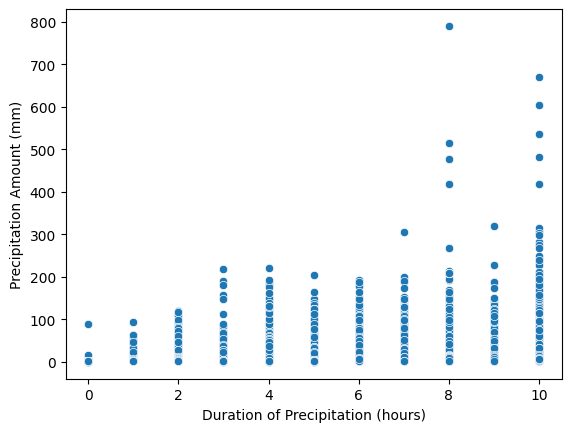

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=DPV_cleaning, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

In [ ]:
DPV_cleaning.isna().sum()

STN                                        0
Hour                                       0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                        504291
Present Weather                      1008097
Rainfall Indicator                    497331
Maximum Wind Speed (m/s)                   0
Mean Wind Speed (m/s)                      0
Hourly Average Wind Speed (m/s)            0
Date (YYYY-MM-DD)                          0
DOP Sector                                 0
dtype: int64

In [ ]:
DPV_cleaning.groupby('DOP Sector').mean()

STN       Hour  Duration of Precipitation (hours)  \
DOP Sector                                                             
0.0         373.833118  12.500043                           0.000000   
1.0         372.491516  12.646585                           0.031041   
2.0         371.749489  12.690972                           5.785789   
3.0         372.171448  12.623541                          10.000000   

            Precipitation Amount (mm)  Visibility (m)  Present Weather  \
DOP Sector                                                               
0.0                          1.105337       49.144659        15.697654   
1.0                          0.137013       62.810558        14.959855   
2.0                          6.793891       55.141487        51.521199   
3.0                         13.216102       46.090340        61.667606   

            Rainfall Indicator  Maximum Wind Speed (m/s)  \
DOP Sector                                                 
0.0                   0.189512                 63.785864   
1.0                   0.113527                 65.279389   
2.0                   0.970627                 91.116259   
3.0                   0.937166                 86.789019   

            Mean Wind Speed (m/s)  Hourly Average Wind Speed (m/s)  \
DOP Sector                                                           
0.0                     40.175484                        38.725835   
1.0                     39.127060                        39.031231   
2.0                     51.491162                        48.611640   
3.0                     52.925230                        49.488633   

                       Date (YYYY-MM-DD)  
DOP Sector                                
0.0        1964-04-24 13:56:11.623780000  
1.0        2003-11-25 14:15:54.062812160  
2.0        2006-12-16 15:40:57.929849856  
3.0        2005-01-29 03:12:41.870970496

Hours, DOP, PA, Hours - Scatterplot

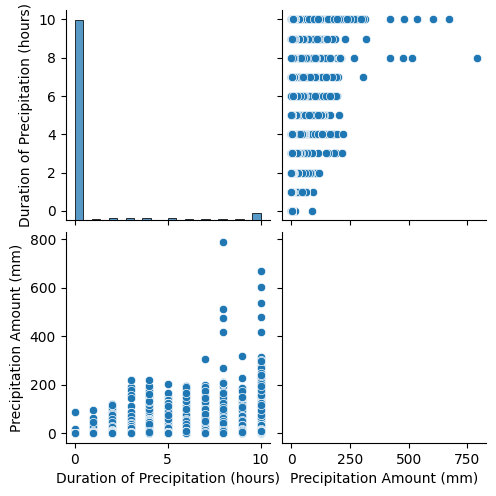

In [ ]:
# Pairplot for 'Duration of Precipitation (hours)', 'Precipitation Amount (mm)', and 'Hour'
sns.pairplot(DPV_cleaning[['Duration of Precipitation (hours)', 'Precipitation Amount (mm)']])

In [ ]:
DPV_cleaning.sample(15)

STN  Hour  Duration of Precipitation (hours)  \
996020   375    19                                0.0   
1735994  380    12                                0.0   
1170132  375    11                                0.0   
872978   375     1                                0.0   
1918365  380     7                                0.0   
1882181  380    15                                0.0   
1385889  380     1                                0.0   
1442777  380    17                                4.0   
1396428  380     4                                0.0   
57005    356     9                                0.0   
1161693  375    20                                0.0   
1901877  380     7                                0.0   
115106   356    20                                0.0   
1323624  380    23                                0.0   
1041131  375    10                                0.0   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
996020                    0.000000            50.0             10.0   
1735994                   0.000000            85.0              2.0   
1170132                   1.105337            75.0              2.0   
872978                    0.000000            62.0              NaN   
1918365                   0.000000            70.0              3.0   
1882181                   0.000000            59.0              5.0   
1385889                   0.000000            67.0              NaN   
1442777                   1.000000            57.0             24.0   
1396428                   1.000000            19.0             22.0   
57005                     0.000000             NaN              NaN   
1161693                   1.105337            62.0              2.0   
1901877                   0.000000            75.0              2.0   
115106                    0.000000             NaN              NaN   
1323624                   0.000000            73.0              NaN   
1041131                   1.105337            58.0             10.0   

         Rainfall Indicator  Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
996020                  0.0                 36.000000                   21.0   
1735994                 0.0                129.000000                   93.0   
1170132                 0.0                 73.762724                   31.0   
872978                  NaN                 70.000000                   50.0   
1918365                 0.0                 77.000000                   51.0   
1882181                 0.0                 41.000000                   31.0   
1385889                 0.0                200.000000                  120.0   
1442777                 0.0                 60.000000                   40.0   
1396428                 1.0                 60.000000                   40.0   
57005                   NaN                 60.000000                   30.0   
1161693                 0.0                 73.762724                   15.0   
1901877                 0.0                 51.000000                   36.0   
115106                  NaN                 20.000000                   10.0   
1323624                 0.0                 50.000000                   20.0   
1041131                 0.0                 77.000000                   67.0   

         Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  DOP Sector  
996020                         21.000000        1985-02-21         1.0  
1735994                        82.000000        1992-05-19         1.0  
1170132                        43.401763        1964-07-06         0.0  
872978                         50.000000        1998-10-24         1.0  
1918365                        51.000000        1971-06-17         1.0  
1882181                        31.000000        1977-05-01         1.0  
1385889                       130.000000        2004-02-02         1.0  
1442777                        40.000000        2018-02-06         2.0  
1396428              

### What about the visibility column

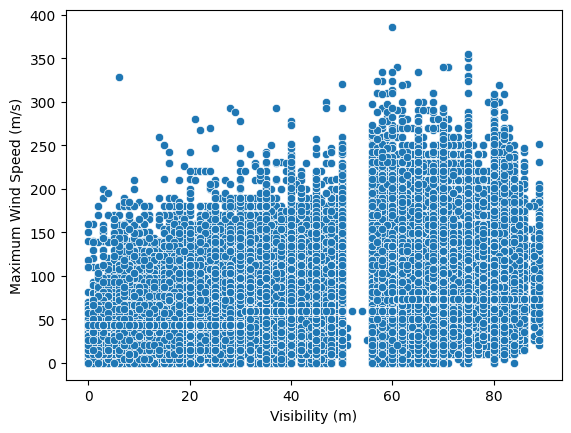

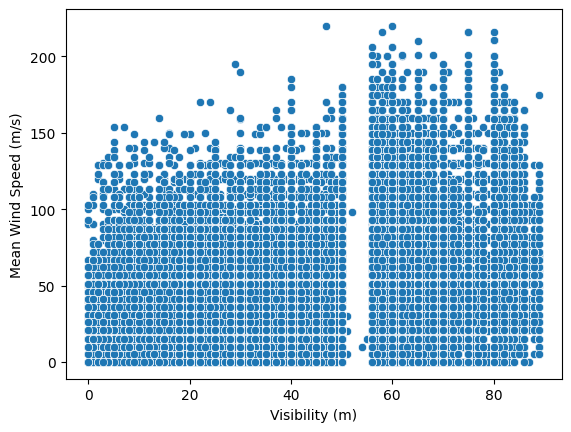

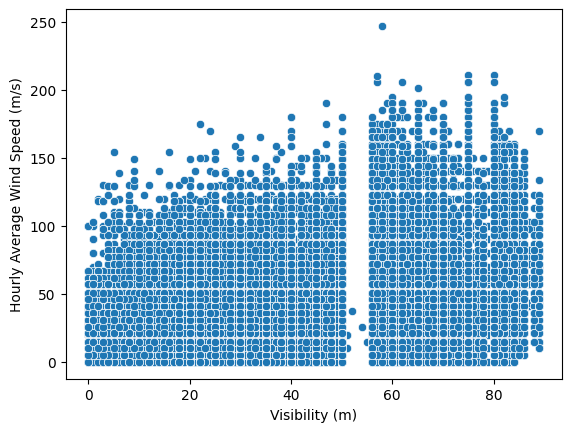

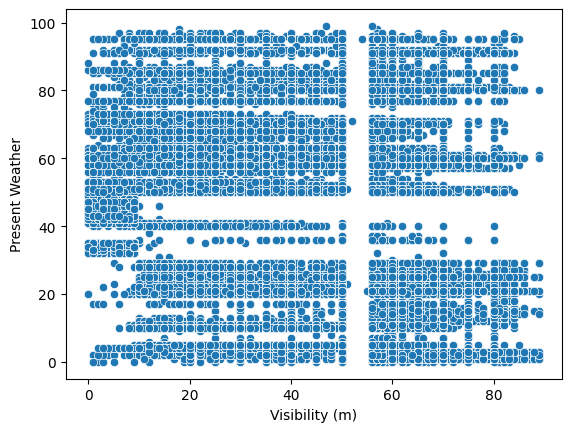

In [ ]:

columns = ['Maximum Wind Speed (m/s)', 'Mean Wind Speed (m/s)', 'Hourly Average Wind Speed (m/s)', 'Present Weather']
for col in columns:
    sns.scatterplot(data=DPV_cleaning, x='Visibility (m)', y=col)
    plt.show()

Let's see hours

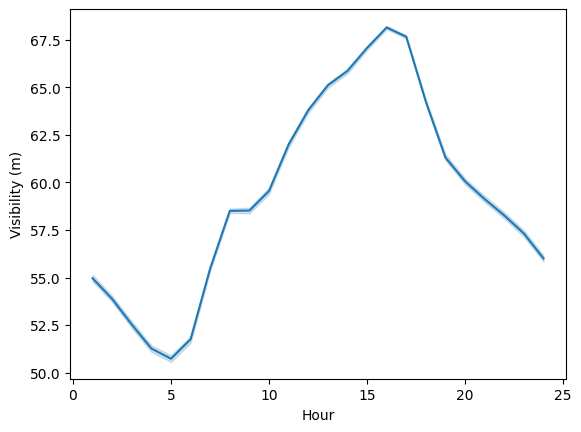

In [ ]:
# Line chart for 'Hour' and 'Visibility (m)'
sns.lineplot(data=DPV_cleaning, x='Hour', y='Visibility (m)')
plt.show()

In [ ]:
# Calculate the mean 'Visibility (m)' for each 'Hour'
mean_visibility = DPV_cleaning.groupby('Hour')['Visibility (m)'].mean()
mean_visibility

Hour
1     54.959373
2     53.874108
3     52.527345
4     51.265441
5     50.728854
6     51.753715
7     55.481607
8     58.504438
9     58.521197
10    59.552812
11    61.995696
12    63.795886
13    65.106526
14    65.863142
15    67.073089
16    68.150475
17    67.662876
18    64.249905
19    61.308725
20    60.060821
21    59.124403
22    58.267403
23    57.314622
24    56.006481
Name: Visibility (m), dtype: float64

What about seasons. Since sometimes the visibility differes depending on the hour, but the season does make a difference in what is perceived during the hours

In [ ]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or (date.month < 3) or (date.month == 3 and date.day <= 20):
        return 'Winter'
    elif (date.month >= 3 and date.day > 20) or (date.month < 6) or (date.month == 6 and date.day <= 20):
        return 'Spring'
    elif (date.month >= 6 and date.day > 20) or (date.month < 9) or (date.month == 9 and date.day <= 21):
        return 'Summer'
    else:
        return 'Autumn'

DPV_cleaning['Season'] = DPV_cleaning['Date (YYYY-MM-DD)'].apply(get_season)
DPV_cleaning.head()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\1479714834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPV_cleaning['Season'] = DPV_cleaning['Date (YYYY-MM-DD)'].apply(get_season)


STN  Hour  Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0  356     1                                0.0                        0.0   
1  356     2                                0.0                        0.0   
2  356     3                                0.0                        0.0   
3  356     4                                0.0                        0.0   
4  356     5                                0.0                        0.0   

   Visibility (m)  Present Weather  Rainfall Indicator  \
0             NaN              NaN                 NaN   
1             NaN              NaN                 NaN   
2             NaN              NaN                 NaN   
3             NaN              NaN                 NaN   
4             NaN              NaN                 NaN   

   Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0                      50.0                   30.0   
1                      60.0                   40.0   
2                      60.0                   40.0   
3                      50.0                   40.0   
4                      50.0                   30.0   

   Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  DOP Sector  Season  
0                        39.912583        2006-02-01         1.0  Winter  
1                        39.912583        2006-02-01         1.0  Winter  
2                        39.912583        2006-02-01         1.0  Winter  
3                        39.912583        2006-02-01         1.0  Winter  
4                        39.912583        2006-02-01         1.0  Winter

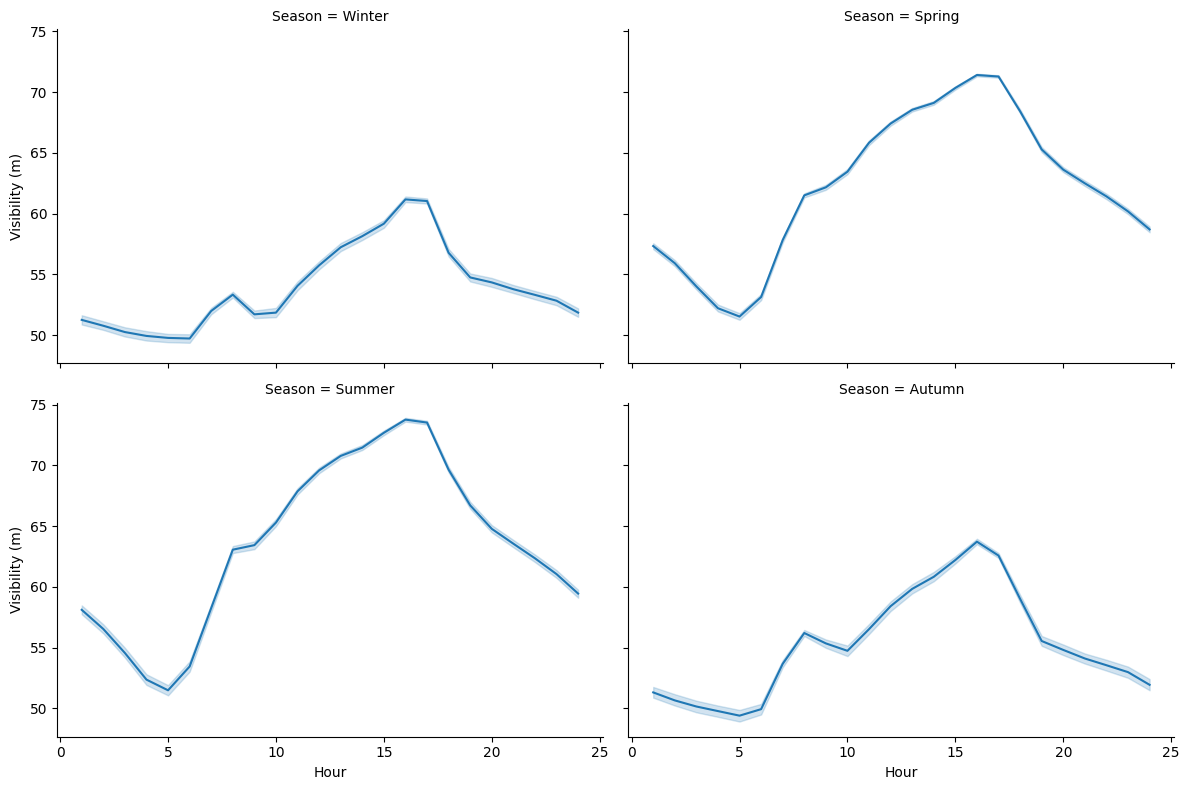

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(DPV_cleaning, col='Season', col_wrap=2, height=4, aspect=1.5)

# Map to line plots
g.map(sns.lineplot, 'Hour', 'Visibility (m)')

plt.show()

It is understandable that the visibility is higher during a specific season at a specific hour. This is does show that there is a correlation between the hours, seasons and visibility

In [ ]:
# Calculate the mean 'Visibility (m)' for each 'Hour' of each 'Season'
mean_visibility = DPV_cleaning.groupby(['Season','Hour'])['Visibility (m)'].mean()
mean_visibility.head(32)

Season  Hour
Autumn  1       51.310337
        2       50.651648
        3       50.148766
        4       49.772214
        5       49.395256
        6       49.929913
        7       53.661840
        8       56.198328
        9       55.343865
        10      54.732998
        11      56.516129
        12      58.407134
        13      59.831416
        14      60.827541
        15      62.208004
        16      63.717136
        17      62.572812
        18      59.010479
        19      55.540455
        20      54.806448
        21      54.100329
        22      53.546433
        23      52.977762
        24      51.933020
Spring  1       57.325063
        2       55.913125
        3       54.001320
        4       52.204814
        5       51.520395
        6       53.127625
        7       57.817921
        8       61.496761
Name: Visibility (m), dtype: float64

Now that we know the specific mean visibility, of a specific season on a specific hour, we can try to substitute the missing data with one that is appropriate

In [ ]:
def fill_visibility(row):
    if pd.isna(row['Visibility (m)']):
        return mean_visibility[row['Season'], row['Hour']]
    else:
        return row['Visibility (m)']

DPV_cleaning['Visibility (m)'] = DPV_cleaning.apply(fill_visibility, axis=1)

DPV_cleaning

C:\Users\kenar\AppData\Local\Temp\ipykernel_9212\100239046.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPV_cleaning['Visibility (m)'] = DPV_cleaning.apply(fill_visibility, axis=1)


STN  Hour  Duration of Precipitation (hours)  \
0        356     1                                0.0   
1        356     2                                0.0   
2        356     3                                0.0   
3        356     4                                0.0   
4        356     5                                0.0   
...      ...   ...                                ...   
2089648  380    20                                0.0   
2089649  380    21                                0.0   
2089650  380    22                                0.0   
2089651  380    23                                0.0   
2089652  380    24                                0.0   

         Precipitation Amount (mm)  Visibility (m)  Present Weather  \
0                         0.000000       51.246056              NaN   
1                         0.000000       50.762846              NaN   
2                         0.000000       50.243715              NaN   
3                         0.000000       49.924886              NaN   
4                         0.000000       49.762038              NaN   
...                            ...             ...              ...   
2089648                   1.105337       54.330414             44.0   
2089649                   1.105337       53.770788             44.0   
2089650                   1.105337       53.305000             45.0   
2089651                   1.105337       52.823534             47.0   
2089652                   1.105337       51.842334             47.0   

         Rainfall Indicator  Maximum Wind Speed (m/s)  Mean Wind Speed (m/s)  \
0                       NaN                 50.000000                   30.0   
1                       NaN                 60.000000                   40.0   
2                       NaN                 60.000000                   40.0   
3                       NaN                 50.000000                   40.0   
4                       NaN                 50.000000                   30.0   
...                     ...                       ...                    ...   
2089648                 0.0                 70.308854                    0.0   
2089649                 0.0                 70.308854                    0.0   
2089650                 0.0                 70.308854                    0.0   
2089651                 0.0                 70.308854                    0.0   
2089652                 0.0                 70.308854                    0.0   

         Hourly Average Wind Speed (m/s) Date (YYYY-MM-DD)  DOP Sector  Season  
0                              39.912583        2006-02-01         1.0  Winter  
1                              39.912583        2006-02-01         1.0  Winter  
2                              39.912583        2006-02-01         1.0  Winter  
3                              39.912583        2006-02-01         1.0  Winter  
4                              39.912583        2006-02-01         1.0  Winter  
...                                  ...               ...         ...     ...  
2089648                        39.912583        1951-01-31         0.0  Winter  
2089649                        39.912583        1951-01-31         0.0  Winter  
2089650                        39.912583        1951-01-31         0.0  Winter  
2089651                        39.912583        1951-01-31         0.0  Winter  
2089652                        39.912583        1951-01-31         0.0  Winter  

[2089653 rows x 13 columns]

Now let's see about the empty spots or NaNs

In [ ]:
DPV_cleaning.shape
DPV_cleaning.isna().sum()

STN                                        0
Hour                                       0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                             0
Present Weather                      1008097
Rainfall Indicator                    497331
Maximum Wind Speed (m/s)                   0
Mean Wind Speed (m/s)                      0
Hourly Average Wind Speed (m/s)            0
Date (YYYY-MM-DD)                          0
DOP Sector                                 0
Season                                     0
dtype: int64

### Finally swaping the empty columns with the cleaned ones

In [ ]:
merged_data.update(DPV_cleaning[['Duration of Precipitation (hours)', 'Precipitation Amount (mm)', 'Visibility (m)']])

merged_data.isna().sum
merged_data


STN  LON(east)  LAT(north)  ALT(m)        NAME  Station ID  \
0        356      5.146      51.859     0.7   Herwijnen         356   
1        356      5.146      51.859     0.7   Herwijnen         356   
2        356      5.146      51.859     0.7   Herwijnen         356   
3        356      5.146      51.859     0.7   Herwijnen         356   
4        356      5.146      51.859     0.7   Herwijnen         356   
...      ...        ...         ...     ...         ...         ...   
2089648  380      5.762      50.906   114.3  Maastricht         380   
2089649  380      5.762      50.906   114.3  Maastricht         380   
2089650  380      5.762      50.906   114.3  Maastricht         380   
2089651  380      5.762      50.906   114.3  Maastricht         380   
2089652  380      5.762      50.906   114.3  Maastricht         380   

        Date (YYYY-MM-DD)  Hour  Hourly Average Wind Speed (m/s)  \
0              2006-02-01     1                        39.912583   
1              2006-02-01     2                        39.912583   
2              2006-02-01     3                        39.912583   
3              2006-02-01     4                        39.912583   
4              2006-02-01     5                        39.912583   
...                   ...   ...                              ...   
2089648        1951-01-31    20                        39.912583   
2089649        1951-01-31    21                        39.912583   
2089650        1951-01-31    22                        39.912583   
2089651        1951-01-31    23                        39.912583   
2089652        1951-01-31    24                        39.912583   

         Mean Wind Speed (m/s)  ...  Cause Progression  \
0                         30.0  ...                NaN   
1                         40.0  ...                NaN   
2                         40.0  ...                NaN   
3                         40.0  ...                NaN   
4                         30.0  ...                NaN   
...                        ...  ...                ...   
2089648                    0.0  ...                NaN   
2089649                    0.0  ...                NaN   
2089650                    0.0  ...                NaN   
2089651                    0.0  ...                NaN   
2089652                    0.0  ...                NaN   

         Cause Progression Code  Cause Code  Cause 1  Cause 2  Cause 3  \
0                           NaN         NaN      NaN      NaN      NaN   
1                           NaN         NaN      NaN      NaN      NaN   
2                           NaN         NaN      NaN      NaN      NaN   
3                           NaN         NaN      NaN      NaN      NaN   
4                           NaN         NaN      NaN      NaN      NaN   
...                         ...         ...      ...      ...      ...   
2089648                     NaN         NaN      NaN      NaN      NaN   
2089649                     NaN         NaN      NaN      NaN      NaN   
2089650                     NaN         NaN      NaN      NaN      NaN   
2089651                     NaN         NaN      NaN      NaN      NaN   
2089652                     NaN         NaN      NaN      NaN      NaN   

         Cause 4  Start Datetime  End Datetime  Weekday Name  
0            NaN             NaT           NaT     Wednesday  
1            NaN             NaT           NaT     Wednesday  
2            NaN             NaT           NaT     Wednesday  
3            NaN             NaT           NaT     Wednesday  
4            NaN             NaT           NaT     Wednesday  
...          ...             ...           ...           ...  
2089648      NaN             NaT           NaT     Wednesday  
2089649      NaN             NaT           NaT     Wednesday  
2089650      NaN             NaT           NaT     Wednesday  
2089651      NaN             NaT           NaT     Wednesday  
2089652      NaN             NaT           NaT     Wednesday